# 원데이터를 데이터 증강을 이용하여 각 데이터를 6000개씩 증강 총 약 60000개의 사진으로 데이터 학습 및 검증

['Charmander:파이리', 'Diglett:디그다', 'Ditto:메타몽', 'Eevee:이브이', 'Gyarados:갸라도스', 'Meowth:나옹', 'Pikachu:피카츄',  'Rattata:꼬렛', 'Snorlax:잠만보', 'Squirtle:꼬부기'] 데이터 사용

In [1]:
import warnings
warnings.filterwarnings('ignore')

from keras import models, layers
import cv2
from glob import glob
import os
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf

from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt

import Augmentor
import random
from PIL import Image
import PIL.ImageOps    
import time

Using TensorFlow backend.


Charmander 데이터셋 6000개 늘리기 (파이리)

In [307]:
num_augmented_images = 6000
file_path = 'D:\\swproject\\pocketmon_classi\\Charmander\\'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'D:\\swproject\\pocketmon_classi\\Charmander\\'

In [5]:
for i in range(1, num_augmented_images):
    try:
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        print(change_picture_index)
        print(file_names[change_picture_index])
        file_name = file_names[change_picture_index]

        origin_image_path = 'D:\\swproject\\pocketmon_classi\\Charmander\\' + file_name
        print(origin_image_path)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)

        if(random_augment == 1):
            #이미지 좌우 반전
            print("invert")
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 2):
            #이미지 기울이기
            print("rotate")
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')

        augment_cnt += 1
    except:
        pass

7
Charmander.105.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.105.jpg
noise
155
Charmander.239.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.239.jpg
noise
152
Charmander.236.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.236.jpg
noise
57
Charmander.150.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.150.jpg
invert
164
Charmander.247.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.247.jpg
invert
70
Charmander.162.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.162.jpg
noise
73
Charmander.165.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.165.jpg
rotate
241
Charmander.5.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.5.jpg
invert
25
Charmander.121.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.121.jpg
noise
197
Charmander.277.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.277.jpg
rotate
4
Charmander.102.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.102.jpg
invert
112
Charmander.20.jpg
D:\sw

noise
27
Charmander.123.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.123.jpg
rotate
22
Charmander.119.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.119.jpg
invert
278
Charmander.83.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.83.jpg
invert
202
Charmander.281.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.281.jpg
invert
200
Charmander.28.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.28.jpg
invert
226
Charmander.36.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.36.jpg
invert
14
Charmander.111.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.111.jpg
invert
288
Charmander.92.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.92.jpg
rotate
165
Charmander.248.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.248.jpg
noise
97
Charmander.187.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.187.jpg
rotate
142
Charmander.227.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.227.jpg
invert
266
Charmander.72

280
Charmander.85.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.85.jpg
noise
16
Charmander.113.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.113.jpg
noise
266
Charmander.72.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.72.jpg
noise
14
Charmander.111.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.111.jpg
noise
276
Charmander.81.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.81.jpg
noise
61
Charmander.154.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.154.jpg
invert
220
Charmander.30.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.30.jpg
noise
294
Charmander.98.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.98.jpg
invert
267
Charmander.73.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.73.jpg
invert
29
Charmander.125.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.125.jpg
noise
175
Charmander.257.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.257.jpg
invert
265
Charmander.71.jpg
D:\swprojec

169
Charmander.251.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.251.jpg
invert
246
Charmander.54.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.54.jpg
invert
224
Charmander.34.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.34.jpg
noise
116
Charmander.203.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.203.jpg
invert
97
Charmander.187.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.187.jpg
rotate
268
Charmander.74.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.74.jpg
rotate
44
Charmander.139.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.139.jpg
rotate
133
Charmander.219.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.219.jpg
rotate
115
Charmander.202.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.202.jpg
rotate
175
Charmander.257.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.257.jpg
invert
2
Charmander.100.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.100.jpg
noise
44
Charmander.139.jpg


61
Charmander.154.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.154.jpg
noise
5
Charmander.103.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.103.jpg
noise
279
Charmander.84.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.84.jpg
noise
38
Charmander.133.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.133.jpg
noise
226
Charmander.36.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.36.jpg
rotate
3
Charmander.101.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.101.jpg
rotate
166
Charmander.249.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.249.jpg
rotate
30
Charmander.126.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.126.jpg
rotate
107
Charmander.196.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.196.jpg
rotate
8
Charmander.106.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.106.jpg
noise
115
Charmander.202.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.202.jpg
rotate
17
Charmander.114.jpg
D:\swp

209
Charmander.288.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.288.jpg
noise
225
Charmander.35.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.35.jpg
noise
226
Charmander.36.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.36.jpg
invert
63
Charmander.156.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.156.jpg
noise
201
Charmander.280.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.280.jpg
noise
250
Charmander.58.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.58.jpg
rotate
275
Charmander.80.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.80.jpg
invert
106
Charmander.195.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.195.jpg
invert
294
Charmander.98.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.98.jpg
rotate
134
Charmander.22.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.22.jpg
rotate
236
Charmander.45.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.45.jpg
invert
102
Charmander.191.jpg
D:\swp

invert
96
Charmander.186.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.186.jpg
invert
191
Charmander.271.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.271.jpg
invert
222
Charmander.32.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.32.jpg
invert
227
Charmander.37.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.37.jpg
rotate
180
Charmander.261.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.261.jpg
noise
218
Charmander.296.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.296.jpg
rotate
36
Charmander.131.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.131.jpg
noise
247
Charmander.55.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.55.jpg
noise
237
Charmander.46.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.46.jpg
invert
272
Charmander.78.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.78.jpg
noise
286
Charmander.90.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.90.jpg
noise
276
Charmander.81.jpg


243
Charmander.51.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.51.jpg
noise
220
Charmander.30.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.30.jpg
invert
285
Charmander.9.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.9.jpg
noise
249
Charmander.57.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.57.jpg
noise
109
Charmander.198.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.198.jpg
noise
51
Charmander.145.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.145.jpg
noise
200
Charmander.28.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.28.jpg
noise
268
Charmander.74.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.74.jpg
rotate
12
Charmander.11.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.11.jpg
invert
67
Charmander.16.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.16.jpg
invert
166
Charmander.249.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.249.jpg
noise
210
Charmander.289.jpg
D:\swproject\po

121
Charmander.208.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.208.jpg
noise
200
Charmander.28.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.28.jpg
noise
148
Charmander.232.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.232.jpg
noise
166
Charmander.249.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.249.jpg
noise
3
Charmander.101.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.101.jpg
rotate
8
Charmander.106.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.106.jpg
invert
182
Charmander.263.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.263.jpg
noise
153
Charmander.237.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.237.jpg
invert
85
Charmander.176.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.176.jpg
invert
95
Charmander.185.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.185.jpg
invert
47
Charmander.141.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.141.jpg
invert
55
Charmander.149.jpg
D:

23
Charmander.12.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.12.jpg
invert
263
Charmander.7.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.7.jpg
noise
168
Charmander.250.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.250.jpg
invert
270
Charmander.76.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.76.jpg
noise
270
Charmander.76.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.76.jpg
rotate
252
Charmander.6.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.6.jpg
rotate
51
Charmander.145.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.145.jpg
noise
83
Charmander.174.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.174.jpg
rotate
219
Charmander.3.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.3.jpg
rotate
192
Charmander.272.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.272.jpg
noise
286
Charmander.90.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.90.jpg
noise
291
Charmander.95.jpg
D:\swproject\poc

15
Charmander.112.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.112.jpg
rotate
2
Charmander.100.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.100.jpg
invert
85
Charmander.176.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.176.jpg
noise
214
Charmander.292.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.292.jpg
noise
101
Charmander.190.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.190.jpg
noise
270
Charmander.76.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.76.jpg
invert
12
Charmander.11.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.11.jpg
rotate
199
Charmander.279.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.279.jpg
invert
30
Charmander.126.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.126.jpg
noise
202
Charmander.281.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.281.jpg
noise
269
Charmander.75.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.75.jpg
invert
4
Charmander.102.jpg
D:\swp

202
Charmander.281.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.281.jpg
rotate
47
Charmander.141.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.141.jpg
noise
82
Charmander.173.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.173.jpg
noise
240
Charmander.49.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.49.jpg
invert
210
Charmander.289.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.289.jpg
invert
72
Charmander.164.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.164.jpg
noise
118
Charmander.205.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.205.jpg
rotate
52
Charmander.146.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.146.jpg
invert
104
Charmander.193.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.193.jpg
noise
53
Charmander.147.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.147.jpg
invert
100
Charmander.19.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.19.jpg
noise
212
Charmander.290.jpg
D

140
Charmander.225.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.225.jpg
invert
41
Charmander.136.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.136.jpg
invert
167
Charmander.25.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.25.jpg
invert
167
Charmander.25.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.25.jpg
noise
61
Charmander.154.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.154.jpg
rotate
246
Charmander.54.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.54.jpg
invert
73
Charmander.165.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.165.jpg
noise
199
Charmander.279.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.279.jpg
invert
58
Charmander.151.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.151.jpg
invert
73
Charmander.165.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.165.jpg
invert
138
Charmander.223.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.223.jpg
noise
237
Charmander.46.jpg
D:

272
Charmander.78.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.78.jpg
noise
149
Charmander.233.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.233.jpg
invert
31
Charmander.127.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.127.jpg
rotate
169
Charmander.251.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.251.jpg
invert
22
Charmander.119.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.119.jpg
invert
22
Charmander.119.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.119.jpg
noise
55
Charmander.149.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.149.jpg
rotate
112
Charmander.20.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.20.jpg
rotate
253
Charmander.60.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.60.jpg
rotate
263
Charmander.7.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.7.jpg
rotate
117
Charmander.204.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.204.jpg
rotate
14
Charmander.111.jpg
D:\s

234
Charmander.43.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.43.jpg
noise
281
Charmander.86.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.86.jpg
rotate
83
Charmander.174.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.174.jpg
rotate
136
Charmander.221.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.221.jpg
noise
230
Charmander.4.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.4.jpg
rotate
283
Charmander.88.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.88.jpg
rotate
262
Charmander.69.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.69.jpg
invert
223
Charmander.33.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.33.jpg
rotate
222
Charmander.32.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.32.jpg
noise
251
Charmander.59.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.59.jpg
noise
37
Charmander.132.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.132.jpg
rotate
98
Charmander.188.jpg
D:\swproject

35
Charmander.130.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.130.jpg
noise
155
Charmander.239.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.239.jpg
noise
114
Charmander.201.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.201.jpg
rotate
14
Charmander.111.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.111.jpg
noise
290
Charmander.94.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.94.jpg
noise
10
Charmander.108.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.108.jpg
rotate
190
Charmander.270.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.270.jpg
rotate
228
Charmander.38.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.38.jpg
rotate
67
Charmander.16.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.16.jpg
invert
45
Charmander.14.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.14.jpg
invert
158
Charmander.241.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.241.jpg
invert
266
Charmander.72.jpg
D:\sw

132
Charmander.218.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.218.jpg
rotate
23
Charmander.12.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.12.jpg
invert
57
Charmander.150.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.150.jpg
noise
218
Charmander.296.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.296.jpg
noise
198
Charmander.278.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.278.jpg
noise
134
Charmander.22.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.22.jpg
invert
294
Charmander.98.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.98.jpg
invert
211
Charmander.29.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.29.jpg
rotate
293
Charmander.97.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.97.jpg
noise
272
Charmander.78.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.78.jpg
rotate
99
Charmander.189.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.189.jpg
noise
193
Charmander.273.jpg
D:\swpr

18
Charmander.115.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.115.jpg
invert
170
Charmander.252.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.252.jpg
invert
226
Charmander.36.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.36.jpg
noise
247
Charmander.55.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.55.jpg
invert
58
Charmander.151.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.151.jpg
invert
224
Charmander.34.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.34.jpg
rotate
11
Charmander.109.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.109.jpg
invert
242
Charmander.50.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.50.jpg
noise
214
Charmander.292.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.292.jpg
noise
228
Charmander.38.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.38.jpg
noise
191
Charmander.271.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.271.jpg
invert
17
Charmander.114.jpg
D:\sw

194
Charmander.274.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.274.jpg
invert
258
Charmander.65.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.65.jpg
noise
122
Charmander.209.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.209.jpg
invert
162
Charmander.245.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.245.jpg
noise
227
Charmander.37.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.37.jpg
invert
62
Charmander.155.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.155.jpg
noise
287
Charmander.91.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.91.jpg
rotate
95
Charmander.185.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.185.jpg
noise
146
Charmander.230.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.230.jpg
rotate
31
Charmander.127.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.127.jpg
invert
82
Charmander.173.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.173.jpg
rotate
183
Charmander.264.jpg
D

149
Charmander.233.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.233.jpg
rotate
107
Charmander.196.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.196.jpg
invert
184
Charmander.265.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.265.jpg
noise
236
Charmander.45.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.45.jpg
noise
182
Charmander.263.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.263.jpg
invert
72
Charmander.164.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.164.jpg
invert
232
Charmander.41.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.41.jpg
noise
17
Charmander.114.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.114.jpg
rotate
35
Charmander.130.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.130.jpg
invert
275
Charmander.80.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.80.jpg
invert
31
Charmander.127.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.127.jpg
invert
163
Charmander.246.jpg


274
Charmander.8.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.8.jpg
rotate
104
Charmander.193.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.193.jpg
invert
98
Charmander.188.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.188.jpg
noise
280
Charmander.85.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.85.jpg
invert
74
Charmander.166.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.166.jpg
invert
143
Charmander.228.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.228.jpg
noise
53
Charmander.147.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.147.jpg
rotate
225
Charmander.35.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.35.jpg
rotate
112
Charmander.20.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.20.jpg
noise
79
Charmander.170.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.170.jpg
rotate
236
Charmander.45.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.45.jpg
noise
189
Charmander.27.jpg
D:\swpro

252
Charmander.6.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.6.jpg
rotate
117
Charmander.204.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.204.jpg
rotate
251
Charmander.59.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.59.jpg
invert
98
Charmander.188.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.188.jpg
rotate
20
Charmander.117.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.117.jpg
invert
158
Charmander.241.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.241.jpg
rotate
11
Charmander.109.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.109.jpg
invert
293
Charmander.97.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.97.jpg
noise
289
Charmander.93.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.93.jpg
rotate
252
Charmander.6.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.6.jpg
rotate
139
Charmander.224.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.224.jpg
invert
159
Charmander.242.jpg
D:\sw

noise
253
Charmander.60.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.60.jpg
noise
249
Charmander.57.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.57.jpg
noise
31
Charmander.127.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.127.jpg
noise
128
Charmander.214.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.214.jpg
noise
248
Charmander.56.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.56.jpg
invert
242
Charmander.50.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.50.jpg
noise
94
Charmander.184.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.184.jpg
invert
69
Charmander.161.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.161.jpg
invert
290
Charmander.94.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.94.jpg
invert
20
Charmander.117.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.117.jpg
invert
69
Charmander.161.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.161.jpg
invert
259
Charmander.66.jpg
D:

115
Charmander.202.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.202.jpg
invert
48
Charmander.142.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.142.jpg
invert
207
Charmander.286.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.286.jpg
rotate
1
Charmander.10.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.10.jpg
rotate
27
Charmander.123.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.123.jpg
rotate
199
Charmander.279.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.279.jpg
rotate
281
Charmander.86.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.86.jpg
invert
93
Charmander.183.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.183.jpg
invert
66
Charmander.159.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.159.jpg
rotate
175
Charmander.257.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.257.jpg
noise
206
Charmander.285.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.285.jpg
noise
234
Charmander.43.jpg


245
Charmander.53.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.53.jpg
noise
141
Charmander.226.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.226.jpg
invert
262
Charmander.69.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.69.jpg
rotate
169
Charmander.251.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.251.jpg
rotate
198
Charmander.278.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.278.jpg
rotate
120
Charmander.207.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.207.jpg
rotate
166
Charmander.249.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.249.jpg
invert
272
Charmander.78.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.78.jpg
invert
195
Charmander.275.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.275.jpg
invert
137
Charmander.222.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.222.jpg
noise
168
Charmander.250.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.250.jpg
noise
227
Charmander.37.j

58
Charmander.151.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.151.jpg
rotate
78
Charmander.17.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.17.jpg
noise
99
Charmander.189.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.189.jpg
invert
230
Charmander.4.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.4.jpg
invert
56
Charmander.15.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.15.jpg
noise
85
Charmander.176.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.176.jpg
rotate
203
Charmander.282.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.282.jpg
rotate
204
Charmander.283.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.283.jpg
rotate
204
Charmander.283.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.283.jpg
noise
292
Charmander.96.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.96.jpg
noise
276
Charmander.81.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.81.jpg
rotate
290
Charmander.94.jpg
D:\swproj

290
Charmander.94.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.94.jpg
noise
259
Charmander.66.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.66.jpg
noise
256
Charmander.63.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.63.jpg
noise
273
Charmander.79.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.79.jpg
noise
217
Charmander.295.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.295.jpg
noise
246
Charmander.54.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.54.jpg
rotate
275
Charmander.80.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.80.jpg
invert
145
Charmander.23.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.23.jpg
rotate
258
Charmander.65.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.65.jpg
invert
190
Charmander.270.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.270.jpg
noise
74
Charmander.166.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.166.jpg
invert
88
Charmander.179.jpg
D:\swprojec

noise
196
Charmander.276.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.276.jpg
invert
169
Charmander.251.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.251.jpg
noise
5
Charmander.103.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.103.jpg
invert
4
Charmander.102.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.102.jpg
noise
236
Charmander.45.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.45.jpg
rotate
240
Charmander.49.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.49.jpg
noise
231
Charmander.40.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.40.jpg
noise
138
Charmander.223.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.223.jpg
noise
53
Charmander.147.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.147.jpg
invert
280
Charmander.85.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.85.jpg
noise
39
Charmander.134.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.134.jpg
invert
29
Charmander.125.jpg
D:

noise
127
Charmander.213.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.213.jpg
rotate
31
Charmander.127.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.127.jpg
invert
246
Charmander.54.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.54.jpg
noise
84
Charmander.175.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.175.jpg
noise
105
Charmander.194.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.194.jpg
rotate
118
Charmander.205.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.205.jpg
rotate
235
Charmander.44.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.44.jpg
noise
201
Charmander.280.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.280.jpg
invert
131
Charmander.217.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.217.jpg
rotate
132
Charmander.218.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.218.jpg
rotate
223
Charmander.33.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.33.jpg
rotate
164
Charmander.

94
Charmander.184.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.184.jpg
noise
31
Charmander.127.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.127.jpg
noise
93
Charmander.183.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.183.jpg
rotate
270
Charmander.76.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.76.jpg
noise
110
Charmander.199.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.199.jpg
invert
44
Charmander.139.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.139.jpg
noise
249
Charmander.57.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.57.jpg
noise
101
Charmander.190.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.190.jpg
noise
139
Charmander.224.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.224.jpg
invert
75
Charmander.167.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.167.jpg
noise
3
Charmander.101.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.101.jpg
rotate
74
Charmander.166.jpg
D:\swp

81
Charmander.172.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.172.jpg
invert
294
Charmander.98.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.98.jpg
invert
99
Charmander.189.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.189.jpg
rotate
31
Charmander.127.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.127.jpg
invert
104
Charmander.193.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.193.jpg
noise
294
Charmander.98.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.98.jpg
noise
289
Charmander.93.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.93.jpg
noise
191
Charmander.271.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.271.jpg
rotate
131
Charmander.217.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.217.jpg
rotate
235
Charmander.44.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.44.jpg
noise
28
Charmander.124.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.124.jpg
rotate
16
Charmander.113.jpg
D:\s

noise
140
Charmander.225.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.225.jpg
rotate
282
Charmander.87.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.87.jpg
rotate
187
Charmander.268.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.268.jpg
noise
162
Charmander.245.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.245.jpg
invert
116
Charmander.203.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.203.jpg
rotate
246
Charmander.54.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.54.jpg
invert
25
Charmander.121.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.121.jpg
noise
230
Charmander.4.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.4.jpg
invert
240
Charmander.49.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.49.jpg
rotate
168
Charmander.250.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.250.jpg
noise
292
Charmander.96.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.96.jpg
rotate
147
Charmander.231.j

177
Charmander.259.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.259.jpg
invert
2
Charmander.100.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.100.jpg
invert
242
Charmander.50.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.50.jpg
noise
247
Charmander.55.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.55.jpg
invert
180
Charmander.261.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.261.jpg
invert
113
Charmander.200.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.200.jpg
rotate
234
Charmander.43.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.43.jpg
invert
21
Charmander.118.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.118.jpg
noise
290
Charmander.94.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.94.jpg
noise
220
Charmander.30.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.30.jpg
invert
85
Charmander.176.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.176.jpg
rotate
164
Charmander.247.jpg
D:\s

10
Charmander.108.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.108.jpg
rotate
253
Charmander.60.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.60.jpg
invert
8
Charmander.106.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.106.jpg
invert
229
Charmander.39.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.39.jpg
noise
21
Charmander.118.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.118.jpg
rotate
28
Charmander.124.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.124.jpg
invert
239
Charmander.48.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.48.jpg
invert
29
Charmander.125.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.125.jpg
rotate
43
Charmander.138.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.138.jpg
noise
5
Charmander.103.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.103.jpg
noise
231
Charmander.40.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.40.jpg
noise
121
Charmander.208.jpg
D:\swpro

13
Charmander.110.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.110.jpg
invert
272
Charmander.78.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.78.jpg
invert
294
Charmander.98.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.98.jpg
rotate
148
Charmander.232.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.232.jpg
invert
262
Charmander.69.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.69.jpg
noise
5
Charmander.103.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.103.jpg
invert
1
Charmander.10.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.10.jpg
rotate
170
Charmander.252.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.252.jpg
invert
30
Charmander.126.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.126.jpg
noise
278
Charmander.83.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.83.jpg
rotate
67
Charmander.16.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.16.jpg
rotate
279
Charmander.84.jpg
D:\swproj

284
Charmander.89.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.89.jpg
noise
279
Charmander.84.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.84.jpg
rotate
93
Charmander.183.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.183.jpg
rotate
76
Charmander.168.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.168.jpg
noise
157
Charmander.240.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.240.jpg
rotate
153
Charmander.237.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.237.jpg
rotate
188
Charmander.269.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.269.jpg
noise
280
Charmander.85.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.85.jpg
invert
4
Charmander.102.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.102.jpg
noise
160
Charmander.243.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.243.jpg
invert
120
Charmander.207.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.207.jpg
noise
166
Charmander.249.jpg
D:

rotate
213
Charmander.291.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.291.jpg
noise
238
Charmander.47.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.47.jpg
invert
207
Charmander.286.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.286.jpg
noise
226
Charmander.36.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.36.jpg
noise
39
Charmander.134.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.134.jpg
rotate
19
Charmander.116.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.116.jpg
noise
27
Charmander.123.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.123.jpg
invert
85
Charmander.176.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.176.jpg
noise
248
Charmander.56.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.56.jpg
rotate
113
Charmander.200.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.200.jpg
invert
144
Charmander.229.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.229.jpg
invert
124
Charmander.210

13
Charmander.110.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.110.jpg
rotate
224
Charmander.34.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.34.jpg
rotate
249
Charmander.57.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.57.jpg
noise
211
Charmander.29.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.29.jpg
noise
146
Charmander.230.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.230.jpg
rotate
129
Charmander.215.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.215.jpg
noise
215
Charmander.293.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.293.jpg
noise
29
Charmander.125.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.125.jpg
invert
150
Charmander.234.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.234.jpg
noise
15
Charmander.112.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.112.jpg
rotate
187
Charmander.268.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.268.jpg
noise
51
Charmander.145.jpg
D:\

105
Charmander.194.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.194.jpg
noise
270
Charmander.76.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.76.jpg
noise
149
Charmander.233.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.233.jpg
rotate
88
Charmander.179.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.179.jpg
rotate
58
Charmander.151.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.151.jpg
rotate
23
Charmander.12.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.12.jpg
noise
127
Charmander.213.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.213.jpg
invert
175
Charmander.257.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.257.jpg
noise
261
Charmander.68.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.68.jpg
invert
252
Charmander.6.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.6.jpg
rotate
198
Charmander.278.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.278.jpg
noise
181
Charmander.262.jpg
D:\sw

3
Charmander.101.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.101.jpg
noise
198
Charmander.278.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.278.jpg
rotate
96
Charmander.186.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.186.jpg
invert
53
Charmander.147.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.147.jpg
invert
221
Charmander.31.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.31.jpg
invert
14
Charmander.111.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.111.jpg
invert
47
Charmander.141.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.141.jpg
invert
154
Charmander.238.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.238.jpg
invert
23
Charmander.12.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.12.jpg
invert
166
Charmander.249.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.249.jpg
noise
47
Charmander.141.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.141.jpg
noise
107
Charmander.196.jpg
D:

59
Charmander.152.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.152.jpg
rotate
165
Charmander.248.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.248.jpg
invert
223
Charmander.33.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.33.jpg
noise
131
Charmander.217.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.217.jpg
noise
37
Charmander.132.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.132.jpg
invert
82
Charmander.173.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.173.jpg
rotate
179
Charmander.260.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.260.jpg
noise
138
Charmander.223.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.223.jpg
invert
210
Charmander.289.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.289.jpg
noise
36
Charmander.131.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.131.jpg
invert
139
Charmander.224.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.224.jpg
rotate
81
Charmander.172.jp

275
Charmander.80.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.80.jpg
rotate
10
Charmander.108.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.108.jpg
noise
61
Charmander.154.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.154.jpg
noise
127
Charmander.213.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.213.jpg
rotate
222
Charmander.32.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.32.jpg
rotate
18
Charmander.115.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.115.jpg
rotate
200
Charmander.28.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.28.jpg
noise
103
Charmander.192.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.192.jpg
invert
111
Charmander.2.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.2.jpg
invert
260
Charmander.67.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.67.jpg
rotate
182
Charmander.263.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.263.jpg
invert
43
Charmander.138.jpg
D:\swp

110
Charmander.199.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.199.jpg
rotate
226
Charmander.36.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.36.jpg
invert
235
Charmander.44.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.44.jpg
invert
263
Charmander.7.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.7.jpg
rotate
244
Charmander.52.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.52.jpg
noise
39
Charmander.134.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.134.jpg
noise
132
Charmander.218.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.218.jpg
rotate
126
Charmander.212.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.212.jpg
invert
188
Charmander.269.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.269.jpg
noise
127
Charmander.213.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.213.jpg
invert
15
Charmander.112.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.112.jpg
invert
104
Charmander.193.jpg
D:

237
Charmander.46.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.46.jpg
rotate
210
Charmander.289.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.289.jpg
invert
145
Charmander.23.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.23.jpg
noise
172
Charmander.254.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.254.jpg
invert
116
Charmander.203.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.203.jpg
noise
165
Charmander.248.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.248.jpg
noise
132
Charmander.218.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.218.jpg
rotate
110
Charmander.199.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.199.jpg
invert
215
Charmander.293.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.293.jpg
rotate
21
Charmander.118.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.118.jpg
noise
257
Charmander.64.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.64.jpg
noise
215
Charmander.293.jpg

153
Charmander.237.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.237.jpg
invert
100
Charmander.19.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.19.jpg
rotate
263
Charmander.7.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.7.jpg
invert
23
Charmander.12.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.12.jpg
rotate
27
Charmander.123.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.123.jpg
rotate
210
Charmander.289.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.289.jpg
rotate
251
Charmander.59.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.59.jpg
invert
272
Charmander.78.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.78.jpg
noise
85
Charmander.176.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.176.jpg
rotate
35
Charmander.130.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.130.jpg
invert
30
Charmander.126.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.126.jpg
invert
62
Charmander.155.jpg
D:\swp

39
Charmander.134.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.134.jpg
rotate
151
Charmander.235.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.235.jpg
invert
243
Charmander.51.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.51.jpg
invert
290
Charmander.94.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.94.jpg
invert
66
Charmander.159.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.159.jpg
noise
51
Charmander.145.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.145.jpg
invert
151
Charmander.235.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.235.jpg
rotate
231
Charmander.40.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.40.jpg
invert
203
Charmander.282.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.282.jpg
noise
22
Charmander.119.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.119.jpg
noise
239
Charmander.48.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.48.jpg
noise
49
Charmander.143.jpg
D:\s

142
Charmander.227.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.227.jpg
noise
278
Charmander.83.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.83.jpg
invert
291
Charmander.95.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.95.jpg
noise
128
Charmander.214.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.214.jpg
invert
97
Charmander.187.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.187.jpg
invert
292
Charmander.96.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.96.jpg
noise
118
Charmander.205.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.205.jpg
rotate
99
Charmander.189.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.189.jpg
rotate
193
Charmander.273.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.273.jpg
rotate
146
Charmander.230.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.230.jpg
invert
57
Charmander.150.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.150.jpg
rotate
292
Charmander.96.jpg


noise
16
Charmander.113.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.113.jpg
rotate
254
Charmander.61.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.61.jpg
invert
100
Charmander.19.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.19.jpg
rotate
198
Charmander.278.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.278.jpg
rotate
140
Charmander.225.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.225.jpg
noise
188
Charmander.269.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.269.jpg
noise
81
Charmander.172.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.172.jpg
invert
187
Charmander.268.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.268.jpg
rotate
289
Charmander.93.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.93.jpg
invert
44
Charmander.139.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.139.jpg
invert
153
Charmander.237.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.237.jpg
noise
160
Charmander.2

101
Charmander.190.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.190.jpg
rotate
192
Charmander.272.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.272.jpg
noise
139
Charmander.224.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.224.jpg
invert
38
Charmander.133.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.133.jpg
rotate
16
Charmander.113.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.113.jpg
rotate
33
Charmander.129.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.129.jpg
rotate
12
Charmander.11.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.11.jpg
rotate
238
Charmander.47.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.47.jpg
invert
24
Charmander.120.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.120.jpg
noise
84
Charmander.175.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.175.jpg
noise
250
Charmander.58.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.58.jpg
noise
229
Charmander.39.jpg
D:\s

120
Charmander.207.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.207.jpg
noise
121
Charmander.208.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.208.jpg
rotate
185
Charmander.266.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.266.jpg
noise
27
Charmander.123.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.123.jpg
noise
45
Charmander.14.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.14.jpg
rotate
212
Charmander.290.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.290.jpg
rotate
267
Charmander.73.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.73.jpg
rotate
243
Charmander.51.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.51.jpg
rotate
220
Charmander.30.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.30.jpg
rotate
252
Charmander.6.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.6.jpg
noise
50
Charmander.144.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.144.jpg
rotate
189
Charmander.27.jpg
D:\swpr

invert
65
Charmander.158.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.158.jpg
invert
140
Charmander.225.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.225.jpg
noise
261
Charmander.68.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.68.jpg
noise
209
Charmander.288.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.288.jpg
noise
181
Charmander.262.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.262.jpg
invert
95
Charmander.185.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.185.jpg
rotate
108
Charmander.197.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.197.jpg
invert
149
Charmander.233.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.233.jpg
rotate
121
Charmander.208.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.208.jpg
noise
128
Charmander.214.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.214.jpg
noise
191
Charmander.271.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.271.jpg
rotate
54
Charmande

250
Charmander.58.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.58.jpg
rotate
8
Charmander.106.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.106.jpg
noise
175
Charmander.257.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.257.jpg
invert
34
Charmander.13.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.13.jpg
invert
6
Charmander.104.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.104.jpg
invert
49
Charmander.143.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.143.jpg
invert
40
Charmander.135.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.135.jpg
noise
226
Charmander.36.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.36.jpg
rotate
104
Charmander.193.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.193.jpg
rotate
134
Charmander.22.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.22.jpg
rotate
69
Charmander.161.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.161.jpg
invert
24
Charmander.120.jpg
D:\swp

noise
40
Charmander.135.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.135.jpg
invert
67
Charmander.16.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.16.jpg
noise
18
Charmander.115.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.115.jpg
invert
232
Charmander.41.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.41.jpg
rotate
228
Charmander.38.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.38.jpg
rotate
70
Charmander.162.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.162.jpg
invert
156
Charmander.24.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.24.jpg
noise
51
Charmander.145.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.145.jpg
invert
112
Charmander.20.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.20.jpg
rotate
97
Charmander.187.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.187.jpg
noise
285
Charmander.9.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.9.jpg
rotate
245
Charmander.53.jpg
D:\sw

88
Charmander.179.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.179.jpg
noise
2
Charmander.100.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.100.jpg
noise
44
Charmander.139.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.139.jpg
noise
103
Charmander.192.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.192.jpg
invert
286
Charmander.90.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.90.jpg
invert
16
Charmander.113.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.113.jpg
rotate
213
Charmander.291.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.291.jpg
noise
53
Charmander.147.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.147.jpg
invert
54
Charmander.148.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.148.jpg
invert
29
Charmander.125.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.125.jpg
noise
57
Charmander.150.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.150.jpg
rotate
46
Charmander.140.jpg
D:\s

174
Charmander.256.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.256.jpg
invert
67
Charmander.16.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.16.jpg
invert
87
Charmander.178.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.178.jpg
noise
77
Charmander.169.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.169.jpg
rotate
228
Charmander.38.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.38.jpg
invert
160
Charmander.243.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.243.jpg
rotate
288
Charmander.92.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.92.jpg
noise
238
Charmander.47.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.47.jpg
rotate
281
Charmander.86.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.86.jpg
rotate
45
Charmander.14.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.14.jpg
invert
4
Charmander.102.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.102.jpg
noise
140
Charmander.225.jpg
D:\swpro

noise
260
Charmander.67.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.67.jpg
invert
284
Charmander.89.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.89.jpg
rotate
14
Charmander.111.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.111.jpg
rotate
285
Charmander.9.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.9.jpg
noise
75
Charmander.167.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.167.jpg
invert
169
Charmander.251.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.251.jpg
invert
278
Charmander.83.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.83.jpg
noise
13
Charmander.110.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.110.jpg
rotate
155
Charmander.239.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.239.jpg
invert
45
Charmander.14.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.14.jpg
invert
278
Charmander.83.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.83.jpg
invert
150
Charmander.234.jpg
D

90
Charmander.180.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.180.jpg
rotate
99
Charmander.189.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.189.jpg
invert
238
Charmander.47.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.47.jpg
noise
74
Charmander.166.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.166.jpg
rotate
58
Charmander.151.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.151.jpg
rotate
38
Charmander.133.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.133.jpg
rotate
236
Charmander.45.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.45.jpg
invert
261
Charmander.68.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.68.jpg
rotate
81
Charmander.172.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.172.jpg
noise
28
Charmander.124.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.124.jpg
rotate
22
Charmander.119.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.119.jpg
rotate
71
Charmander.163.jpg
D:\s

226
Charmander.36.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.36.jpg
rotate
41
Charmander.136.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.136.jpg
rotate
92
Charmander.182.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.182.jpg
invert
1
Charmander.10.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.10.jpg
invert
127
Charmander.213.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.213.jpg
noise
169
Charmander.251.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.251.jpg
noise
38
Charmander.133.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.133.jpg
rotate
256
Charmander.63.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.63.jpg
invert
290
Charmander.94.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.94.jpg
invert
203
Charmander.282.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.282.jpg
rotate
62
Charmander.155.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.155.jpg
noise
219
Charmander.3.jpg
D:\swp

204
Charmander.283.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.283.jpg
rotate
86
Charmander.177.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.177.jpg
rotate
89
Charmander.18.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.18.jpg
noise
219
Charmander.3.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.3.jpg
rotate
142
Charmander.227.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.227.jpg
invert
48
Charmander.142.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.142.jpg
invert
123
Charmander.21.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.21.jpg
invert
174
Charmander.256.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.256.jpg
noise
79
Charmander.170.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.170.jpg
invert
82
Charmander.173.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.173.jpg
rotate
148
Charmander.232.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.232.jpg
invert
157
Charmander.240.jpg
D:

227
Charmander.37.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.37.jpg
noise
205
Charmander.284.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.284.jpg
rotate
121
Charmander.208.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.208.jpg
invert
72
Charmander.164.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.164.jpg
noise
3
Charmander.101.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.101.jpg
rotate
265
Charmander.71.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.71.jpg
rotate
107
Charmander.196.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.196.jpg
noise
129
Charmander.215.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.215.jpg
rotate
192
Charmander.272.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.272.jpg
noise
165
Charmander.248.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.248.jpg
rotate
147
Charmander.231.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.231.jpg
rotate
258
Charmander.65.jpg

38
Charmander.133.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.133.jpg
noise
20
Charmander.117.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.117.jpg
noise
42
Charmander.137.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.137.jpg
rotate
7
Charmander.105.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.105.jpg
invert
142
Charmander.227.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.227.jpg
noise
29
Charmander.125.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.125.jpg
noise
274
Charmander.8.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.8.jpg
rotate
140
Charmander.225.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.225.jpg
invert
266
Charmander.72.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.72.jpg
invert
177
Charmander.259.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.259.jpg
noise
111
Charmander.2.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.2.jpg
noise
213
Charmander.291.jpg
D:\swproj

43
Charmander.138.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.138.jpg
rotate
49
Charmander.143.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.143.jpg
invert
50
Charmander.144.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.144.jpg
noise
53
Charmander.147.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.147.jpg
rotate
94
Charmander.184.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.184.jpg
invert
69
Charmander.161.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.161.jpg
noise
266
Charmander.72.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.72.jpg
invert
285
Charmander.9.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.9.jpg
noise
172
Charmander.254.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.254.jpg
rotate
180
Charmander.261.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.261.jpg
rotate
11
Charmander.109.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.109.jpg
noise
249
Charmander.57.jpg
D:\sw

rotate
53
Charmander.147.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.147.jpg
rotate
33
Charmander.129.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.129.jpg
noise
242
Charmander.50.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.50.jpg
invert
114
Charmander.201.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.201.jpg
rotate
130
Charmander.216.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.216.jpg
invert
196
Charmander.276.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.276.jpg
invert
257
Charmander.64.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.64.jpg
rotate
242
Charmander.50.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.50.jpg
invert
280
Charmander.85.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.85.jpg
noise
130
Charmander.216.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.216.jpg
rotate
81
Charmander.172.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.172.jpg
rotate
31
Charmander.12

52
Charmander.146.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.146.jpg
invert
127
Charmander.213.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.213.jpg
invert
223
Charmander.33.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.33.jpg
invert
64
Charmander.157.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.157.jpg
rotate
68
Charmander.160.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.160.jpg
invert
53
Charmander.147.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.147.jpg
rotate
234
Charmander.43.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.43.jpg
rotate
219
Charmander.3.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.3.jpg
rotate
282
Charmander.87.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.87.jpg
noise
210
Charmander.289.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.289.jpg
rotate
176
Charmander.258.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.258.jpg
invert
134
Charmander.22.jpg
D:\

292
Charmander.96.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.96.jpg
rotate
161
Charmander.244.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.244.jpg
rotate
171
Charmander.253.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.253.jpg
rotate
123
Charmander.21.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.21.jpg
noise
288
Charmander.92.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.92.jpg
noise
92
Charmander.182.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.182.jpg
noise
261
Charmander.68.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.68.jpg
rotate
69
Charmander.161.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.161.jpg
invert
278
Charmander.83.jpg
D:\swproject\pocketmon_classi\Charmander\Charmander.83.jpg
noise


Digrett 데이터셋 6000개 늘리기 (디그다)

In [8]:
num_augmented_images = 6000
file_path = 'D:\\swproject\\pocketmon_classi\\Diglett\\'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

#im = Image.open("pocketmon_set3/Squirtle/*")
#rgb_im = im.convert('RGB')
#rgb_im.save('jjajung.jpg')

In [9]:
for i in range(1, num_augmented_images):
    try:
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        print(change_picture_index)
        print(file_names[change_picture_index])
        file_name = file_names[change_picture_index]

        origin_image_path = 'D:\\swproject\\pocketmon_classi\\Diglett\\' + file_name
        print(origin_image_path)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)

        if(random_augment == 1):
            #이미지 좌우 반전
            print("invert")
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 2):
            #이미지 기울이기
            print("rotate")
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')

        augment_cnt += 1
    except:
        pass

30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
rotate
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
noise
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
rotate
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
invert
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
noise
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
invert
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
rotate
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
rotate
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
rotate
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
noise
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
invert
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
rotate
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
ro

rotate
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
noise
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
rotate
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
noise
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
invert
37
Diglett.43.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.43.jpg
invert
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
rotate
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
invert
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
noise
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
rotate
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
rotate
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
rotate
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
rotate
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.1

33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
invert
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
invert
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
rotate
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
noise
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
rotate
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
invert
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jpg
noise
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
rotate
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
invert
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
rotate
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
noise
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
noise
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
invert
13


invert
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
noise
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
rotate
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
rotate
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
invert
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
noise
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
noise
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
invert
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
rotate
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
invert
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
rotate
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
invert
31
Diglett.38.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.38.jpg
noise
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20

47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
rotate
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
invert
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
invert
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
invert
15
Diglett.23.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.23.jpg
rotate
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
noise
45
Diglett.50.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.50.jpg
invert
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
noise
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
invert
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
noise
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
invert
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
rotate
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
noise


noise
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
invert
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
noise
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
invert
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
noise
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
rotate
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
invert
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
noise
21
Diglett.29.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.29.jpg
noise
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
invert
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
rotate
22
Diglett.3.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.3.jpg
rotate
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
noise
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jp

32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
rotate
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
invert
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
rotate
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
rotate
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
noise
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
invert
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
rotate
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
rotate
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
rotate
37
Diglett.43.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.43.jpg
rotate
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
invert
36
Diglett.42.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.42.jpg
noise
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
noise

3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
rotate
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
noise
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
rotate
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jpg
invert
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
invert
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
rotate
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
invert
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
invert
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
rotate
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jpg
rotate
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
rotate
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
rotate
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
nois

47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
invert
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
rotate
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
noise
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
invert
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
rotate
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
noise
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
noise
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
invert
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
noise
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
noise
1
Diglett.10.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.10.jpg
noise
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
noise
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
noise
35


invert
1
Diglett.10.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.10.jpg
noise
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
rotate
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
noise
31
Diglett.38.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.38.jpg
invert
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
invert
43
Diglett.49.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.49.jpg
noise
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
rotate
37
Diglett.43.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.43.jpg
rotate
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
rotate
7
Diglett.16.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.16.jpg
invert
37
Diglett.43.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.43.jpg
rotate
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
invert
1
Diglett.10.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.1

10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
rotate
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
rotate
45
Diglett.50.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.50.jpg
rotate
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
invert
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
rotate
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
noise
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
noise
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
invert
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
invert
15
Diglett.23.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.23.jpg
noise
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
noise
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
noise
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
in

15
Diglett.23.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.23.jpg
invert
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
rotate
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
noise
45
Diglett.50.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.50.jpg
invert
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
noise
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
invert
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
rotate
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
noise
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
invert
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
rotate
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
invert
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
invert
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
rot

noise
15
Diglett.23.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.23.jpg
invert
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
rotate
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
rotate
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
rotate
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
invert
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
noise
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
rotate
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
noise
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
invert
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
rotate
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
rotate
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
rotate
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett

28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
rotate
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
rotate
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
rotate
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
rotate
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
invert
22
Diglett.3.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.3.jpg
noise
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
rotate
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
rotate
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
invert
21
Diglett.29.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.29.jpg
noise
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
rotate
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
noise
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
inver

invert
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
noise
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
rotate
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
noise
45
Diglett.50.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.50.jpg
noise
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
noise
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
noise
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
invert
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
invert
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
rotate
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
rotate
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
noise
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
rotate
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg


29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
rotate
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
noise
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
invert
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
rotate
15
Diglett.23.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.23.jpg
rotate
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
invert
36
Diglett.42.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.42.jpg
noise
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
rotate
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
invert
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
rotate
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
noise
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
invert
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.j

noise
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
rotate
21
Diglett.29.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.29.jpg
rotate
43
Diglett.49.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.49.jpg
rotate
7
Diglett.16.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.16.jpg
rotate
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
invert
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
invert
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
rotate
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
noise
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
rotate
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
invert
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
rotate
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
rotate
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.

17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
rotate
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
noise
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
invert
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
invert
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
noise
7
Diglett.16.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.16.jpg
invert
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
noise
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
invert
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
rotate
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
rotate
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
noise
36
Diglett.42.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.42.jpg
noise
1
Diglett.10.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.10.jpg
r

noise
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
invert
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jpg
noise
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
rotate
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
invert
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
noise
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
rotate
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
rotate
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
noise
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
noise
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
invert
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
rotate
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
rotate
25
Diglett.32.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.32.jpg
in

noise
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
rotate
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
rotate
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
noise
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
noise
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
noise
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
rotate
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
rotate
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
noise
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
invert
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
rotate
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
invert
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
rotate
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg

rotate
1
Diglett.10.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.10.jpg
invert
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
noise
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
rotate
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
rotate
15
Diglett.23.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.23.jpg
invert
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
invert
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
noise
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
rotate
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
invert
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
noise
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
noise
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
rotate
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.j

rotate
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
rotate
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
rotate
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
noise
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
invert
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
invert
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
rotate
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
invert
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
rotate
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
invert
31
Diglett.38.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.38.jpg
noise
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
rotate
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
rotate
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15

noise
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
rotate
31
Diglett.38.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.38.jpg
invert
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
invert
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
rotate
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
rotate
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
rotate
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
noise
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
rotate
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
rotate
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
invert
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
noise
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
rotate
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jp

rotate
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
invert
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
noise
7
Diglett.16.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.16.jpg
noise
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
noise
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
rotate
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
noise
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
noise
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
rotate
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
noise
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
invert
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
noise
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
rotate
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
i

noise
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
noise
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
noise
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
rotate
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
noise
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
invert
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
rotate
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
noise
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
invert
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
noise
37
Diglett.43.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.43.jpg
invert
36
Diglett.42.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.42.jpg
invert
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
invert
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jp

Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
noise
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
rotate
24
Diglett.31.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.31.jpg
rotate
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
invert
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
rotate
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jpg
invert
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
invert
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
invert
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
rotate
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
rotate
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
noise
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
invert
24
Diglett.31.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.31.jpg
ro

invert
43
Diglett.49.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.49.jpg
noise
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jpg
noise
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
rotate
36
Diglett.42.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.42.jpg
noise
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
rotate
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
noise
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
invert
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
noise
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
rotate
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
invert
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
rotate
21
Diglett.29.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.29.jpg
noise
25
Diglett.32.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.32.

rotate
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
rotate
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
rotate
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
invert
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
invert
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
rotate
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
rotate
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
noise
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
rotate
37
Diglett.43.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.43.jpg
noise
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
rotate
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
rotate
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
invert
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2

21
Diglett.29.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.29.jpg
noise
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jpg
rotate
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
invert
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
noise
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
invert
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
invert
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
invert
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
rotate
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
rotate
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
invert
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
noise
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
invert
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg

12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
rotate
21
Diglett.29.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.29.jpg
noise
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
invert
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
rotate
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
noise
31
Diglett.38.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.38.jpg
noise
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
invert
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
rotate
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
invert
31
Diglett.38.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.38.jpg
rotate
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
noise
36
Diglett.42.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.42.jpg
invert
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
i

noise
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
noise
45
Diglett.50.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.50.jpg
rotate
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
rotate
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
invert
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
rotate
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
invert
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
rotate
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
invert
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
rotate
43
Diglett.49.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.49.jpg
rotate
24
Diglett.31.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.31.jpg
invert
22
Diglett.3.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.3.jpg
rotate
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.

46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
invert
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
invert
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
invert
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
noise
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
invert
36
Diglett.42.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.42.jpg
rotate
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
noise
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
noise
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
invert
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
noise
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
noise
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
rotate
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
invert


noise
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
invert
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
noise
7
Diglett.16.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.16.jpg
invert
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
invert
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
noise
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
invert
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
rotate
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
noise
15
Diglett.23.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.23.jpg
invert
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
noise
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
rotate
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
invert
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jp

invert
1
Diglett.10.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.10.jpg
invert
45
Diglett.50.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.50.jpg
invert
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
invert
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
noise
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
invert
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
noise
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
rotate
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
invert
1
Diglett.10.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.10.jpg
rotate
15
Diglett.23.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.23.jpg
rotate
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
rotate
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
noise
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg

46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
rotate
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
rotate
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
noise
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
noise
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
noise
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
noise
45
Diglett.50.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.50.jpg
rotate
45
Diglett.50.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.50.jpg
noise
45
Diglett.50.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.50.jpg
invert
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
rotate
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
noise
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
invert
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
noise

noise
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
noise
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
noise
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
invert
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
noise
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
invert
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
invert
31
Diglett.38.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.38.jpg
noise
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
noise
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
rotate
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jpg
invert
43
Diglett.49.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.49.jpg
noise
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jpg
noise
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
i

23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
rotate
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
noise
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
rotate
37
Diglett.43.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.43.jpg
rotate
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
noise
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
noise
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
noise
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
rotate
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
noise
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
invert
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
rotate
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
noise
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
in

rotate
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
noise
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
rotate
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
rotate
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
rotate
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
rotate
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
invert
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
rotate
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
rotate
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
invert
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
invert
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
rotate
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
noise
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.1

invert
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
rotate
36
Diglett.42.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.42.jpg
noise
22
Diglett.3.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.3.jpg
invert
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
invert
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
noise
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
invert
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
rotate
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
rotate
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
invert
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
invert
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
noise
36
Diglett.42.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.42.jpg
invert
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.

invert
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
noise
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
noise
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
invert
1
Diglett.10.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.10.jpg
invert
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
noise
37
Diglett.43.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.43.jpg
rotate
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
noise
43
Diglett.49.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.49.jpg
invert
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
invert
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
rotate
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
invert
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
rotate
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg

invert
24
Diglett.31.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.31.jpg
rotate
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
invert
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
rotate
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
invert
7
Diglett.16.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.16.jpg
invert
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
invert
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
noise
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jpg
rotate
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
rotate
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
noise
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
rotate
24
Diglett.31.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.31.jpg
rotate
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jp

noise
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
noise
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
rotate
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
noise
37
Diglett.43.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.43.jpg
rotate
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
noise
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
rotate
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
noise
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
rotate
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
invert
31
Diglett.38.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.38.jpg
invert
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
invert
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
noise
43
Diglett.49.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.49.

noise
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
noise
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
noise
21
Diglett.29.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.29.jpg
noise
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
invert
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
rotate
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
noise
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
rotate
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
invert
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
noise
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
rotate
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
invert
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
rotate
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.

invert
15
Diglett.23.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.23.jpg
invert
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
noise
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
rotate
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
rotate
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
noise
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
rotate
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
invert
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
rotate
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
rotate
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
rotate
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
rotate
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
invert
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2

rotate
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
invert
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
invert
36
Diglett.42.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.42.jpg
rotate
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
rotate
37
Diglett.43.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.43.jpg
invert
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
invert
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
rotate
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
rotate
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
noise
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
noise
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
invert
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
invert
21
Diglett.29.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2

rotate
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
invert
8
Diglett.17.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.17.jpg
invert
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
rotate
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
noise
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
rotate
21
Diglett.29.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.29.jpg
rotate
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
rotate
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
invert
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
noise
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
rotate
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
noise
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
noise
25
Diglett.32.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.32.jpg


9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
noise
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
invert
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
noise
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
invert
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
noise
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
noise
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
noise
10
Diglett.19.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.19.jpg
noise
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
invert
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
noise
45
Diglett.50.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.50.jpg
invert
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
invert
5
Diglett.14.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.14.jpg
noise


42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
rotate
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
rotate
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
noise
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
noise
48
Diglett.7.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.7.jpg
invert
3
Diglett.12.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.12.jpg
invert
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
noise
22
Diglett.3.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.3.jpg
invert
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
noise
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
rotate
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
noise
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
invert
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
rotate


Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
invert
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
noise
37
Diglett.43.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.43.jpg
invert
43
Diglett.49.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.49.jpg
noise
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
noise
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
rotate
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
noise
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
rotate
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
noise
25
Diglett.32.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.32.jpg
invert
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
noise
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
rotate
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
rotate
14


1
Diglett.10.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.10.jpg
rotate
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
noise
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
rotate
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
invert
42
Diglett.48.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.48.jpg
rotate
23
Diglett.30.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.30.jpg
rotate
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
invert
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
rotate
1
Diglett.10.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.10.jpg
noise
19
Diglett.27.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.27.jpg
rotate
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
invert
31
Diglett.38.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.38.jpg
noise
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
in

rotate
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
rotate
2
Diglett.11.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.11.jpg
noise
38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
rotate
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
rotate
24
Diglett.31.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.31.jpg
invert
28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
invert
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
invert
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
noise
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
rotate
20
Diglett.28.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.28.jpg
invert
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
invert
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
rotate
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglet

38
Diglett.44.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.44.jpg
invert
40
Diglett.46.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.46.jpg
rotate
14
Diglett.22.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.22.jpg
rotate
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
rotate
32
Diglett.39.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.39.jpg
noise
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
invert
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
noise
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
invert
15
Diglett.23.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.23.jpg
invert
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
invert
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
invert
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
invert
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg

rotate
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
noise
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
invert
21
Diglett.29.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.29.jpg
invert
39
Diglett.45.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.45.jpg
invert
46
Diglett.51.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.51.jpg
noise
43
Diglett.49.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.49.jpg
rotate
13
Diglett.21.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.21.jpg
rotate
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
noise
31
Diglett.38.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.38.jpg
rotate
12
Diglett.20.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.20.jpg
noise
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
noise
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
invert
15
Diglett.23.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.23.j

invert
11
Diglett.2.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.2.jpg
noise
25
Diglett.32.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.32.jpg
noise
16
Diglett.24.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.24.jpg
invert
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
invert
27
Diglett.34.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.34.jpg
invert
44
Diglett.5.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.5.jpg
noise
47
Diglett.6.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.6.jpg
rotate
33
Diglett.4.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.4.jpg
invert
30
Diglett.37.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.37.jpg
invert
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
noise
31
Diglett.38.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.38.jpg
noise
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg
invert
36
Diglett.42.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.42.jpg


28
Diglett.35.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.35.jpg
noise
49
Diglett.8.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.8.jpg
invert
9
Diglett.18.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.18.jpg
invert
6
Diglett.15.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.15.jpg
invert
18
Diglett.26.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.26.jpg
invert
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
rotate
29
Diglett.36.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.36.jpg
rotate
26
Diglett.33.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.33.jpg
invert
41
Diglett.47.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.47.jpg
rotate
4
Diglett.13.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.13.jpg
rotate
34
Diglett.40.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.40.jpg
invert
17
Diglett.25.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.25.jpg
noise
35
Diglett.41.jpg
D:\swproject\pocketmon_classi\Diglett\Diglett.41.jpg


Ditto 데이터셋 6000개 늘리기 (메타몽)

In [10]:
num_augmented_images = 6000
file_path = 'D:\\swproject\\pocketmon_classi\\Ditto\\'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

#im = Image.open("pocketmon_set3/Squirtle/*")
#rgb_im = im.convert('RGB')
#rgb_im.save('jjajung.jpg')

In [11]:
for i in range(1, num_augmented_images):
    try:
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        print(change_picture_index)
        print(file_names[change_picture_index])
        file_name = file_names[change_picture_index]

        origin_image_path = 'D:\\swproject\\pocketmon_classi\\Ditto\\' + file_name
        print(origin_image_path)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)

        if(random_augment == 1):
            #이미지 좌우 반전
            print("invert")
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 2):
            #이미지 기울이기
            print("rotate")
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')

        augment_cnt += 1
    except:
        pass

18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
invert
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
noise
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
rotate
41
Ditto.47.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.47.jpg
rotate
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
noise
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
rotate
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
invert
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
invert
2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
noise
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
noise
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
invert
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
rotate
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
invert
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
rotate
16

invert
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
rotate
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
invert
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
noise
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
invert
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
rotate
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
rotate
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
rotate
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
noise
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
noise
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
noise
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
invert
2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
invert
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
noise
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
noise
44


noise
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
rotate
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
rotate
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
rotate
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
invert
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
noise
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
noise
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
rotate
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
noise
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
noise
16
Ditto.24.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.24.jpg
rotate
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
noise
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
invert
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
invert
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
in

21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
rotate
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
invert
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
rotate
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
rotate
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
invert
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
rotate
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
rotate
45
Ditto.6.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.6.jpg
rotate
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
noise
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
rotate
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
invert
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
rotate
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
noise
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
noise
6


37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
invert
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
noise
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
rotate
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
noise
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
rotate
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
rotate
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
rotate
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
rotate
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
rotate
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
noise
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
invert
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
noise
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
invert
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
rotate
3
Ditto.

44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
rotate
41
Ditto.47.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.47.jpg
noise
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
noise
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
rotate
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
invert
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
rotate
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
noise
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
rotate
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
invert
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
invert
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
noise
42
Ditto.48.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.48.jpg
noise
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
rotate
34
D

invert
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
rotate
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
noise
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
noise
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
invert
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
invert
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
noise
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
noise
16
Ditto.24.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.24.jpg
noise
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
rotate
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
invert
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
noise
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
rotate
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
invert
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
in

6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
rotate
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
invert
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
rotate
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
noise
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
noise
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
noise
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
rotate
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
noise
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
noise
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
invert
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
rotate
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
rotate
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
rotate
34
Dit

11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
invert
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
noise
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
invert
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
rotate
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
invert
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
noise
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
noise
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
rotate
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
rotate
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
noise
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
rotate
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
noise
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
noise
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
noise
5
Ditto

noise
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
invert
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
invert
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
rotate
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
invert
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
noise
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
rotate
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
noise
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
invert
42
Ditto.48.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.48.jpg
rotate
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
noise
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
rotate
24
Ditto.31.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.31.jpg
invert
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
rotate
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg

7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
rotate
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
noise
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
rotate
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
rotate
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
invert
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
noise
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
rotate
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
rotate
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
noise
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
noise
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
noise
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
rotate
24
Ditto.31.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.31.jpg
rotate
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
invert
3

30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
noise
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
invert
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
rotate
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
rotate
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
noise
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
noise
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
rotate
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
rotate
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
rotate
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
noise
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
noise
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
rotate
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
invert
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
rotate
22


noise
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
rotate
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
rotate
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
noise
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
invert
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
noise
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
noise
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
rotate
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
invert
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
noise
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
invert
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
rotate
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
invert
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
rotate
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
ro

invert
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
rotate
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
noise
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
rotate
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
rotate
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
invert
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
rotate
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
noise
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
noise
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
rotate
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
rotate
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
rotate
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
noise
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
noise
16
Ditto.24.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.24.jpg
rotat

noise
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
invert
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
invert
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
rotate
24
Ditto.31.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.31.jpg
invert
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
noise
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
invert
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
noise
42
Ditto.48.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.48.jpg
noise
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
invert
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
noise
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
noise
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
noise
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
rotate
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
rotate

36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
invert
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
invert
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
noise
25
Ditto.32.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.32.jpg
noise
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
noise
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
noise
2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
rotate
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
rotate
25
Ditto.32.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.32.jpg
invert
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
noise
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
noise
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
noise
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
noise
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
invert
26
Ditto.

invert
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
invert
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
noise
35
Ditto.41.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.41.jpg
invert
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
invert
16
Ditto.24.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.24.jpg
noise
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
noise
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
invert
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
noise
42
Ditto.48.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.48.jpg
noise
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
rotate
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
noise
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
rotate
16
Ditto.24.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.24.jpg
noise
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
invert


7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
noise
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
invert
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
rotate
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
invert
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
rotate
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
rotate
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
rotate
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
invert
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
noise
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
invert
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
invert
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
invert
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
noise


11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
noise
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
noise
35
Ditto.41.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.41.jpg
rotate
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
rotate
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
invert
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
rotate
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
rotate
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
rotate
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
invert
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
rotate
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
rotate
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
invert
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
rotate
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
9

44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
invert
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
rotate
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
rotate
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
rotate
42
Ditto.48.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.48.jpg
rotate
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
rotate
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
noise
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
rotate
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
invert
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
invert
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
noise
35
Ditto.41.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.41.jpg
noise
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
invert
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
noise
39
Di

11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
rotate
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
invert
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
invert
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
rotate
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
invert
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
rotate
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
rotate
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
rotate
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
rotate
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
invert
42
Ditto.48.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.48.jpg
invert
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
noise
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
invert
45
Ditto.6.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.6.jpg
rotate
45

6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
noise
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
rotate
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
noise
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
invert
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
invert
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
noise
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
invert
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
rotate
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
noise
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
noise
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
rotate
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
invert
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
invert
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
noise
2
Ditt

34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
noise
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
invert
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
noise
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
invert
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
rotate
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
invert
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
invert
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
invert
24
Ditto.31.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.31.jpg
rotate
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
rotate
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
rotate
42
Ditto.48.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.48.jpg
noise
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
noise

invert
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
invert
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
invert
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
noise
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
noise
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
invert
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
invert
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
noise
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
rotate
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
invert
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
invert
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
noise
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
invert
42
Ditto.48.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.48.jpg
invert
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
i

rotate
45
Ditto.6.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.6.jpg
noise
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
noise
41
Ditto.47.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.47.jpg
noise
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
invert
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
rotate
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
rotate
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
invert
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
noise
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
invert
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
noise
2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
rotate
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
rotate
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
invert
45
Ditto.6.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.6.jpg
noise
17


41
Ditto.47.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.47.jpg
noise
35
Ditto.41.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.41.jpg
invert
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
invert
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
rotate
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
rotate
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
invert
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
invert
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
rotate
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
rotate
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
rotate
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
rotate
2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
rotate
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
noise
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
inver

invert
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
noise
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
invert
25
Ditto.32.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.32.jpg
rotate
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
invert
16
Ditto.24.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.24.jpg
noise
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
noise
25
Ditto.32.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.32.jpg
noise
2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
rotate
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
invert
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
invert
25
Ditto.32.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.32.jpg
rotate
25
Ditto.32.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.32.jpg
invert
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
invert
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jp

41
Ditto.47.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.47.jpg
invert
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
rotate
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
invert
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
invert
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
rotate
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
invert
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
rotate
41
Ditto.47.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.47.jpg
invert
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
noise
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
rotate
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
rotate
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
noise
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
noise
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
noise


noise
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
rotate
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
rotate
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
rotate
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
rotate
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
invert
35
Ditto.41.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.41.jpg
invert
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
invert
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
invert
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
noise
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
noise
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
invert
24
Ditto.31.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.31.jpg
noise
2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
rotate
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
rot

invert
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
invert
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
noise
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
invert
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
rotate
35
Ditto.41.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.41.jpg
noise
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
rotate
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
invert
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
rotate
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
noise
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
rotate
35
Ditto.41.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.41.jpg
noise
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
invert
24
Ditto.31.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.31.jpg
invert

9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
rotate
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
noise
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
rotate
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
rotate
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
rotate
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
noise
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
invert
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
invert
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
noise
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
noise
45
Ditto.6.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.6.jpg
rotate
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
noise
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
rotate
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
rotate
5
Di

10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
rotate
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
rotate
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
invert
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
rotate
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
noise
35
Ditto.41.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.41.jpg
invert
45
Ditto.6.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.6.jpg
rotate
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
invert
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
invert
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
noise
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
noise
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
noise
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
rotate
2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
rotate
34
Di

rotate
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
invert
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
noise
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
noise
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
noise
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
invert
25
Ditto.32.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.32.jpg
invert
41
Ditto.47.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.47.jpg
noise
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
invert
42
Ditto.48.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.48.jpg
invert
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
rotate
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
rotate
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
invert
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
rotate
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg


invert
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
rotate
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
noise
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
invert
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
rotate
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
invert
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
noise
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
noise
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
rotate
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
rotate
42
Ditto.48.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.48.jpg
noise
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
rotate
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
invert
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
noise
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg


noise
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
invert
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
noise
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
rotate
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
invert
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
invert
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
noise
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
invert
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
rotate
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
invert
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
noise
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
noise
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
rotate
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
invert
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
invert


noise
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
rotate
41
Ditto.47.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.47.jpg
noise
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
invert
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
rotate
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
noise
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
rotate
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
rotate
41
Ditto.47.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.47.jpg
invert
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
invert
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
noise
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
invert
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
noise
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
noise
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
noi

noise
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
rotate
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
invert
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
rotate
2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
rotate
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
rotate
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
noise
41
Ditto.47.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.47.jpg
noise
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
invert
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
rotate
24
Ditto.31.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.31.jpg
rotate
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
rotate
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
noise
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
noise
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
inve

invert
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
noise
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
invert
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
rotate
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
invert
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
invert
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
rotate
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
rotate
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
invert
35
Ditto.41.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.41.jpg
invert
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
invert
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
rotate
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
noise
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
noise
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg


invert
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
noise
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
noise
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
rotate
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
rotate
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
noise
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
invert
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
rotate
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
rotate
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
rotate
41
Ditto.47.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.47.jpg
noise
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
invert
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
rotate
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
noise
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jp

10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
noise
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
rotate
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
noise
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
noise
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
noise
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
rotate
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
invert
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
rotate
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
noise
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
rotate
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
noise
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
invert
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
rotate
25
Ditt

rotate
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
invert
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
invert
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
rotate
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
noise
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
invert
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
noise
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
invert
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
noise
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
rotate
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
rotate
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
invert
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
rotate
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
noi

15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
rotate
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
noise
2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
invert
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
rotate
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
invert
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
invert
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
noise
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
rotate
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
invert
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
rotate
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
rotate
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
noise
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
invert
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
invert
20
Dit

noise
6
Ditto.15.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.15.jpg
invert
45
Ditto.6.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.6.jpg
noise
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
rotate
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
invert
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
noise
2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
rotate
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
noise
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
noise
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
noise
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
rotate
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
invert
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
noise
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
invert
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
noise
26


2
Ditto.11.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.11.jpg
noise
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
invert
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
rotate
24
Ditto.31.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.31.jpg
rotate
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
rotate
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
rotate
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
invert
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
invert
42
Ditto.48.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.48.jpg
rotate
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
rotate
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
noise
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
invert
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
noise
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
invert


invert
24
Ditto.31.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.31.jpg
rotate
25
Ditto.32.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.32.jpg
noise
46
Ditto.7.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.7.jpg
noise
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
noise
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
noise
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
rotate
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
rotate
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
invert
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
rotate
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
rotate
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
noise
39
Ditto.45.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.45.jpg
invert
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
rotate
45
Ditto.6.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.6.jpg
noise

22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
rotate
5
Ditto.14.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.14.jpg
invert
40
Ditto.46.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.46.jpg
rotate
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
invert
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
invert
15
Ditto.23.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.23.jpg
rotate
35
Ditto.41.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.41.jpg
rotate
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
rotate
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
noise
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
noise
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
noise
16
Ditto.24.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.24.jpg
noise
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
invert
43
Ditto.49.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.49.jpg
noise
5
Dit

rotate
9
Ditto.18.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.18.jpg
rotate
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
rotate
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
noise
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
invert
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
noise
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
rotate
45
Ditto.6.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.6.jpg
noise
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
rotate
16
Ditto.24.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.24.jpg
noise
1
Ditto.10.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.10.jpg
noise
18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
noise
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
7
Ditto.16.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.16.jpg
invert
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
invert
5
Di

18
Ditto.26.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.26.jpg
rotate
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
rotate
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
invert
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
invert
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
rotate
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
rotate
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
noise
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
rotate
33
Ditto.4.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.4.jpg
invert
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
noise
4
Ditto.13.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.13.jpg
rotate
34
Ditto.40.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.40.jpg
noise
3
Ditto.12.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.12.jpg
noise
17
Ditt

noise
26
Ditto.33.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.33.jpg
invert
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
invert
21
Ditto.29.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.29.jpg
noise
13
Ditto.21.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.21.jpg
rotate
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
noise
20
Ditto.28.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.28.jpg
noise
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
noise
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
rotate
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
invert
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
invert
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
invert
25
Ditto.32.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.32.jpg
invert
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
invert
22
Ditto.3.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.3.jpg
noise
1

invert
25
Ditto.32.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.32.jpg
rotate
30
Ditto.37.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.37.jpg
rotate
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
noise
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
rotate
37
Ditto.43.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.43.jpg
rotate
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
noise
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
rotate
38
Ditto.44.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.44.jpg
noise
29
Ditto.36.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.36.jpg
noise
23
Ditto.30.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.30.jpg
noise
28
Ditto.35.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.35.jpg
noise
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
noise
36
Ditto.42.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.42.jpg
no

31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
noise
14
Ditto.22.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.22.jpg
rotate
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
rotate
31
Ditto.38.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.38.jpg
noise
17
Ditto.25.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.25.jpg
noise
32
Ditto.39.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.39.jpg
rotate
27
Ditto.34.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.34.jpg
noise
12
Ditto.20.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.20.jpg
rotate
10
Ditto.19.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.19.jpg
rotate
8
Ditto.17.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.17.jpg
rotate
47
Ditto.8.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.8.jpg
rotate
11
Ditto.2.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.2.jpg
noise
44
Ditto.5.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.5.jpg
rotate
19
Ditto.27.jpg
D:\swproject\pocketmon_classi\Ditto\Ditto.27.jpg
rotate
46
D

Eevee 데이터셋 6000개 늘리기 (이브이)

In [12]:
num_augmented_images = 6000
file_path = 'D:\\swproject\\pocketmon_classi\\Eevee\\'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

#im = Image.open("pocketmon_set3/Squirtle/*")
#rgb_im = im.convert('RGB')
#rgb_im.save('jjajung.jpg')

In [13]:
for i in range(1, num_augmented_images):
    try:
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        print(change_picture_index)
        print(file_names[change_picture_index])
        file_name = file_names[change_picture_index]

        origin_image_path = 'D:\\swproject\\pocketmon_classi\\Eevee\\' + file_name
        print(origin_image_path)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)

        if(random_augment == 1):
            #이미지 좌우 반전
            print("invert")
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 2):
            #이미지 기울이기
            print("rotate")
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')

        augment_cnt += 1
    except:
        pass

7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
rotate
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
noise
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
invert
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
rotate
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
rotate
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
rotate
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
rotate
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
invert
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
rotate
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
noise
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
invert
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
noise
16
Eev

3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
invert
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
rotate
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
rotate
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
rotate
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
invert
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
rotate
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
invert
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
noise
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
invert
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
invert
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
noise
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
rotate
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
rotate
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
noise
24
E

18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
noise
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
noise
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
invert
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
invert
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
noise
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
noise
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
rotate
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
invert
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
invert
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
invert
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
noise
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
noise
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
noise
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
noise
23
Eev

24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
invert
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
invert
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
invert
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
noise
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
noise
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
invert
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
noise
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
rotate
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
invert
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
invert
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
invert
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
noise
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
invert
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
invert
29
Eev

31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
invert
25
Eevee.32.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.32.jpg
rotate
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
noise
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
noise
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
noise
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
invert
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
rotate
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
invert
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
rotate
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
noise
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
invert
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
invert
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
invert
15
Eev

noise
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
invert
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
invert
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
rotate
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
invert
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
rotate
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
rotate
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
noise
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
noise
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
rotate
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
noise
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
invert
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
rotate
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
noise
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
inver

noise
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
noise
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
rotate
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
invert
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
rotate
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
noise
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
invert
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
rotate
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
rotate
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
invert
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
invert
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
invert
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
rotate
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
noise
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
i

rotate
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
rotate
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
rotate
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
invert
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
noise
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
invert
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
invert
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
invert
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
invert
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
invert
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
rotate
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
invert
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
noise
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
rotate
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
no

noise
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
noise
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
invert
25
Eevee.32.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.32.jpg
noise
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
rotate
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
noise
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
rotate
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
noise
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
invert
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
noise
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
rotate
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
invert
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
invert
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
rotate

23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
rotate
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
noise
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
invert
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
invert
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
noise
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
invert
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
invert
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
invert
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
invert
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
rotate
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
rotate
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
invert
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
invert
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
invert
26
Ee

noise
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
invert
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
invert
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
invert
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
noise
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
noise
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
noise
25
Eevee.32.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.32.jpg
rotate
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
rotate
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
invert
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
invert
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
noise
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
rotate
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
rotate
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
rot

noise
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
invert
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
invert
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
noise
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
invert
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
invert
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
invert
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
invert
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
rotate
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
rotate
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
noise
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
invert
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
invert
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
invert
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
inver

noise
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
noise
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
invert
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
noise
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
invert
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
noise
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
noise
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
rotate
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
noise
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
noise
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
noise
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
noise
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
noise
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
noise
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
invert
18
Eeve

12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
rotate
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
rotate
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
rotate
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
rotate
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
noise
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
invert
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
invert
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
invert
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
rotate
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
rotate
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
invert
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
rotate
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
rotate
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
noise
2

rotate
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
rotate
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
rotate
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
invert
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
invert
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
noise
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
invert
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
invert
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
invert
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
noise
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
invert
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
noise
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
noise
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
noise
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
invert

noise
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
invert
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
rotate
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
rotate
25
Eevee.32.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.32.jpg
rotate
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
rotate
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
invert
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
noise
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
rotate
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
invert
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
noise
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
invert
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
rotate
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
ro

noise
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
noise
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
rotate
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
noise
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
rotate
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
invert
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
rotate
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
invert
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
rotate
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
rotate
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
invert
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
noise
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
invert
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
noise
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg


rotate
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
invert
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
invert
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
noise
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
rotate
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
invert
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
noise
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
invert
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
rotate
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
noise
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
rotate
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
rotate
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
rotate
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
rotate
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg


invert
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
rotate
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
invert
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
noise
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
rotate
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
noise
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
noise
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
invert
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
invert
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
invert
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
rotate
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
invert
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
rotate
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
rotate
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jp

noise
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
rotate
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
noise
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
invert
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
invert
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
noise
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
invert
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
noise
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
invert
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
invert
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
invert
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
noise
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
invert
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
rotate
25
Eevee.32.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.32.jpg
rotat

3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
rotate
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
rotate
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
noise
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
noise
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
rotate
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
noise
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
invert
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
noise
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
noise
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
rotate
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
rotate
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
noise
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
rotate
25
Eevee.32.

invert
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
invert
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
invert
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
rotate
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
noise
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
rotate
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
rotate
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
noise
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
invert
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
invert
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
rotate
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
invert
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
noise
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
noise
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
noise
13


26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
noise
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
invert
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
noise
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
noise
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
noise
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
noise
25
Eevee.32.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.32.jpg
rotate
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
rotate
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
invert
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
noise
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
noise
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
noise
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
noise
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
noise
11
Eevee.2.

noise
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
rotate
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
invert
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
invert
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
invert
25
Eevee.32.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.32.jpg
noise
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
rotate
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
invert
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
invert
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
rotate
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
rotate
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
noise
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
invert
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
noise
2

rotate
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
invert
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
rotate
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
noise
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
invert
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
rotate
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
invert
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
noise
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
noise
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
noise
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
invert
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
noise
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
invert
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
noise
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
inver

noise
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
rotate
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
rotate
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
invert
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
invert
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
noise
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
rotate
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
noise
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
rotate
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
rotate
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
rotate
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
noise
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
invert
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
noise
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
ro

noise
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
rotate
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
noise
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
noise
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
noise
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
noise
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
rotate
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
rotate
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
rotate
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
rotate
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
noise
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
noise
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
1

28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
noise
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
rotate
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
noise
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
noise
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
noise
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
invert
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
rotate
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
rotate
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
rotate
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
noise
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
rotate
25
Eevee.32.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.32.jpg
noise
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
invert
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
noise
13
E

noise
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
rotate
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
noise
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
invert
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
invert
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
noise
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
noise
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
noise
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
invert
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
invert
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
noise
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
noise
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
rotate
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
noise
32

invert
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
invert
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
invert
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
rotate
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
noise
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
invert
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
invert
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
noise
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
rotate
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
invert
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
rotate
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
noise
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
rotate
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
rota

35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
rotate
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
invert
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
invert
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
noise
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
noise
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
rotate
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
invert
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
invert
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
noise
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
noise
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
25
Eevee.32.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.32.jpg
invert
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
noise
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
rotate
32


21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
noise
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
invert
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
noise
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
rotate
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
invert
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
noise
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
rotate
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
rotate
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
invert
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
rotate
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
invert
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
rotate

31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
rotate
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
invert
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
invert
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
invert
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
noise
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
rotate
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
noise
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
noise
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
invert
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
invert
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
invert
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
rotate
4
Eeve

27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
rotate
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
rotate
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
noise
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
noise
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
noise
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
noise
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
rotate
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
rotate
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
invert
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
noise
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
invert
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
noise
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
noise
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
invert
28
Eeve

7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
rotate
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
noise
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
noise
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
rotate
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
noise
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
noise
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
rotate
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
noise
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
invert
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
invert
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
rotate
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
noise
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
noise
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
noise
20
Eevee.

rotate
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
invert
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
invert
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
rotate
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
invert
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
noise
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
noise
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
noise
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
rotate
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
noise
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
invert
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
invert
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
noise
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
rotate


22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
rotate
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
noise
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
noise
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
rotate
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
noise
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
invert
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
rotate
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
rotate
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
rotate
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
rotate
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
rotate
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
invert
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
noise
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
invert

invert
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
noise
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
rotate
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
invert
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
noise
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
invert
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
rotate
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
noise
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
invert
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
rotate
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
noise
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
noise
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
noise
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
invert
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
invert
10
Eev

22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
rotate
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
rotate
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
invert
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
noise
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
rotate
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
invert
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
invert
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
rotate
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
rotate
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
invert
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
rotate
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
invert
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
noise
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
noise
8
E

11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
rotate
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
noise
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
noise
25
Eevee.32.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.32.jpg
rotate
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
invert
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
invert
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
noise
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
rotate
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
noise
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
rotate
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
invert
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
rotate
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
invert
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
invert
23
Eeve

33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
noise
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
invert
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
noise
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
invert
35
Eevee.41.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.41.jpg
rotate
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
noise
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
rotate
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
rotate
23
Eevee.30.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.30.jpg
invert
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
noise
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
rotate
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
invert
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
invert
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
invert


rotate
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
rotate
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
rotate
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
invert
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
noise
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
rotate
25
Eevee.32.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.32.jpg
noise
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
rotate
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
noise
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
invert
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
noise
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
rotate
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
invert
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
noise
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
rota

33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
rotate
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
rotate
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
noise
18
Eevee.26.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.26.jpg
rotate
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
invert
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
rotate
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
invert
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
invert
24
Eevee.31.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.31.jpg
rotate
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
invert
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
invert
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
invert
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
rotate
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
invert


11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
noise
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
noise
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
invert
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
noise
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
rotate
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
noise
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
invert
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
rotate
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
invert
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
invert
5
Eevee.14.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.14.jpg
invert
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
noise
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
rotate
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
noise
37
Eevee.6

noise
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
noise
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
invert
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
invert
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
noise
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
rotate
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
rotate
15
Eevee.23.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.23.jpg
rotate
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
invert
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
invert
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
rotate
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
invert
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
noise

29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
invert
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
noise
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
invert
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
rotate
16
Eevee.24.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.24.jpg
noise
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
rotate
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
invert
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
invert
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
invert
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
rotate
12
Eevee.20.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.20.jpg
invert
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
rotate
3
Eevee.12.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.12.jpg
rotate
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
invert
31
Eev

rotate
27
Eevee.34.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.34.jpg
rotate
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
invert
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
invert
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
noise
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
invert
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
noise
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
invert
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
rotate
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
invert
6
Eevee.15.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.15.jpg
noise
36
Eevee.5.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.5.jpg
invert
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
noise
4
Eevee.13.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.13.jpg
rotate
2

rotate
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
rotate
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
noise
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
rotate
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
noise
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
rotate
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
rotate
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
invert
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
invert
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
13
Eevee.21.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.21.jpg
rotate
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
invert
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
invert
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
rotate
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
rotat

7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
rotate
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
rotate
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
rotate
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
noise
7
Eevee.16.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.16.jpg
noise
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
noise
21
Eevee.29.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.29.jpg
invert
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
noise
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
invert
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
rotate
28
Eevee.35.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.35.jpg
noise
39
Eevee.8.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.8.jpg
rotate
19
Eevee.27.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.27.jpg
invert
36
Eevee.5.

rotate
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
noise
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
rotate
9
Eevee.18.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.18.jpg
rotate
1
Eevee.10.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.10.jpg
rotate
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
rotate
17
Eevee.25.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.25.jpg
noise
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
rotate
38
Eevee.7.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.7.jpg
noise
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
noise
11
Eevee.2.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.2.jpg
invert
10
Eevee.19.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.19.jpg
invert
26
Eevee.33.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.33.jpg
invert
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
rotate
30
Eevee.37.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.37.jpg
noise

33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
noise
2
Eevee.11.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.11.jpg
noise
8
Eevee.17.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.17.jpg
invert
37
Eevee.6.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.6.jpg
rotate
32
Eevee.39.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.39.jpg
rotate
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
noise
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
rotate
20
Eevee.28.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.28.jpg
invert
29
Eevee.36.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.36.jpg
noise
22
Eevee.3.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.3.jpg
invert
31
Eevee.38.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.38.jpg
noise
33
Eevee.4.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.4.jpg
rotate
34
Eevee.40.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.40.jpg
rotate
14
Eevee.22.jpg
D:\swproject\pocketmon_classi\Eevee\Eevee.22.jpg
rotate
10
Eevee.19

Gyarados 데이터셋 6000개 늘리기 (갸라도스)

In [15]:
num_augmented_images = 6000
file_path = 'D:\\swproject\\pocketmon_classi\\Gyarados\\'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

#im = Image.open("pocketmon_set3/Squirtle/*")
#rgb_im = im.convert('RGB')
#rgb_im.save('jjajung.jpg')

In [16]:
for i in range(1, num_augmented_images):
    try:
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        print(change_picture_index)
        print(file_names[change_picture_index])
        file_name = file_names[change_picture_index]

        origin_image_path = 'D:\\swproject\\pocketmon_classi\\Gyarados\\' + file_name
        print(origin_image_path)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)

        if(random_augment == 1):
            #이미지 좌우 반전
            print("invert")
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 2):
            #이미지 기울이기
            print("rotate")
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')

        augment_cnt += 1
    except:
        pass

63
Gyarados.67.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.67.jpg
noise
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
rotate
50
Gyarados.55.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.55.jpg
rotate
49
Gyarados.54.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.54.jpg
rotate
63
Gyarados.67.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.67.jpg
invert
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
rotate
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
noise
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
rotate
33
Gyarados.4.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.4.jpg
invert
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
noise
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
noise
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
noise
47
Gyarados.52.jpg
D:\swproject\pock

rotate
27
Gyarados.34.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.34.jpg
rotate
15
Gyarados.23.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.23.jpg
invert
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
invert
21
Gyarados.29.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.29.jpg
noise
63
Gyarados.67.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.67.jpg
noise
2
Gyarados.11.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.11.jpg
invert
51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
rotate
29
Gyarados.36.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.36.jpg
invert
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
rotate
37
Gyarados.43.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.43.jpg
noise
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
noise
15
Gyarados.23.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.23.jpg
invert
22
Gyarados.3.jpg
D:\swproje

43
Gyarados.49.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.49.jpg
noise
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
noise
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
noise
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
noise
62
Gyarados.66.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.66.jpg
rotate
23
Gyarados.30.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.30.jpg
rotate
51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
noise
61
Gyarados.65.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.65.jpg
rotate
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
noise
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
invert
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
noise
8
Gyarados.17.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.17.jpg
invert
45
Gyarados.50.jpg
D:\swproject\pocket

invert
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
rotate
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
rotate
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
invert
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
invert
28
Gyarados.35.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.35.jpg
noise
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
invert
19
Gyarados.27.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.27.jpg
rotate
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
rotate
32
Gyarados.39.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.39.jpg
invert
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
noise
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
rotate
2
Gyarados.11.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.11.jpg
rotate
8
Gyarados.17.jpg
D:\swproject

invert
9
Gyarados.18.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.18.jpg
60
Gyarados.64.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.64.jpg
invert
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
noise
2
Gyarados.11.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.11.jpg
rotate
1
Gyarados.10.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.10.jpg
rotate
52
Gyarados.57.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.57.jpg
rotate
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
invert
61
Gyarados.65.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.65.jpg
invert
39
Gyarados.45.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.45.jpg
noise
63
Gyarados.67.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.67.jpg
noise
12
Gyarados.20.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.20.jpg
rotate
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
noise
36
Gyarados.42.jpg
D:\swproject\pocke

48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
rotate
36
Gyarados.42.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.42.jpg
noise
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
noise
29
Gyarados.36.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.36.jpg
noise
31
Gyarados.38.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.38.jpg
invert
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
invert
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
noise
56
Gyarados.60.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.60.jpg
rotate
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
noise
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
invert
3
Gyarados.12.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.12.jpg
invert
23
Gyarados.30.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.30.jpg
rotate
47
Gyarados.52.jpg
D:\swproject\po

34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
invert
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
rotate
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
invert
43
Gyarados.49.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.49.jpg
rotate
17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
rotate
17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
noise
33
Gyarados.4.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.4.jpg
rotate
54
Gyarados.59.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.59.jpg
rotate
24
Gyarados.31.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.31.jpg
invert
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
invert
8
Gyarados.17.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.17.jpg
invert
35
Gyarados.41.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.41.jpg
noise
19
Gyarados.27.jpg
D:\swproject\poc

rotate
61
Gyarados.65.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.65.jpg
noise
50
Gyarados.55.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.55.jpg
invert
27
Gyarados.34.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.34.jpg
rotate
7
Gyarados.16.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.16.jpg
invert
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
noise
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
invert
17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
invert
30
Gyarados.37.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.37.jpg
rotate
14
Gyarados.22.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.22.jpg
noise
31
Gyarados.38.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.38.jpg
noise
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
invert
42
Gyarados.48.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.48.jpg
rotate
19
Gyarados.27.jpg
D:\swproj

65
Gyarados.7.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.7.jpg
rotate
7
Gyarados.16.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.16.jpg
invert
1
Gyarados.10.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.10.jpg
invert
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
noise
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
invert
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
rotate
52
Gyarados.57.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.57.jpg
noise
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
noise
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
rotate
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
invert
36
Gyarados.42.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.42.jpg
noise
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
invert
55
Gyarados.6.jpg
D:\swproject\pocketmon_cla

61
Gyarados.65.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.65.jpg
noise
65
Gyarados.7.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.7.jpg
rotate
2
Gyarados.11.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.11.jpg
rotate
19
Gyarados.27.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.27.jpg
rotate
29
Gyarados.36.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.36.jpg
noise
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
rotate
30
Gyarados.37.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.37.jpg
invert
20
Gyarados.28.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.28.jpg
rotate
21
Gyarados.29.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.29.jpg
noise
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
noise
54
Gyarados.59.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.59.jpg
invert
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
noise
33
Gyarados.4.jpg
D:\swproject\pocke

invert
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
invert
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
invert
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
rotate
52
Gyarados.57.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.57.jpg
noise
61
Gyarados.65.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.65.jpg
rotate
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
rotate
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
invert
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
invert
50
Gyarados.55.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.55.jpg
noise
26
Gyarados.33.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.33.jpg
noise
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
invert
11
Gyarados.2.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.2.jpg
invert
22
Gyarados.3.jpg
D:\swproject\

17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
invert
16
Gyarados.24.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.24.jpg
rotate
42
Gyarados.48.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.48.jpg
invert
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
invert
29
Gyarados.36.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.36.jpg
rotate
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
rotate
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
noise
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
invert
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
noise
51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
rotate
39
Gyarados.45.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.45.jpg
invert
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
invert
60
Gyarados.64.jpg
D:\swproject\

noise
43
Gyarados.49.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.49.jpg
invert
30
Gyarados.37.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.37.jpg
noise
23
Gyarados.30.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.30.jpg
invert
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
rotate
32
Gyarados.39.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.39.jpg
rotate
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
rotate
37
Gyarados.43.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.43.jpg
noise
29
Gyarados.36.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.36.jpg
rotate
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
invert
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
noise
23
Gyarados.30.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.30.jpg
noise
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
invert
30
Gyarados.37.jpg
D:\swprojec

invert
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
noise
15
Gyarados.23.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.23.jpg
rotate
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
invert
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
invert
14
Gyarados.22.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.22.jpg
rotate
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
noise
33
Gyarados.4.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.4.jpg
noise
56
Gyarados.60.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.60.jpg
noise
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
rotate
17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
noise
12
Gyarados.20.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.20.jpg
rotate
17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
noise
60
Gyarados.64.jpg
D:\swproject

rotate
2
Gyarados.11.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.11.jpg
noise
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
invert
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
noise
36
Gyarados.42.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.42.jpg
invert
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
rotate
16
Gyarados.24.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.24.jpg
invert
43
Gyarados.49.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.49.jpg
invert
37
Gyarados.43.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.43.jpg
rotate
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
rotate
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
invert
61
Gyarados.65.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.65.jpg
rotate
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
invert
7
Gyarados.16.jpg
D:\swproj

rotate
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
noise
37
Gyarados.43.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.43.jpg
invert
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
noise
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
rotate
3
Gyarados.12.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.12.jpg
invert
42
Gyarados.48.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.48.jpg
noise
26
Gyarados.33.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.33.jpg
rotate
30
Gyarados.37.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.37.jpg
invert
30
Gyarados.37.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.37.jpg
rotate
19
Gyarados.27.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.27.jpg
noise
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
noise
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
noise
9
Gyarados.18.jpg
D:\swproject\poc

59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
rotate
36
Gyarados.42.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.42.jpg
invert
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
invert
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
rotate
14
Gyarados.22.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.22.jpg
noise
1
Gyarados.10.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.10.jpg
rotate
8
Gyarados.17.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.17.jpg
noise
37
Gyarados.43.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.43.jpg
noise
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
noise
56
Gyarados.60.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.60.jpg
invert
2
Gyarados.11.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.11.jpg
noise
32
Gyarados.39.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.39.jpg
invert
61
Gyarados.65.jpg
D:\swproject\pock

45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
noise
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
rotate
62
Gyarados.66.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.66.jpg
noise
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
rotate
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
invert
2
Gyarados.11.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.11.jpg
noise
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
noise
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
invert
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
rotate
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
noise
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
rotate
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
noise
12
Gyarados.20.jpg
D:\swproject\pocketmon

invert
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
invert
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
rotate
31
Gyarados.38.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.38.jpg
invert
1
Gyarados.10.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.10.jpg
rotate
23
Gyarados.30.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.30.jpg
noise
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
rotate
50
Gyarados.55.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.55.jpg
noise
29
Gyarados.36.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.36.jpg
rotate
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
rotate
56
Gyarados.60.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.60.jpg
rotate
54
Gyarados.59.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.59.jpg
invert
56
Gyarados.60.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.60.jpg
invert
52
Gyarados.57.jpg
D:\sw

51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
rotate
39
Gyarados.45.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.45.jpg
invert
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
rotate
60
Gyarados.64.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.64.jpg
invert
51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
rotate
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
invert
41
Gyarados.47.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.47.jpg
noise
27
Gyarados.34.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.34.jpg
rotate
49
Gyarados.54.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.54.jpg
noise
27
Gyarados.34.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.34.jpg
rotate
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
noise
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
invert
3
Gyarados.12.jpg
D:\swproject\po

noise
37
Gyarados.43.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.43.jpg
rotate
64
Gyarados.68.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.68.jpg
rotate
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
rotate
27
Gyarados.34.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.34.jpg
invert
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
rotate
33
Gyarados.4.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.4.jpg
invert
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
rotate
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
invert
65
Gyarados.7.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.7.jpg
invert
41
Gyarados.47.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.47.jpg
invert
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
invert
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
invert
31
Gyarados.38.jpg
D:\swpro

5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
noise
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
rotate
35
Gyarados.41.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.41.jpg
invert
8
Gyarados.17.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.17.jpg
rotate
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
noise
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
noise
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
noise
15
Gyarados.23.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.23.jpg
rotate
1
Gyarados.10.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.10.jpg
invert
62
Gyarados.66.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.66.jpg
invert
9
Gyarados.18.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.18.jpg
60
Gyarados.64.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.64.jpg
invert
51
Gyarados.56.jpg
D:\swproject\pocketmon_cl

58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
rotate
1
Gyarados.10.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.10.jpg
rotate
31
Gyarados.38.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.38.jpg
invert
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
invert
24
Gyarados.31.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.31.jpg
invert
56
Gyarados.60.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.60.jpg
rotate
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
rotate
27
Gyarados.34.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.34.jpg
rotate
8
Gyarados.17.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.17.jpg
rotate
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
invert
51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
noise
26
Gyarados.33.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.33.jpg
rotate
20
Gyarados.28.jpg
D:\swproject

41
Gyarados.47.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.47.jpg
noise
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
noise
12
Gyarados.20.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.20.jpg
invert
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
rotate
56
Gyarados.60.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.60.jpg
invert
12
Gyarados.20.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.20.jpg
rotate
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
rotate
20
Gyarados.28.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.28.jpg
noise
9
Gyarados.18.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.18.jpg
33
Gyarados.4.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.4.jpg
noise
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
noise
7
Gyarados.16.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.16.jpg
noise
14
Gyarados.22.jpg
D:\swproject\pocketmon_classi\Gy

20
Gyarados.28.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.28.jpg
invert
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
noise
37
Gyarados.43.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.43.jpg
rotate
43
Gyarados.49.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.49.jpg
invert
11
Gyarados.2.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.2.jpg
rotate
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
rotate
49
Gyarados.54.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.54.jpg
invert
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
invert
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
invert
41
Gyarados.47.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.47.jpg
rotate
21
Gyarados.29.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.29.jpg
rotate
19
Gyarados.27.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.27.jpg
invert
57
Gyarados.61.jpg
D:\swproject\

noise
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
invert
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
noise
49
Gyarados.54.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.54.jpg
noise
7
Gyarados.16.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.16.jpg
rotate
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
invert
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
invert
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
noise
63
Gyarados.67.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.67.jpg
noise
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
noise
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
invert
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
noise
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
invert
17
Gyarados.25.jpg
D:\swproject\p

rotate
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
noise
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
noise
32
Gyarados.39.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.39.jpg
noise
28
Gyarados.35.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.35.jpg
rotate
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
invert
17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
rotate
7
Gyarados.16.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.16.jpg
noise
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
noise
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
rotate
36
Gyarados.42.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.42.jpg
noise
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
invert
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
rotate
46
Gyarados.51.jpg
D:\swproject\

rotate
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
rotate
41
Gyarados.47.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.47.jpg
rotate
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
invert
8
Gyarados.17.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.17.jpg
rotate
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
invert
52
Gyarados.57.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.57.jpg
noise
2
Gyarados.11.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.11.jpg
invert
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
invert
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
noise
50
Gyarados.55.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.55.jpg
rotate
7
Gyarados.16.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.16.jpg
invert
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
invert
28
Gyarados.35.jpg
D:\swprojec

rotate
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
noise
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
noise
28
Gyarados.35.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.35.jpg
noise
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
invert
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
rotate
20
Gyarados.28.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.28.jpg
invert
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
noise
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
noise
50
Gyarados.55.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.55.jpg
rotate
42
Gyarados.48.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.48.jpg
invert
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
rotate
17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
invert
65
Gyarados.7.jpg
D:\swproject

24
Gyarados.31.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.31.jpg
rotate
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
rotate
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
invert
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
noise
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
noise
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
noise
7
Gyarados.16.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.16.jpg
noise
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
rotate
61
Gyarados.65.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.65.jpg
noise
27
Gyarados.34.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.34.jpg
rotate
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
invert
20
Gyarados.28.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.28.jpg
noise
6
Gyarados.15.jpg
D:\swproject\pocketm

6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
noise
62
Gyarados.66.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.66.jpg
rotate
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
noise
26
Gyarados.33.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.33.jpg
noise
1
Gyarados.10.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.10.jpg
invert
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
noise
27
Gyarados.34.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.34.jpg
rotate
17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
rotate
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
rotate
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
rotate
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
rotate
63
Gyarados.67.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.67.jpg
invert
7
Gyarados.16.jpg
D:\swproject\pock

invert
52
Gyarados.57.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.57.jpg
invert
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
rotate
42
Gyarados.48.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.48.jpg
invert
60
Gyarados.64.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.64.jpg
rotate
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
rotate
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
rotate
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
noise
3
Gyarados.12.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.12.jpg
noise
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
invert
19
Gyarados.27.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.27.jpg
noise
21
Gyarados.29.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.29.jpg
invert
51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
rotate
59
Gyarados.63.jpg
D:\swprojec

invert
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
invert
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
invert
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
noise
28
Gyarados.35.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.35.jpg
noise
50
Gyarados.55.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.55.jpg
rotate
60
Gyarados.64.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.64.jpg
noise
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
invert
49
Gyarados.54.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.54.jpg
invert
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
invert
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
noise
21
Gyarados.29.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.29.jpg
rotate
16
Gyarados.24.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.24.jpg
invert
30
Gyarados.37.jpg
D:\swproj

28
Gyarados.35.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.35.jpg
rotate
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
rotate
17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
rotate
24
Gyarados.31.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.31.jpg
invert
41
Gyarados.47.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.47.jpg
noise
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
rotate
65
Gyarados.7.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.7.jpg
noise
31
Gyarados.38.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.38.jpg
noise
15
Gyarados.23.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.23.jpg
invert
32
Gyarados.39.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.39.jpg
rotate
62
Gyarados.66.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.66.jpg
rotate
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
invert
2
Gyarados.11.jpg
D:\swproject\pock

rotate
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
noise
35
Gyarados.41.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.41.jpg
invert
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
rotate
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
rotate
64
Gyarados.68.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.68.jpg
rotate
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
rotate
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
invert
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
invert
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
noise
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
rotate
39
Gyarados.45.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.45.jpg
invert
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
invert
23
Gyarados.30.jpg
D:\swproje

51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
noise
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
noise
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
invert
14
Gyarados.22.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.22.jpg
rotate
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
noise
3
Gyarados.12.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.12.jpg
rotate
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
invert
42
Gyarados.48.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.48.jpg
noise
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
invert
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
noise
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
invert
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
invert
54
Gyarados.59.jpg
D:\swproject\pocket

rotate
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
rotate
16
Gyarados.24.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.24.jpg
invert
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
rotate
39
Gyarados.45.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.45.jpg
invert
60
Gyarados.64.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.64.jpg
noise
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
rotate
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
invert
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
invert
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
noise
39
Gyarados.45.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.45.jpg
invert
65
Gyarados.7.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.7.jpg
invert
42
Gyarados.48.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.48.jpg
invert
3
Gyarados.12.jpg
D:\swproje

invert
41
Gyarados.47.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.47.jpg
rotate
19
Gyarados.27.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.27.jpg
invert
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
noise
50
Gyarados.55.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.55.jpg
invert
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
invert
27
Gyarados.34.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.34.jpg
invert
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
invert
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
rotate
9
Gyarados.18.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.18.jpg
11
Gyarados.2.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.2.jpg
rotate
64
Gyarados.68.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.68.jpg
noise
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
invert
13
Gyarados.21.jpg
D:\swproject\po

48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
invert
28
Gyarados.35.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.35.jpg
rotate
52
Gyarados.57.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.57.jpg
noise
20
Gyarados.28.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.28.jpg
noise
62
Gyarados.66.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.66.jpg
rotate
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
invert
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
rotate
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
invert
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
noise
64
Gyarados.68.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.68.jpg
invert
65
Gyarados.7.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.7.jpg
noise
63
Gyarados.67.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.67.jpg
invert
34
Gyarados.40.jpg
D:\swproject\pocketm

12
Gyarados.20.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.20.jpg
noise
19
Gyarados.27.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.27.jpg
rotate
26
Gyarados.33.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.33.jpg
noise
42
Gyarados.48.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.48.jpg
invert
36
Gyarados.42.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.42.jpg
rotate
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
noise
51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
rotate
33
Gyarados.4.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.4.jpg
noise
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
rotate
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
rotate
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
rotate
9
Gyarados.18.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.18.jpg
55
Gyarados.6.jpg
D:\swproject\pocketmon_c

Gyarados.47.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.47.jpg
noise
16
Gyarados.24.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.24.jpg
invert
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
rotate
21
Gyarados.29.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.29.jpg
invert
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
noise
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
noise
28
Gyarados.35.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.35.jpg
invert
29
Gyarados.36.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.36.jpg
invert
16
Gyarados.24.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.24.jpg
rotate
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
rotate
33
Gyarados.4.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.4.jpg
rotate
31
Gyarados.38.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.38.jpg
invert
55
Gyarados.6.jpg
D:\swproject\pocke

invert
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
invert
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
invert
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
rotate
41
Gyarados.47.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.47.jpg
rotate
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
noise
2
Gyarados.11.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.11.jpg
rotate
64
Gyarados.68.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.68.jpg
invert
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
noise
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
noise
30
Gyarados.37.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.37.jpg
rotate
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
invert
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
noise
43
Gyarados.49.jpg
D:\swproje

invert
11
Gyarados.2.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.2.jpg
noise
28
Gyarados.35.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.35.jpg
invert
63
Gyarados.67.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.67.jpg
invert
37
Gyarados.43.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.43.jpg
rotate
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
rotate
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
rotate
3
Gyarados.12.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.12.jpg
invert
49
Gyarados.54.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.54.jpg
invert
37
Gyarados.43.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.43.jpg
invert
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
noise
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
invert
31
Gyarados.38.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.38.jpg
rotate
31
Gyarados.38.jpg
D:\swproj

invert
21
Gyarados.29.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.29.jpg
invert
26
Gyarados.33.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.33.jpg
noise
7
Gyarados.16.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.16.jpg
noise
42
Gyarados.48.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.48.jpg
noise
26
Gyarados.33.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.33.jpg
rotate
19
Gyarados.27.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.27.jpg
invert
20
Gyarados.28.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.28.jpg
invert
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
rotate
20
Gyarados.28.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.28.jpg
invert
36
Gyarados.42.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.42.jpg
noise
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
invert
2
Gyarados.11.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.11.jpg
rotate
60
Gyarados.64.jpg
D:\swpro

27
Gyarados.34.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.34.jpg
noise
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
noise
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
invert
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
noise
3
Gyarados.12.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.12.jpg
invert
9
Gyarados.18.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.18.jpg
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
noise
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
rotate
14
Gyarados.22.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.22.jpg
invert
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
noise
14
Gyarados.22.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.22.jpg
noise
22
Gyarados.3.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.3.jpg
noise
29
Gyarados.36.jpg
D:\swproject\pocketmon_class

rotate
64
Gyarados.68.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.68.jpg
rotate
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
invert
54
Gyarados.59.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.59.jpg
noise
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
rotate
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
rotate
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
rotate
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
noise
35
Gyarados.41.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.41.jpg
invert
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
noise
21
Gyarados.29.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.29.jpg
invert
43
Gyarados.49.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.49.jpg
rotate
1
Gyarados.10.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.10.jpg
noise
4
Gyarados.13.jpg
D:\swproje

invert
49
Gyarados.54.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.54.jpg
rotate
33
Gyarados.4.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.4.jpg
noise
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
noise
52
Gyarados.57.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.57.jpg
noise
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
invert
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
noise
63
Gyarados.67.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.67.jpg
rotate
63
Gyarados.67.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.67.jpg
rotate
52
Gyarados.57.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.57.jpg
rotate
7
Gyarados.16.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.16.jpg
rotate
56
Gyarados.60.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.60.jpg
invert
27
Gyarados.34.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.34.jpg
invert
49
Gyarados.54.jpg
D:\swprojec

59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
noise
60
Gyarados.64.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.64.jpg
rotate
29
Gyarados.36.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.36.jpg
noise
19
Gyarados.27.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.27.jpg
invert
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
noise
21
Gyarados.29.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.29.jpg
invert
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
invert
24
Gyarados.31.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.31.jpg
noise
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
invert
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
noise
11
Gyarados.2.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.2.jpg
rotate
24
Gyarados.31.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.31.jpg
invert
2
Gyarados.11.jpg
D:\swproject\pocket

6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
invert
63
Gyarados.67.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.67.jpg
rotate
3
Gyarados.12.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.12.jpg
invert
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
noise
43
Gyarados.49.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.49.jpg
noise
1
Gyarados.10.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.10.jpg
rotate
21
Gyarados.29.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.29.jpg
rotate
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
invert
61
Gyarados.65.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.65.jpg
noise
52
Gyarados.57.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.57.jpg
rotate
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
invert
2
Gyarados.11.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.11.jpg
noise
7
Gyarados.16.jpg
D:\swproject\pocketm

40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
noise
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
invert
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
rotate
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
noise
9
Gyarados.18.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.18.jpg
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
invert
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
noise
9
Gyarados.18.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.18.jpg
44
Gyarados.5.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.5.jpg
rotate
35
Gyarados.41.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.41.jpg
noise
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
invert
42
Gyarados.48.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.48.jpg
invert
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyara

8
Gyarados.17.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.17.jpg
rotate
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
invert
41
Gyarados.47.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.47.jpg
rotate
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
rotate
65
Gyarados.7.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.7.jpg
invert
17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
rotate
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
invert
30
Gyarados.37.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.37.jpg
noise
51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
noise
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
rotate
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
noise
64
Gyarados.68.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.68.jpg
noise
38
Gyarados.44.jpg
D:\swproject\pock

invert
9
Gyarados.18.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.18.jpg
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
noise
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
noise
32
Gyarados.39.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.39.jpg
rotate
57
Gyarados.61.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.61.jpg
invert
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
noise
12
Gyarados.20.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.20.jpg
rotate
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
rotate
1
Gyarados.10.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.10.jpg
rotate
66
Gyarados.8.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.8.jpg
invert
45
Gyarados.50.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.50.jpg
noise
43
Gyarados.49.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.49.jpg
rotate
16
Gyarados.24.jpg
D:\swproject\pock

noise
64
Gyarados.68.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.68.jpg
invert
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
rotate
61
Gyarados.65.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.65.jpg
noise
14
Gyarados.22.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.22.jpg
invert
11
Gyarados.2.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.2.jpg
rotate
39
Gyarados.45.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.45.jpg
invert
5
Gyarados.14.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.14.jpg
noise
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
noise
38
Gyarados.44.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.44.jpg
invert
24
Gyarados.31.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.31.jpg
invert
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
rotate
35
Gyarados.41.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.41.jpg
noise
52
Gyarados.57.jpg
D:\swproje

noise
55
Gyarados.6.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.6.jpg
rotate
3
Gyarados.12.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.12.jpg
noise
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
rotate
12
Gyarados.20.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.20.jpg
noise
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
noise
16
Gyarados.24.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.24.jpg
invert
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
rotate
15
Gyarados.23.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.23.jpg
invert
16
Gyarados.24.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.24.jpg
noise
49
Gyarados.54.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.54.jpg
invert
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
rotate
54
Gyarados.59.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.59.jpg
noise
54
Gyarados.59.jpg
D:\swprojec

rotate
33
Gyarados.4.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.4.jpg
noise
18
Gyarados.26.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.26.jpg
noise
20
Gyarados.28.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.28.jpg
rotate
51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
noise
16
Gyarados.24.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.24.jpg
noise
48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
invert
17
Gyarados.25.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.25.jpg
noise
62
Gyarados.66.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.66.jpg
invert
52
Gyarados.57.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.57.jpg
rotate
40
Gyarados.46.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.46.jpg
noise
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
invert
47
Gyarados.52.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.52.jpg
invert
7
Gyarados.16.jpg
D:\swprojec

28
Gyarados.35.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.35.jpg
noise
24
Gyarados.31.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.31.jpg
rotate
4
Gyarados.13.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.13.jpg
invert
51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
invert
25
Gyarados.32.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.32.jpg
invert
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
rotate
42
Gyarados.48.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.48.jpg
noise
53
Gyarados.58.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.58.jpg
noise
6
Gyarados.15.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.15.jpg
noise
46
Gyarados.51.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.51.jpg
invert
7
Gyarados.16.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.16.jpg
invert
32
Gyarados.39.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.39.jpg
invert
65
Gyarados.7.jpg
D:\swproject\pock

48
Gyarados.53.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.53.jpg
noise
59
Gyarados.63.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.63.jpg
rotate
10
Gyarados.19.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.19.jpg
noise
49
Gyarados.54.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.54.jpg
noise
56
Gyarados.60.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.60.jpg
invert
52
Gyarados.57.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.57.jpg
rotate
13
Gyarados.21.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.21.jpg
noise
34
Gyarados.40.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.40.jpg
invert
51
Gyarados.56.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.56.jpg
invert
58
Gyarados.62.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.62.jpg
noise
19
Gyarados.27.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.27.jpg
noise
26
Gyarados.33.jpg
D:\swproject\pocketmon_classi\Gyarados\Gyarados.33.jpg
invert
13
Gyarados.21.jpg
D:\swproject\po

Meowth 데이터셋 6000개 늘리기 (나옹)

In [17]:
num_augmented_images = 6000
file_path = 'D:\\swproject\\pocketmon_classi\\Meowth\\'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

#im = Image.open("pocketmon_set3/Squirtle/*")
#rgb_im = im.convert('RGB')
#rgb_im.save('jjajung.jpg')

In [18]:
for i in range(1, num_augmented_images):
    try:
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        print(change_picture_index)
        print(file_names[change_picture_index])
        file_name = file_names[change_picture_index]

        origin_image_path = 'D:\\swproject\\pocketmon_classi\\Meowth\\' + file_name
        print(origin_image_path)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)

        if(random_augment == 1):
            #이미지 좌우 반전
            print("invert")
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 2):
            #이미지 기울이기
            print("rotate")
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')

        augment_cnt += 1
    except:
        pass

50
Meowth.55.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.55.jpg
rotate
26
Meowth.33.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.33.jpg
invert
68
Meowth.8.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.8.jpg
invert
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
noise
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
invert
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
invert
4
Meowth.13.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.13.jpg
invert
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
rotate
12
Meowth.20.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.20.jpg
rotate
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
rotate
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
rotate
14
Meowth.22.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.22.jpg
rotate
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
invert
16
Meowth.24.jpg
D:\swproject\p

rotate
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
rotate
45
Meowth.50.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.50.jpg
noise
60
Meowth.64.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.64.jpg
invert
12
Meowth.20.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.20.jpg
invert
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
rotate
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
invert
14
Meowth.22.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.22.jpg
rotate
39
Meowth.45.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.45.jpg
invert
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
noise
64
Meowth.68.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.68.jpg
invert
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
rotate
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
rotate
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
rotate
44
Meowth.5.jpg
D:\swproj

65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
rotate
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
noise
50
Meowth.55.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.55.jpg
noise
48
Meowth.53.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.53.jpg
noise
33
Meowth.4.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.4.jpg
invert
28
Meowth.35.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.35.jpg
rotate
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
rotate
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
noise
48
Meowth.53.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.53.jpg
noise
33
Meowth.4.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.4.jpg
noise
47
Meowth.52.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.52.jpg
rotate
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
invert
15
Meowth.23.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.23.jpg
rotate
63
Meowth.67.jpg
D:\swproject\pocke

rotate
64
Meowth.68.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.68.jpg
rotate
26
Meowth.33.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.33.jpg
noise
15
Meowth.23.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.23.jpg
invert
65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
invert
14
Meowth.22.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.22.jpg
noise
26
Meowth.33.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.33.jpg
rotate
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
rotate
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
rotate
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
noise
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
invert
67
Meowth.70.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.70.jpg
noise
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
rotate
21
Meowth.29.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.29.jpg
noise
68
Meowth.8.jpg
D:\swproj

invert
23
Meowth.30.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.30.jpg
noise
4
Meowth.13.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.13.jpg
noise
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
noise
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
invert
63
Meowth.67.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.67.jpg
invert
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
noise
50
Meowth.55.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.55.jpg
noise
54
Meowth.59.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.59.jpg
invert
14
Meowth.22.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.22.jpg
invert
30
Meowth.37.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.37.jpg
invert
11
Meowth.2.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.2.jpg
rotate
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
noise
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
invert
27
Meowth.34.jpg
D:\swproject\po

noise
65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
noise
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
noise
20
Meowth.28.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.28.jpg
invert
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
invert
9
Meowth.18.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.18.jpg
invert
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
invert
44
Meowth.5.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.5.jpg
invert
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
noise
47
Meowth.52.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.52.jpg
invert
40
Meowth.46.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.46.jpg
invert
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
invert
65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
rotate
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
noise
7
Meowth.16.jpg
D:\swproject\

noise
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
noise
63
Meowth.67.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.67.jpg
noise
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
rotate
60
Meowth.64.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.64.jpg
invert
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
noise
4
Meowth.13.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.13.jpg
noise
23
Meowth.30.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.30.jpg
rotate
54
Meowth.59.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.59.jpg
invert
41
Meowth.47.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.47.jpg
invert
53
Meowth.58.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.58.jpg
rotate
54
Meowth.59.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.59.jpg
rotate
14
Meowth.22.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.22.jpg
rotate
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
noise
30
Meowth.37.jpg
D:\swproje

37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
rotate
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
invert
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
rotate
9
Meowth.18.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.18.jpg
invert
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
noise
33
Meowth.4.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.4.jpg
rotate
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
invert
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
rotate
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
noise
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
invert
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
noise
8
Meowth.17.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.17.jpg
rotate
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
rotate
7
Meowth.16.jpg
D:\swproject\pocketmon_c

noise
21
Meowth.29.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.29.jpg
noise
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
noise
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
invert
27
Meowth.34.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.34.jpg
rotate
59
Meowth.63.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.63.jpg
rotate
23
Meowth.30.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.30.jpg
invert
28
Meowth.35.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.35.jpg
invert
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
rotate
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
invert
9
Meowth.18.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.18.jpg
invert
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
noise
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
noise
34
Meowth.40.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.40.jpg
noise
14
Meowth.22.jpg
D:\swproj

37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
invert
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
invert
64
Meowth.68.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.68.jpg
rotate
47
Meowth.52.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.52.jpg
invert
48
Meowth.53.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.53.jpg
invert
23
Meowth.30.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.30.jpg
rotate
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
rotate
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
rotate
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
noise
48
Meowth.53.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.53.jpg
noise
26
Meowth.33.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.33.jpg
noise
12
Meowth.20.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.20.jpg
noise
56
Meowth.60.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.60.jpg
noise
52
Meowth.57.jpg
D:\swproject\

rotate
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
noise
41
Meowth.47.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.47.jpg
noise
38
Meowth.44.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.44.jpg
noise
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
rotate
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
rotate
15
Meowth.23.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.23.jpg
rotate
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
noise
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
rotate
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
rotate
44
Meowth.5.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.5.jpg
rotate
8
Meowth.17.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.17.jpg
rotate
22
Meowth.3.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.3.jpg
noise
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
noise
60
Meowth.64.jpg
D:\swproject\p

rotate
41
Meowth.47.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.47.jpg
rotate
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
invert
65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
rotate
68
Meowth.8.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.8.jpg
noise
57
Meowth.61.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.61.jpg
rotate
16
Meowth.24.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.24.jpg
noise
49
Meowth.54.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.54.jpg
invert
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
rotate
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
invert
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
noise
56
Meowth.60.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.60.jpg
invert
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
noise
9
Meowth.18.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.18.jpg
invert
43
Meowth.49.jpg
D:\swproje

10
Meowth.19.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.19.jpg
noise
15
Meowth.23.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.23.jpg
invert
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
noise
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
invert
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
noise
39
Meowth.45.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.45.jpg
invert
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
noise
67
Meowth.70.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.70.jpg
noise
49
Meowth.54.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.54.jpg
invert
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
rotate
59
Meowth.63.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.63.jpg
rotate
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
invert
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
noise
8
Meowth.17.jpg
D:\swproject\pocke

noise
68
Meowth.8.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.8.jpg
invert
30
Meowth.37.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.37.jpg
noise
27
Meowth.34.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.34.jpg
invert
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
invert
47
Meowth.52.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.52.jpg
invert
45
Meowth.50.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.50.jpg
invert
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
invert
12
Meowth.20.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.20.jpg
invert
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
noise
19
Meowth.27.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.27.jpg
rotate
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
invert
44
Meowth.5.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.5.jpg
rotate
38
Meowth.44.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.44.jpg
rotate
15
Meowth.23.jpg
D:\swpro

noise
8
Meowth.17.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.17.jpg
invert
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
noise
52
Meowth.57.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.57.jpg
noise
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
rotate
65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
noise
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
rotate
9
Meowth.18.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.18.jpg
invert
15
Meowth.23.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.23.jpg
rotate
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
rotate
38
Meowth.44.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.44.jpg
noise
10
Meowth.19.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.19.jpg
rotate
65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
noise
13
Meowth.21.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.21.jpg
noise
31
Meowth.38.jpg
D:\swproject

noise
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
rotate
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
invert
27
Meowth.34.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.34.jpg
rotate
67
Meowth.70.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.70.jpg
rotate
17
Meowth.25.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.25.jpg
rotate
15
Meowth.23.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.23.jpg
rotate
53
Meowth.58.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.58.jpg
rotate
17
Meowth.25.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.25.jpg
rotate
17
Meowth.25.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.25.jpg
invert
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
rotate
8
Meowth.17.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.17.jpg
noise
13
Meowth.21.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.21.jpg
rotate
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
rotate
59
Meowth.63.jpg
D:\swpr

64
Meowth.68.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.68.jpg
noise
53
Meowth.58.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.58.jpg
rotate
57
Meowth.61.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.61.jpg
invert
13
Meowth.21.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.21.jpg
invert
18
Meowth.26.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.26.jpg
rotate
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
noise
28
Meowth.35.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.35.jpg
rotate
64
Meowth.68.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.68.jpg
invert
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
invert
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
noise
21
Meowth.29.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.29.jpg
noise
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
invert
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
invert
28
Meowth.35.jpg
D:\swproject\

noise
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
invert
20
Meowth.28.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.28.jpg
invert
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
noise
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
rotate
20
Meowth.28.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.28.jpg
invert
14
Meowth.22.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.22.jpg
invert
39
Meowth.45.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.45.jpg
invert
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
rotate
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
rotate
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
invert
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
noise
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
invert
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
noise
26
Meowth.33.jpg
D:\swproj

invert
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
invert
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
invert
23
Meowth.30.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.30.jpg
invert
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
rotate
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
rotate
67
Meowth.70.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.70.jpg
noise
26
Meowth.33.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.33.jpg
rotate
19
Meowth.27.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.27.jpg
rotate
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
noise
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
invert
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
invert
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
noise
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
rotate
16
Meowth.24.jpg
D:\swpro

rotate
59
Meowth.63.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.63.jpg
invert
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
noise
39
Meowth.45.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.45.jpg
invert
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
noise
39
Meowth.45.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.45.jpg
noise
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
invert
38
Meowth.44.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.44.jpg
invert
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
invert
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
rotate
49
Meowth.54.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.54.jpg
noise
17
Meowth.25.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.25.jpg
invert
40
Meowth.46.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.46.jpg
rotate
52
Meowth.57.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.57.jpg
rotate
15
Meowth.23.jpg
D:\swpr

rotate
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
noise
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
noise
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
noise
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
invert
45
Meowth.50.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.50.jpg
rotate
64
Meowth.68.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.68.jpg
rotate
12
Meowth.20.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.20.jpg
noise
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
invert
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
rotate
8
Meowth.17.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.17.jpg
rotate
10
Meowth.19.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.19.jpg
rotate
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
noise
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
rotate
60
Meowth.64.jpg
D:\swproj

noise
4
Meowth.13.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.13.jpg
noise
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
rotate
53
Meowth.58.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.58.jpg
rotate
4
Meowth.13.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.13.jpg
invert
18
Meowth.26.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.26.jpg
noise
67
Meowth.70.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.70.jpg
noise
19
Meowth.27.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.27.jpg
noise
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
invert
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
rotate
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
rotate
68
Meowth.8.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.8.jpg
invert
67
Meowth.70.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.70.jpg
invert
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
noise
60
Meowth.64.jpg
D:\swproject

5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
rotate
34
Meowth.40.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.40.jpg
invert
34
Meowth.40.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.40.jpg
noise
38
Meowth.44.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.44.jpg
rotate
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
noise
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
rotate
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
invert
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
rotate
57
Meowth.61.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.61.jpg
rotate
57
Meowth.61.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.61.jpg
noise
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
noise
20
Meowth.28.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.28.jpg
noise
49
Meowth.54.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.54.jpg
rotate
6
Meowth.15.jpg
D:\swproject\pocke

55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
rotate
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
rotate
21
Meowth.29.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.29.jpg
invert
68
Meowth.8.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.8.jpg
invert
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
rotate
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
rotate
28
Meowth.35.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.35.jpg
rotate
67
Meowth.70.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.70.jpg
invert
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
rotate
20
Meowth.28.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.28.jpg
rotate
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
rotate
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
rotate
21
Meowth.29.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.29.jpg
invert
3
Meowth.12.jpg
D:\swproject\pock

noise
10
Meowth.19.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.19.jpg
noise
14
Meowth.22.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.22.jpg
rotate
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
invert
53
Meowth.58.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.58.jpg
noise
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
rotate
64
Meowth.68.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.68.jpg
rotate
15
Meowth.23.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.23.jpg
noise
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
invert
15
Meowth.23.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.23.jpg
rotate
65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
noise
41
Meowth.47.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.47.jpg
rotate
44
Meowth.5.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.5.jpg
invert
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
rotate
48
Meowth.53.jpg
D:\swprojec

invert
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
noise
68
Meowth.8.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.8.jpg
invert
23
Meowth.30.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.30.jpg
noise
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
noise
59
Meowth.63.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.63.jpg
rotate
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
rotate
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
invert
52
Meowth.57.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.57.jpg
noise
44
Meowth.5.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.5.jpg
rotate
38
Meowth.44.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.44.jpg
rotate
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
rotate
21
Meowth.29.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.29.jpg
noise
22
Meowth.3.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.3.jpg
invert
20
Meowth.28.jpg
D:\swproject\po

16
Meowth.24.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.24.jpg
rotate
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
rotate
40
Meowth.46.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.46.jpg
noise
33
Meowth.4.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.4.jpg
rotate
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
rotate
48
Meowth.53.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.53.jpg
noise
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
rotate
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
noise
33
Meowth.4.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.4.jpg
invert
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
invert
59
Meowth.63.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.63.jpg
noise
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
rotate
50
Meowth.55.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.55.jpg
noise
15
Meowth.23.jpg
D:\swproject\pocket

rotate
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
invert
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
invert
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
rotate
60
Meowth.64.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.64.jpg
noise
34
Meowth.40.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.40.jpg
noise
13
Meowth.21.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.21.jpg
rotate
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
rotate
10
Meowth.19.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.19.jpg
rotate
26
Meowth.33.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.33.jpg
rotate
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
rotate
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
noise
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
invert
54
Meowth.59.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.59.jpg
noise
29
Meowth.36.jpg
D:\swpro

invert
15
Meowth.23.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.23.jpg
invert
34
Meowth.40.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.40.jpg
rotate
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
rotate
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
noise
22
Meowth.3.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.3.jpg
noise
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
noise
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
noise
20
Meowth.28.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.28.jpg
noise
67
Meowth.70.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.70.jpg
noise
27
Meowth.34.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.34.jpg
rotate
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
rotate
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
invert
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
invert
63
Meowth.67.jpg
D:\swproject\

invert
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
invert
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
noise
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
noise
21
Meowth.29.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.29.jpg
rotate
57
Meowth.61.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.61.jpg
rotate
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
invert
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
invert
53
Meowth.58.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.58.jpg
invert
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
noise
50
Meowth.55.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.55.jpg
noise
21
Meowth.29.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.29.jpg
rotate
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
invert
47
Meowth.52.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.52.jpg
noise
23
Meowth.30.jpg
D:\swpro

invert
13
Meowth.21.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.21.jpg
rotate
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
invert
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
invert
44
Meowth.5.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.5.jpg
noise
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
noise
10
Meowth.19.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.19.jpg
invert
50
Meowth.55.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.55.jpg
invert
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
noise
20
Meowth.28.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.28.jpg
noise
34
Meowth.40.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.40.jpg
noise
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
rotate
50
Meowth.55.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.55.jpg
rotate
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
rotate
42
Meowth.48.jpg
D:\swproje

20
Meowth.28.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.28.jpg
rotate
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
invert
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
invert
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
invert
53
Meowth.58.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.58.jpg
noise
45
Meowth.50.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.50.jpg
rotate
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
invert
68
Meowth.8.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.8.jpg
rotate
23
Meowth.30.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.30.jpg
invert
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
invert
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
rotate
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
noise
27
Meowth.34.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.34.jpg
noise
17
Meowth.25.jpg
D:\swproject\po

invert
12
Meowth.20.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.20.jpg
rotate
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
rotate
13
Meowth.21.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.21.jpg
noise
65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
rotate
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
noise
64
Meowth.68.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.68.jpg
rotate
54
Meowth.59.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.59.jpg
noise
63
Meowth.67.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.67.jpg
rotate
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
invert
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
noise
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
invert
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
invert
21
Meowth.29.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.29.jpg
rotate
40
Meowth.46.jpg
D:\swproje

noise
27
Meowth.34.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.34.jpg
invert
39
Meowth.45.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.45.jpg
invert
60
Meowth.64.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.64.jpg
invert
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
noise
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
noise
28
Meowth.35.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.35.jpg
invert
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
invert
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
noise
52
Meowth.57.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.57.jpg
invert
11
Meowth.2.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.2.jpg
invert
34
Meowth.40.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.40.jpg
noise
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
rotate
16
Meowth.24.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.24.jpg
invert
60
Meowth.64.jpg
D:\swproj

14
Meowth.22.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.22.jpg
rotate
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
invert
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
noise
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
invert
16
Meowth.24.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.24.jpg
rotate
49
Meowth.54.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.54.jpg
invert
44
Meowth.5.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.5.jpg
noise
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
noise
63
Meowth.67.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.67.jpg
noise
57
Meowth.61.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.61.jpg
noise
18
Meowth.26.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.26.jpg
noise
13
Meowth.21.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.21.jpg
invert
34
Meowth.40.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.40.jpg
invert
50
Meowth.55.jpg
D:\swproject\pocke

rotate
49
Meowth.54.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.54.jpg
rotate
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
rotate
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
invert
11
Meowth.2.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.2.jpg
rotate
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
invert
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
invert
19
Meowth.27.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.27.jpg
rotate
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
noise
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
noise
45
Meowth.50.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.50.jpg
rotate
19
Meowth.27.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.27.jpg
noise
19
Meowth.27.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.27.jpg
invert
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
noise
53
Meowth.58.jpg
D:\swproje

rotate
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
noise
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
noise
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
invert
4
Meowth.13.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.13.jpg
rotate
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
noise
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
invert
23
Meowth.30.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.30.jpg
rotate
22
Meowth.3.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.3.jpg
invert
26
Meowth.33.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.33.jpg
rotate
40
Meowth.46.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.46.jpg
rotate
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
noise
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
noise
53
Meowth.58.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.58.jpg
rotate
26
Meowth.33.jpg
D:\swproject

8
Meowth.17.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.17.jpg
rotate
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
noise
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
rotate
11
Meowth.2.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.2.jpg
invert
16
Meowth.24.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.24.jpg
invert
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
invert
63
Meowth.67.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.67.jpg
noise
45
Meowth.50.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.50.jpg
invert
40
Meowth.46.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.46.jpg
rotate
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
noise
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
noise
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
rotate
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
noise
18
Meowth.26.jpg
D:\swproject\pocketm

noise
14
Meowth.22.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.22.jpg
noise
28
Meowth.35.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.35.jpg
rotate
41
Meowth.47.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.47.jpg
invert
62
Meowth.66.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.66.jpg
noise
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
rotate
63
Meowth.67.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.67.jpg
rotate
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
noise
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
invert
57
Meowth.61.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.61.jpg
rotate
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
rotate
40
Meowth.46.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.46.jpg
invert
16
Meowth.24.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.24.jpg
invert
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
rotate
43
Meowth.49.jpg
D:\swpr

invert
65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
noise
11
Meowth.2.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.2.jpg
noise
12
Meowth.20.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.20.jpg
invert
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
rotate
4
Meowth.13.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.13.jpg
noise
50
Meowth.55.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.55.jpg
noise
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
invert
20
Meowth.28.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.28.jpg
noise
53
Meowth.58.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.58.jpg
noise
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
invert
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
invert
60
Meowth.64.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.64.jpg
noise
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
rotate
40
Meowth.46.jpg
D:\swproject

rotate
22
Meowth.3.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.3.jpg
invert
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
rotate
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
noise
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
noise
27
Meowth.34.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.34.jpg
noise
48
Meowth.53.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.53.jpg
rotate
45
Meowth.50.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.50.jpg
invert
33
Meowth.4.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.4.jpg
rotate
30
Meowth.37.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.37.jpg
noise
4
Meowth.13.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.13.jpg
rotate
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
invert
57
Meowth.61.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.61.jpg
invert
50
Meowth.55.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.55.jpg
noise
59
Meowth.63.jpg
D:\swprojec

3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
rotate
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
noise
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
rotate
30
Meowth.37.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.37.jpg
noise
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
rotate
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
rotate
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
invert
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
invert
30
Meowth.37.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.37.jpg
invert
40
Meowth.46.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.46.jpg
noise
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
noise
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
noise
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
invert
50
Meowth.55.jpg
D:\swproject\pocket

noise
64
Meowth.68.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.68.jpg
rotate
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
rotate
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
noise
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
invert
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
rotate
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
noise
60
Meowth.64.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.64.jpg
invert
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
invert
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
noise
10
Meowth.19.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.19.jpg
invert
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
rotate
40
Meowth.46.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.46.jpg
invert
11
Meowth.2.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.2.jpg
noise
17
Meowth.25.jpg
D:\swproject

rotate
26
Meowth.33.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.33.jpg
rotate
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
invert
41
Meowth.47.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.47.jpg
invert
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
invert
18
Meowth.26.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.26.jpg
rotate
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
noise
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
rotate
34
Meowth.40.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.40.jpg
rotate
8
Meowth.17.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.17.jpg
noise
17
Meowth.25.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.25.jpg
invert
64
Meowth.68.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.68.jpg
invert
33
Meowth.4.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.4.jpg
invert
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
invert
12
Meowth.20.jpg
D:\swpro

29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
rotate
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
invert
3
Meowth.12.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.12.jpg
rotate
20
Meowth.28.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.28.jpg
invert
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
invert
18
Meowth.26.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.26.jpg
noise
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
rotate
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
noise
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
rotate
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
rotate
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
rotate
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
invert
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
noise
26
Meowth.33.jpg
D:\swproject\pock

noise
30
Meowth.37.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.37.jpg
noise
27
Meowth.34.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.34.jpg
noise
9
Meowth.18.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.18.jpg
invert
38
Meowth.44.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.44.jpg
rotate
41
Meowth.47.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.47.jpg
rotate
68
Meowth.8.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.8.jpg
rotate
48
Meowth.53.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.53.jpg
invert
48
Meowth.53.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.53.jpg
invert
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
invert
13
Meowth.21.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.21.jpg
invert
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
noise
25
Meowth.32.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.32.jpg
rotate
9
Meowth.18.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.18.jpg
noise
6
Meowth.15.jpg
D:\swprojec

30
Meowth.37.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.37.jpg
noise
56
Meowth.60.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.60.jpg
invert
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
rotate
12
Meowth.20.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.20.jpg
invert
15
Meowth.23.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.23.jpg
noise
56
Meowth.60.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.60.jpg
rotate
37
Meowth.43.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.43.jpg
rotate
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
noise
57
Meowth.61.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.61.jpg
noise
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
noise
30
Meowth.37.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.37.jpg
noise
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
invert
40
Meowth.46.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.46.jpg
rotate
27
Meowth.34.jpg
D:\swproject\po

rotate
17
Meowth.25.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.25.jpg
invert
11
Meowth.2.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.2.jpg
rotate
24
Meowth.31.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.31.jpg
invert
21
Meowth.29.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.29.jpg
rotate
11
Meowth.2.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.2.jpg
noise
44
Meowth.5.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.5.jpg
noise
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
invert
67
Meowth.70.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.70.jpg
noise
57
Meowth.61.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.61.jpg
rotate
13
Meowth.21.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.21.jpg
noise
45
Meowth.50.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.50.jpg
rotate
61
Meowth.65.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.65.jpg
invert
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
invert
51
Meowth.56.jpg
D:\swproject\

rotate
51
Meowth.56.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.56.jpg
noise
4
Meowth.13.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.13.jpg
noise
48
Meowth.53.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.53.jpg
rotate
52
Meowth.57.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.57.jpg
noise
4
Meowth.13.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.13.jpg
noise
56
Meowth.60.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.60.jpg
invert
19
Meowth.27.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.27.jpg
rotate
34
Meowth.40.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.40.jpg
invert
65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
rotate
13
Meowth.21.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.21.jpg
invert
66
Meowth.7.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.7.jpg
noise
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
noise
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
rotate
62
Meowth.66.jpg
D:\swprojec

rotate
18
Meowth.26.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.26.jpg
noise
7
Meowth.16.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.16.jpg
invert
35
Meowth.41.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.41.jpg
noise
50
Meowth.55.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.55.jpg
rotate
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
noise
47
Meowth.52.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.52.jpg
invert
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
rotate
67
Meowth.70.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.70.jpg
invert
6
Meowth.15.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.15.jpg
rotate
34
Meowth.40.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.40.jpg
noise
44
Meowth.5.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.5.jpg
noise
39
Meowth.45.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.45.jpg
invert
46
Meowth.51.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.51.jpg
invert
55
Meowth.6.jpg
D:\swprojec

20
Meowth.28.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.28.jpg
noise
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
noise
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
rotate
54
Meowth.59.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.59.jpg
noise
43
Meowth.49.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.49.jpg
noise
27
Meowth.34.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.34.jpg
noise
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
noise
30
Meowth.37.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.37.jpg
noise
38
Meowth.44.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.44.jpg
invert
18
Meowth.26.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.26.jpg
rotate
39
Meowth.45.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.45.jpg
noise
65
Meowth.69.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.69.jpg
invert
60
Meowth.64.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.64.jpg
rotate
55
Meowth.6.jpg
D:\swproject\pocke

rotate
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
invert
31
Meowth.38.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.38.jpg
invert
49
Meowth.54.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.54.jpg
rotate
67
Meowth.70.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.70.jpg
rotate
36
Meowth.42.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.42.jpg
invert
58
Meowth.62.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.62.jpg
invert
19
Meowth.27.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.27.jpg
invert
23
Meowth.30.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.30.jpg
noise
45
Meowth.50.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.50.jpg
invert
42
Meowth.48.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.48.jpg
noise
40
Meowth.46.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.46.jpg
invert
55
Meowth.6.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.6.jpg
invert
52
Meowth.57.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.57.jpg
noise
14
Meowth.22.jpg
D:\swpro

rotate
29
Meowth.36.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.36.jpg
noise
5
Meowth.14.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.14.jpg
rotate
4
Meowth.13.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.13.jpg
noise
16
Meowth.24.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.24.jpg
rotate
54
Meowth.59.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.59.jpg
noise
54
Meowth.59.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.59.jpg
noise
28
Meowth.35.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.35.jpg
noise
41
Meowth.47.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.47.jpg
invert
49
Meowth.54.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.54.jpg
invert
9
Meowth.18.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.18.jpg
invert
32
Meowth.39.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.39.jpg
noise
2
Meowth.11.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.11.jpg
invert
1
Meowth.10.jpg
D:\swproject\pocketmon_classi\Meowth\Meowth.10.jpg
noise
33
Meowth.4.jpg
D:\swproject\p

Pikachu 데이터셋 6000개 늘리기 (피카츄)

In [19]:
num_augmented_images = 6000
file_path = 'D:\\swproject\\pocketmon_classi\\Pikachu\\'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

#im = Image.open("pocketmon_set3/Squirtle/*")
#rgb_im = im.convert('RGB')
#rgb_im.save('jjajung.jpg')

In [20]:
for i in range(1, num_augmented_images):
    try:
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        print(change_picture_index)
        print(file_names[change_picture_index])
        file_name = file_names[change_picture_index]

        origin_image_path = 'D:\\swproject\\pocketmon_classi\\Pikachu\\' + file_name
        print(origin_image_path)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)

        if(random_augment == 1):
            #이미지 좌우 반전
            print("invert")
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 2):
            #이미지 기울이기
            print("rotate")
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')

        augment_cnt += 1
    except:
        pass

272
Pikachu.76.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.76.jpg
noise
243
Pikachu.5.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.5.jpg
rotate
23
Pikachu.12.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.12.jpg
noise
150
Pikachu.234.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.234.jpg
noise
160
Pikachu.243.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.243.jpg
rotate
13
Pikachu.110.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.110.jpg
rotate
281
Pikachu.84.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.84.jpg
noise
243
Pikachu.5.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.5.jpg
rotate
146
Pikachu.230.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.230.jpg
noise
131
Pikachu.217.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.217.jpg
invert
276
Pikachu.8.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.8.jpg
rotate
145
Pikachu.23.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.23.jpg
noise
56
Pikachu.15.jpg
D:\swproject\pocketmon_classi\Pikachu\

108
Pikachu.197.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.197.jpg
noise
200
Pikachu.28.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.28.jpg
invert
135
Pikachu.220.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.220.jpg
invert
93
Pikachu.183.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.183.jpg
noise
23
Pikachu.12.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.12.jpg
noise
23
Pikachu.12.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.12.jpg
invert
71
Pikachu.163.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.163.jpg
rotate
53
Pikachu.147.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.147.jpg
rotate
67
Pikachu.16.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.16.jpg
invert
194
Pikachu.274.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.274.jpg
rotate
193
Pikachu.273.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.273.jpg
noise
19
Pikachu.116.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.116.jpg
noise
289
Pikachu.91.jpg
D:\swproject\pocketmon_classi

204
Pikachu.283.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.283.jpg
rotate
30
Pikachu.126.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.126.jpg
rotate
4
Pikachu.102.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.102.jpg
rotate
262
Pikachu.67.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.67.jpg
rotate
229
Pikachu.37.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.37.jpg
invert
6
Pikachu.104.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.104.jpg
rotate
27
Pikachu.123.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.123.jpg
noise
47
Pikachu.141.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.141.jpg
noise
241
Pikachu.48.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.48.jpg
noise
166
Pikachu.249.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.249.jpg
invert
148
Pikachu.232.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.232.jpg
noise
140
Pikachu.225.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.225.jpg
rotate
126
Pikachu.212.jpg
D:\swproject\pocketmon_cl

99
Pikachu.189.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.189.jpg
invert
153
Pikachu.237.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.237.jpg
invert
266
Pikachu.70.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.70.jpg
noise
162
Pikachu.245.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.245.jpg
invert
30
Pikachu.126.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.126.jpg
invert
16
Pikachu.113.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.113.jpg
invert
98
Pikachu.188.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.188.jpg
invert
179
Pikachu.260.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.260.jpg
noise
136
Pikachu.221.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.221.jpg
invert
32
Pikachu.128.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.128.jpg
noise
295
Pikachu.97.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.97.jpg
invert
237
Pikachu.44.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.44.jpg
invert
101
Pikachu.190.jpg
D:\swproject\pocketmon

noise
168
Pikachu.250.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.250.jpg
rotate
45
Pikachu.14.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.14.jpg
noise
79
Pikachu.170.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.170.jpg
rotate
225
Pikachu.33.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.33.jpg
invert
70
Pikachu.162.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.162.jpg
noise
196
Pikachu.276.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.276.jpg
invert
142
Pikachu.227.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.227.jpg
invert
113
Pikachu.200.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.200.jpg
noise
14
Pikachu.111.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.111.jpg
invert
20
Pikachu.117.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.117.jpg
rotate
285
Pikachu.88.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.88.jpg
rotate
104
Pikachu.193.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.193.jpg
noise
106
Pikachu.195.jpg
D:\swproject\pock

26
Pikachu.122.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.122.jpg
rotate
243
Pikachu.5.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.5.jpg
noise
179
Pikachu.260.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.260.jpg
rotate
88
Pikachu.179.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.179.jpg
invert
127
Pikachu.213.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.213.jpg
rotate
170
Pikachu.252.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.252.jpg
noise
280
Pikachu.83.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.83.jpg
invert
178
Pikachu.26.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.26.jpg
noise
131
Pikachu.217.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.217.jpg
rotate
226
Pikachu.34.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.34.jpg
noise
127
Pikachu.213.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.213.jpg
invert
50
Pikachu.144.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.144.jpg
noise
138
Pikachu.223.jpg
D:\swproject\pocketmon_cla

invert
138
Pikachu.223.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.223.jpg
rotate
154
Pikachu.238.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.238.jpg
invert
159
Pikachu.242.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.242.jpg
rotate
168
Pikachu.250.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.250.jpg
noise
256
Pikachu.61.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.61.jpg
rotate
69
Pikachu.161.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.161.jpg
rotate
108
Pikachu.197.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.197.jpg
invert
292
Pikachu.94.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.94.jpg
invert
110
Pikachu.199.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.199.jpg
noise
97
Pikachu.187.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.187.jpg
invert
287
Pikachu.9.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.9.jpg
invert
77
Pikachu.169.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.169.jpg
noise
72
Pikachu.164.jpg
D:\swproject\poc

rotate
64
Pikachu.157.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.157.jpg
invert
283
Pikachu.86.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.86.jpg
noise
141
Pikachu.226.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.226.jpg
rotate
7
Pikachu.105.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.105.jpg
rotate
212
Pikachu.290.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.290.jpg
rotate
200
Pikachu.28.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.28.jpg
invert
62
Pikachu.155.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.155.jpg
rotate
94
Pikachu.184.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.184.jpg
invert
34
Pikachu.13.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.13.jpg
invert
242
Pikachu.49.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.49.jpg
invert
116
Pikachu.203.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.203.jpg
invert
189
Pikachu.27.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.27.jpg
invert
106
Pikachu.195.jpg
D:\swproject\pocke

rotate
163
Pikachu.246.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.246.jpg
invert
108
Pikachu.197.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.197.jpg
rotate
5
Pikachu.103.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.103.jpg
noise
279
Pikachu.82.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.82.jpg
invert
10
Pikachu.108.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.108.jpg
invert
241
Pikachu.48.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.48.jpg
rotate
83
Pikachu.174.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.174.jpg
noise
36
Pikachu.131.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.131.jpg
noise
258
Pikachu.63.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.63.jpg
invert
52
Pikachu.146.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.146.jpg
rotate
242
Pikachu.49.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.49.jpg
noise
105
Pikachu.194.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.194.jpg
rotate
8
Pikachu.106.jpg
D:\swproject\pocketmo

282
Pikachu.85.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.85.jpg
noise
106
Pikachu.195.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.195.jpg
rotate
209
Pikachu.288.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.288.jpg
invert
96
Pikachu.186.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.186.jpg
rotate
57
Pikachu.150.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.150.jpg
noise
256
Pikachu.61.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.61.jpg
invert
193
Pikachu.273.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.273.jpg
invert
60
Pikachu.153.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.153.jpg
invert
118
Pikachu.205.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.205.jpg
noise
90
Pikachu.180.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.180.jpg
invert
92
Pikachu.182.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.182.jpg
invert
34
Pikachu.13.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.13.jpg
noise
98
Pikachu.188.jpg
D:\swproject\pocketmon_cl

109
Pikachu.198.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.198.jpg
invert
233
Pikachu.40.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.40.jpg
rotate
168
Pikachu.250.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.250.jpg
noise
228
Pikachu.36.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.36.jpg
invert
15
Pikachu.112.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.112.jpg
invert
200
Pikachu.28.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.28.jpg
noise
194
Pikachu.274.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.274.jpg
invert
251
Pikachu.57.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.57.jpg
rotate
28
Pikachu.124.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.124.jpg
rotate
286
Pikachu.89.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.89.jpg
noise
167
Pikachu.25.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.25.jpg
noise
257
Pikachu.62.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.62.jpg
rotate
50
Pikachu.144.jpg
D:\swproject\pocketmon_classi

250
Pikachu.56.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.56.jpg
rotate
98
Pikachu.188.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.188.jpg
invert
287
Pikachu.9.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.9.jpg
invert
233
Pikachu.40.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.40.jpg
noise
169
Pikachu.251.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.251.jpg
invert
155
Pikachu.239.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.239.jpg
noise
280
Pikachu.83.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.83.jpg
invert
185
Pikachu.266.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.266.jpg
invert
241
Pikachu.48.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.48.jpg
rotate
6
Pikachu.104.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.104.jpg
rotate
103
Pikachu.192.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.192.jpg
invert
55
Pikachu.149.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.149.jpg
invert
188
Pikachu.269.jpg
D:\swproject\pocketmon_cla

noise
243
Pikachu.5.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.5.jpg
invert
36
Pikachu.131.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.131.jpg
rotate
56
Pikachu.15.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.15.jpg
noise
241
Pikachu.48.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.48.jpg
noise
75
Pikachu.167.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.167.jpg
noise
10
Pikachu.108.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.108.jpg
noise
128
Pikachu.214.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.214.jpg
rotate
247
Pikachu.53.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.53.jpg
noise
129
Pikachu.215.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.215.jpg
noise
183
Pikachu.264.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.264.jpg
rotate
193
Pikachu.273.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.273.jpg
invert
143
Pikachu.228.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.228.jpg
noise
39
Pikachu.134.jpg
D:\swproject\pocketmon_c

Pikachu.240.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.240.jpg
rotate
146
Pikachu.230.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.230.jpg
invert
24
Pikachu.120.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.120.jpg
noise
288
Pikachu.90.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.90.jpg
rotate
195
Pikachu.275.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.275.jpg
noise
119
Pikachu.206.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.206.jpg
invert
139
Pikachu.224.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.224.jpg
rotate
129
Pikachu.215.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.215.jpg
noise
68
Pikachu.160.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.160.jpg
rotate
27
Pikachu.123.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.123.jpg
noise
163
Pikachu.246.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.246.jpg
noise
63
Pikachu.156.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.156.jpg
rotate
97
Pikachu.187.jpg
D:\swproject\pocketmon_c

260
Pikachu.65.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.65.jpg
noise
149
Pikachu.233.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.233.jpg
noise
272
Pikachu.76.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.76.jpg
noise
12
Pikachu.11.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.11.jpg
invert
93
Pikachu.183.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.183.jpg
invert
247
Pikachu.53.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.53.jpg
rotate
266
Pikachu.70.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.70.jpg
rotate
286
Pikachu.89.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.89.jpg
noise
165
Pikachu.248.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.248.jpg
rotate
122
Pikachu.209.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.209.jpg
noise
208
Pikachu.287.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.287.jpg
invert
88
Pikachu.179.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.179.jpg
invert
28
Pikachu.124.jpg
D:\swproject\pocketmon_classi

invert
182
Pikachu.263.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.263.jpg
rotate
12
Pikachu.11.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.11.jpg
noise
137
Pikachu.222.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.222.jpg
noise
238
Pikachu.45.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.45.jpg
noise
22
Pikachu.119.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.119.jpg
invert
291
Pikachu.93.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.93.jpg
rotate
58
Pikachu.151.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.151.jpg
rotate
174
Pikachu.256.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.256.jpg
rotate
167
Pikachu.25.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.25.jpg
noise
8
Pikachu.106.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.106.jpg
invert
243
Pikachu.5.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.5.jpg
rotate
44
Pikachu.139.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.139.jpg
noise
22
Pikachu.119.jpg
D:\swproject\pocketmon_cl

noise
295
Pikachu.97.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.97.jpg
invert
223
Pikachu.31.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.31.jpg
invert
26
Pikachu.122.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.122.jpg
invert
146
Pikachu.230.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.230.jpg
invert
3
Pikachu.101.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.101.jpg
noise
146
Pikachu.230.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.230.jpg
invert
191
Pikachu.271.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.271.jpg
rotate
124
Pikachu.210.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.210.jpg
rotate
53
Pikachu.147.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.147.jpg
rotate
266
Pikachu.70.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.70.jpg
noise
223
Pikachu.31.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.31.jpg
noise
218
Pikachu.296.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.296.jpg
noise
264
Pikachu.69.jpg
D:\swproject\pocket

86
Pikachu.177.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.177.jpg
invert
171
Pikachu.253.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.253.jpg
invert
151
Pikachu.235.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.235.jpg
rotate
126
Pikachu.212.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.212.jpg
invert
76
Pikachu.168.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.168.jpg
rotate
90
Pikachu.180.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.180.jpg
rotate
155
Pikachu.239.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.239.jpg
invert
27
Pikachu.123.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.123.jpg
noise
204
Pikachu.283.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.283.jpg
invert
276
Pikachu.8.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.8.jpg
rotate
262
Pikachu.67.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.67.jpg
invert
208
Pikachu.287.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.287.jpg
noise
137
Pikachu.222.jpg
D:\swproject\pocketm

invert
66
Pikachu.159.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.159.jpg
noise
79
Pikachu.170.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.170.jpg
rotate
211
Pikachu.29.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.29.jpg
invert
11
Pikachu.109.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.109.jpg
invert
120
Pikachu.207.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.207.jpg
noise
83
Pikachu.174.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.174.jpg
rotate
79
Pikachu.170.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.170.jpg
invert
117
Pikachu.204.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.204.jpg
rotate
64
Pikachu.157.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.157.jpg
rotate
218
Pikachu.296.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.296.jpg
rotate
181
Pikachu.262.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.262.jpg
rotate
289
Pikachu.91.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.91.jpg
noise
249
Pikachu.55.jpg
D:\swproject\po

91
Pikachu.181.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.181.jpg
noise
191
Pikachu.271.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.271.jpg
noise
19
Pikachu.116.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.116.jpg
noise
105
Pikachu.194.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.194.jpg
rotate
127
Pikachu.213.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.213.jpg
rotate
243
Pikachu.5.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.5.jpg
rotate
96
Pikachu.186.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.186.jpg
noise
168
Pikachu.250.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.250.jpg
invert
267
Pikachu.71.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.71.jpg
invert
25
Pikachu.121.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.121.jpg
noise
115
Pikachu.202.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.202.jpg
invert
289
Pikachu.91.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.91.jpg
invert
243
Pikachu.5.jpg
D:\swproject\pocketmon_clas

259
Pikachu.64.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.64.jpg
invert
83
Pikachu.174.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.174.jpg
rotate
152
Pikachu.236.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.236.jpg
invert
279
Pikachu.82.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.82.jpg
rotate
58
Pikachu.151.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.151.jpg
invert
10
Pikachu.108.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.108.jpg
invert
63
Pikachu.156.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.156.jpg
rotate
138
Pikachu.223.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.223.jpg
noise
245
Pikachu.51.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.51.jpg
noise
187
Pikachu.268.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.268.jpg
rotate
66
Pikachu.159.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.159.jpg
invert
148
Pikachu.232.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.232.jpg
noise
113
Pikachu.200.jpg
D:\swproject\pocketmon

114
Pikachu.201.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.201.jpg
rotate
186
Pikachu.267.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.267.jpg
invert
56
Pikachu.15.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.15.jpg
rotate
261
Pikachu.66.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.66.jpg
rotate
157
Pikachu.240.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.240.jpg
rotate
187
Pikachu.268.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.268.jpg
rotate
265
Pikachu.7.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.7.jpg
rotate
154
Pikachu.238.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.238.jpg
rotate
272
Pikachu.76.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.76.jpg
noise
6
Pikachu.104.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.104.jpg
invert
214
Pikachu.292.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.292.jpg
noise
289
Pikachu.91.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.91.jpg
noise
130
Pikachu.216.jpg
D:\swproject\pocketmon_cla

invert
92
Pikachu.182.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.182.jpg
rotate
96
Pikachu.186.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.186.jpg
rotate
210
Pikachu.289.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.289.jpg
noise
162
Pikachu.245.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.245.jpg
noise
132
Pikachu.218.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.218.jpg
invert
196
Pikachu.276.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.276.jpg
noise
249
Pikachu.55.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.55.jpg
invert
203
Pikachu.282.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.282.jpg
invert
185
Pikachu.266.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.266.jpg
rotate
227
Pikachu.35.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.35.jpg
invert
39
Pikachu.134.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.134.jpg
rotate
78
Pikachu.17.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.17.jpg
noise
186
Pikachu.267.jpg
D:\swproject\po

42
Pikachu.137.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.137.jpg
rotate
122
Pikachu.209.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.209.jpg
noise
257
Pikachu.62.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.62.jpg
noise
75
Pikachu.167.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.167.jpg
noise
42
Pikachu.137.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.137.jpg
rotate
249
Pikachu.55.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.55.jpg
rotate
203
Pikachu.282.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.282.jpg
rotate
248
Pikachu.54.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.54.jpg
rotate
60
Pikachu.153.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.153.jpg
invert
62
Pikachu.155.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.155.jpg
invert
278
Pikachu.81.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.81.jpg
invert
242
Pikachu.49.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.49.jpg
invert
280
Pikachu.83.jpg
D:\swproject\pocketmon_clas

40
Pikachu.135.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.135.jpg
rotate
257
Pikachu.62.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.62.jpg
rotate
172
Pikachu.254.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.254.jpg
invert
157
Pikachu.240.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.240.jpg
rotate
108
Pikachu.197.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.197.jpg
noise
58
Pikachu.151.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.151.jpg
noise
110
Pikachu.199.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.199.jpg
invert
286
Pikachu.89.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.89.jpg
noise
98
Pikachu.188.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.188.jpg
invert
173
Pikachu.255.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.255.jpg
noise
228
Pikachu.36.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.36.jpg
noise
252
Pikachu.58.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.58.jpg
rotate
33
Pikachu.129.jpg
D:\swproject\pocketmon_cl

invert
15
Pikachu.112.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.112.jpg
invert
170
Pikachu.252.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.252.jpg
noise
139
Pikachu.224.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.224.jpg
rotate
26
Pikachu.122.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.122.jpg
noise
194
Pikachu.274.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.274.jpg
noise
179
Pikachu.260.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.260.jpg
invert
138
Pikachu.223.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.223.jpg
invert
277
Pikachu.80.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.80.jpg
noise
155
Pikachu.239.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.239.jpg
invert
106
Pikachu.195.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.195.jpg
noise
243
Pikachu.5.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.5.jpg
noise
171
Pikachu.253.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.253.jpg
noise
101
Pikachu.190.jpg
D:\swproject\poc

9
Pikachu.107.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.107.jpg
noise
188
Pikachu.269.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.269.jpg
invert
223
Pikachu.31.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.31.jpg
rotate
144
Pikachu.229.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.229.jpg
invert
48
Pikachu.142.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.142.jpg
invert
199
Pikachu.279.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.279.jpg
invert
256
Pikachu.61.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.61.jpg
noise
130
Pikachu.216.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.216.jpg
invert
296
Pikachu.98.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.98.jpg
invert
17
Pikachu.114.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.114.jpg
noise
203
Pikachu.282.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.282.jpg
noise
234
Pikachu.41.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.41.jpg
invert
182
Pikachu.263.jpg
D:\swproject\pocketmon_c

invert
18
Pikachu.115.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.115.jpg
invert
22
Pikachu.119.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.119.jpg
rotate
91
Pikachu.181.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.181.jpg
rotate
49
Pikachu.143.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.143.jpg
rotate
103
Pikachu.192.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.192.jpg
noise
66
Pikachu.159.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.159.jpg
rotate
27
Pikachu.123.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.123.jpg
noise
223
Pikachu.31.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.31.jpg
rotate
91
Pikachu.181.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.181.jpg
noise
22
Pikachu.119.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.119.jpg
noise
206
Pikachu.285.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.285.jpg
rotate
288
Pikachu.90.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.90.jpg
invert
184
Pikachu.265.jpg
D:\swproject\pock

218
Pikachu.296.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.296.jpg
noise
167
Pikachu.25.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.25.jpg
invert
145
Pikachu.23.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.23.jpg
invert
119
Pikachu.206.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.206.jpg
rotate
95
Pikachu.185.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.185.jpg
invert
48
Pikachu.142.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.142.jpg
rotate
177
Pikachu.259.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.259.jpg
invert
264
Pikachu.69.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.69.jpg
noise
171
Pikachu.253.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.253.jpg
invert
241
Pikachu.48.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.48.jpg
noise
17
Pikachu.114.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.114.jpg
noise
114
Pikachu.201.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.201.jpg
noise
191
Pikachu.271.jpg
D:\swproject\pocketmon_c

rotate
209
Pikachu.288.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.288.jpg
invert
187
Pikachu.268.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.268.jpg
rotate
223
Pikachu.31.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.31.jpg
rotate
86
Pikachu.177.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.177.jpg
noise
226
Pikachu.34.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.34.jpg
noise
288
Pikachu.90.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.90.jpg
rotate
27
Pikachu.123.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.123.jpg
invert
136
Pikachu.221.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.221.jpg
invert
223
Pikachu.31.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.31.jpg
rotate
20
Pikachu.117.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.117.jpg
noise
128
Pikachu.214.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.214.jpg
invert
272
Pikachu.76.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.76.jpg
rotate
129
Pikachu.215.jpg
D:\swproject\pock

noise
269
Pikachu.73.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.73.jpg
rotate
6
Pikachu.104.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.104.jpg
noise
205
Pikachu.284.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.284.jpg
rotate
243
Pikachu.5.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.5.jpg
rotate
177
Pikachu.259.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.259.jpg
invert
162
Pikachu.245.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.245.jpg
noise
63
Pikachu.156.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.156.jpg
invert
89
Pikachu.18.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.18.jpg
invert
259
Pikachu.64.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.64.jpg
invert
165
Pikachu.248.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.248.jpg
rotate
210
Pikachu.289.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.289.jpg
rotate
286
Pikachu.89.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.89.jpg
invert
251
Pikachu.57.jpg
D:\swproject\pocketmo

rotate
15
Pikachu.112.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.112.jpg
rotate
117
Pikachu.204.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.204.jpg
rotate
185
Pikachu.266.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.266.jpg
invert
166
Pikachu.249.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.249.jpg
rotate
259
Pikachu.64.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.64.jpg
rotate
223
Pikachu.31.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.31.jpg
noise
290
Pikachu.92.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.92.jpg
noise
86
Pikachu.177.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.177.jpg
noise
202
Pikachu.281.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.281.jpg
invert
185
Pikachu.266.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.266.jpg
noise
263
Pikachu.68.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.68.jpg
rotate
86
Pikachu.177.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.177.jpg
noise
81
Pikachu.172.jpg
D:\swproject\pocke

96
Pikachu.186.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.186.jpg
rotate
54
Pikachu.148.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.148.jpg
rotate
161
Pikachu.244.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.244.jpg
invert
7
Pikachu.105.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.105.jpg
invert
271
Pikachu.75.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.75.jpg
noise
29
Pikachu.125.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.125.jpg
rotate
38
Pikachu.133.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.133.jpg
noise
72
Pikachu.164.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.164.jpg
noise
227
Pikachu.35.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.35.jpg
invert
288
Pikachu.90.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.90.jpg
noise
46
Pikachu.140.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.140.jpg
invert
202
Pikachu.281.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.281.jpg
noise
236
Pikachu.43.jpg
D:\swproject\pocketmon_class

5
Pikachu.103.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.103.jpg
noise
66
Pikachu.159.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.159.jpg
noise
35
Pikachu.130.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.130.jpg
invert
234
Pikachu.41.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.41.jpg
noise
127
Pikachu.213.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.213.jpg
noise
183
Pikachu.264.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.264.jpg
rotate
44
Pikachu.139.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.139.jpg
invert
119
Pikachu.206.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.206.jpg
invert
201
Pikachu.280.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.280.jpg
rotate
67
Pikachu.16.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.16.jpg
noise
59
Pikachu.152.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.152.jpg
rotate
163
Pikachu.246.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.246.jpg
invert
222
Pikachu.30.jpg
D:\swproject\pocketmon_cl

6
Pikachu.104.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.104.jpg
rotate
113
Pikachu.200.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.200.jpg
noise
71
Pikachu.163.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.163.jpg
invert
61
Pikachu.154.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.154.jpg
noise
61
Pikachu.154.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.154.jpg
noise
196
Pikachu.276.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.276.jpg
invert
70
Pikachu.162.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.162.jpg
noise
255
Pikachu.60.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.60.jpg
invert
284
Pikachu.87.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.87.jpg
rotate
264
Pikachu.69.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.69.jpg
invert
239
Pikachu.46.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.46.jpg
rotate
262
Pikachu.67.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.67.jpg
noise
105
Pikachu.194.jpg
D:\swproject\pocketmon_classi

37
Pikachu.132.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.132.jpg
invert
72
Pikachu.164.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.164.jpg
rotate
83
Pikachu.174.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.174.jpg
invert
136
Pikachu.221.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.221.jpg
noise
162
Pikachu.245.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.245.jpg
rotate
165
Pikachu.248.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.248.jpg
invert
175
Pikachu.257.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.257.jpg
noise
22
Pikachu.119.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.119.jpg
rotate
42
Pikachu.137.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.137.jpg
invert
202
Pikachu.281.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.281.jpg
rotate
271
Pikachu.75.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.75.jpg
rotate
163
Pikachu.246.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.246.jpg
rotate
30
Pikachu.126.jpg
D:\swproject\pocke

119
Pikachu.206.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.206.jpg
rotate
115
Pikachu.202.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.202.jpg
rotate
233
Pikachu.40.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.40.jpg
invert
108
Pikachu.197.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.197.jpg
rotate
280
Pikachu.83.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.83.jpg
invert
130
Pikachu.216.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.216.jpg
invert
69
Pikachu.161.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.161.jpg
invert
81
Pikachu.172.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.172.jpg
invert
49
Pikachu.143.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.143.jpg
invert
99
Pikachu.189.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.189.jpg
invert
181
Pikachu.262.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.262.jpg
rotate
120
Pikachu.207.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.207.jpg
noise
180
Pikachu.261.jpg
D:\swproject\pock

45
Pikachu.14.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.14.jpg
invert
260
Pikachu.65.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.65.jpg
rotate
163
Pikachu.246.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.246.jpg
rotate
107
Pikachu.196.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.196.jpg
rotate
128
Pikachu.214.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.214.jpg
rotate
254
Pikachu.6.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.6.jpg
noise
242
Pikachu.49.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.49.jpg
noise
205
Pikachu.284.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.284.jpg
noise
104
Pikachu.193.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.193.jpg
rotate
50
Pikachu.144.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.144.jpg
invert
216
Pikachu.294.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.294.jpg
rotate
246
Pikachu.52.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.52.jpg
rotate
168
Pikachu.250.jpg
D:\swproject\pocketmon_cl

noise
109
Pikachu.198.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.198.jpg
invert
23
Pikachu.12.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.12.jpg
rotate
222
Pikachu.30.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.30.jpg
invert
21
Pikachu.118.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.118.jpg
noise
146
Pikachu.230.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.230.jpg
rotate
251
Pikachu.57.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.57.jpg
rotate
214
Pikachu.292.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.292.jpg
invert
31
Pikachu.127.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.127.jpg
noise
68
Pikachu.160.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.160.jpg
rotate
169
Pikachu.251.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.251.jpg
rotate
22
Pikachu.119.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.119.jpg
rotate
143
Pikachu.228.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.228.jpg
rotate
258
Pikachu.63.jpg
D:\swproject\poc

noise
296
Pikachu.98.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.98.jpg
rotate
292
Pikachu.94.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.94.jpg
rotate
247
Pikachu.53.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.53.jpg
rotate
57
Pikachu.150.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.150.jpg
rotate
199
Pikachu.279.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.279.jpg
noise
206
Pikachu.285.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.285.jpg
invert
291
Pikachu.93.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.93.jpg
invert
71
Pikachu.163.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.163.jpg
rotate
78
Pikachu.17.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.17.jpg
rotate
174
Pikachu.256.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.256.jpg
noise
82
Pikachu.173.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.173.jpg
rotate
216
Pikachu.294.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.294.jpg
invert
56
Pikachu.15.jpg
D:\swproject\pocketm

rotate
196
Pikachu.276.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.276.jpg
noise
187
Pikachu.268.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.268.jpg
rotate
141
Pikachu.226.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.226.jpg
invert
99
Pikachu.189.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.189.jpg
invert
256
Pikachu.61.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.61.jpg
rotate
229
Pikachu.37.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.37.jpg
rotate
32
Pikachu.128.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.128.jpg
rotate
255
Pikachu.60.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.60.jpg
rotate
151
Pikachu.235.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.235.jpg
rotate
230
Pikachu.38.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.38.jpg
invert
240
Pikachu.47.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.47.jpg
noise
29
Pikachu.125.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.125.jpg
noise
157
Pikachu.240.jpg
D:\swproject\pock

invert
108
Pikachu.197.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.197.jpg
rotate
8
Pikachu.106.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.106.jpg
rotate
252
Pikachu.58.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.58.jpg
noise
35
Pikachu.130.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.130.jpg
rotate
185
Pikachu.266.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.266.jpg
invert
206
Pikachu.285.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.285.jpg
invert
148
Pikachu.232.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.232.jpg
noise
56
Pikachu.15.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.15.jpg
noise
208
Pikachu.287.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.287.jpg
noise
60
Pikachu.153.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.153.jpg
noise
81
Pikachu.172.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.172.jpg
rotate
254
Pikachu.6.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.6.jpg
noise
144
Pikachu.229.jpg
D:\swproject\pocketmo

241
Pikachu.48.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.48.jpg
invert
142
Pikachu.227.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.227.jpg
noise
57
Pikachu.150.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.150.jpg
invert
163
Pikachu.246.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.246.jpg
noise
156
Pikachu.24.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.24.jpg
noise
92
Pikachu.182.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.182.jpg
noise
247
Pikachu.53.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.53.jpg
invert
256
Pikachu.61.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.61.jpg
rotate
144
Pikachu.229.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.229.jpg
invert
185
Pikachu.266.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.266.jpg
noise
236
Pikachu.43.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.43.jpg
invert
286
Pikachu.89.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.89.jpg
invert
2
Pikachu.100.jpg
D:\swproject\pocketmon_classi

121
Pikachu.208.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.208.jpg
rotate
262
Pikachu.67.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.67.jpg
rotate
111
Pikachu.2.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.2.jpg
rotate
207
Pikachu.286.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.286.jpg
invert
77
Pikachu.169.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.169.jpg
invert
291
Pikachu.93.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.93.jpg
invert
119
Pikachu.206.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.206.jpg
rotate
293
Pikachu.95.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.95.jpg
rotate
207
Pikachu.286.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.286.jpg
noise
15
Pikachu.112.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.112.jpg
invert
264
Pikachu.69.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.69.jpg
rotate
239
Pikachu.46.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.46.jpg
invert
173
Pikachu.255.jpg
D:\swproject\pocketmon_cl

117
Pikachu.204.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.204.jpg
noise
127
Pikachu.213.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.213.jpg
noise
95
Pikachu.185.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.185.jpg
noise
9
Pikachu.107.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.107.jpg
invert
92
Pikachu.182.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.182.jpg
noise
230
Pikachu.38.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.38.jpg
noise
274
Pikachu.78.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.78.jpg
rotate
102
Pikachu.191.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.191.jpg
rotate
236
Pikachu.43.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.43.jpg
noise
291
Pikachu.93.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.93.jpg
noise
228
Pikachu.36.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.36.jpg
noise
181
Pikachu.262.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.262.jpg
rotate
96
Pikachu.186.jpg
D:\swproject\pocketmon_classi\P

Pikachu.134.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.134.jpg
invert
203
Pikachu.282.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.282.jpg
rotate
249
Pikachu.55.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.55.jpg
invert
216
Pikachu.294.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.294.jpg
invert
206
Pikachu.285.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.285.jpg
invert
210
Pikachu.289.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.289.jpg
invert
218
Pikachu.296.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.296.jpg
noise
50
Pikachu.144.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.144.jpg
rotate
54
Pikachu.148.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.148.jpg
noise
274
Pikachu.78.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.78.jpg
invert
149
Pikachu.233.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.233.jpg
rotate
176
Pikachu.258.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.258.jpg
invert
157
Pikachu.240.jpg
D:\swproject\pocketm

invert
288
Pikachu.90.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.90.jpg
rotate
56
Pikachu.15.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.15.jpg
noise
181
Pikachu.262.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.262.jpg
invert
6
Pikachu.104.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.104.jpg
rotate
6
Pikachu.104.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.104.jpg
rotate
157
Pikachu.240.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.240.jpg
invert
250
Pikachu.56.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.56.jpg
rotate
238
Pikachu.45.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.45.jpg
rotate
271
Pikachu.75.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.75.jpg
invert
292
Pikachu.94.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.94.jpg
noise
31
Pikachu.127.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.127.jpg
rotate
80
Pikachu.171.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.171.jpg
noise
10
Pikachu.108.jpg
D:\swproject\pocketmon_c

invert
83
Pikachu.174.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.174.jpg
noise
40
Pikachu.135.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.135.jpg
invert
139
Pikachu.224.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.224.jpg
noise
227
Pikachu.35.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.35.jpg
noise
293
Pikachu.95.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.95.jpg
noise
37
Pikachu.132.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.132.jpg
invert
141
Pikachu.226.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.226.jpg
invert
225
Pikachu.33.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.33.jpg
invert
187
Pikachu.268.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.268.jpg
rotate
13
Pikachu.110.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.110.jpg
noise
139
Pikachu.224.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.224.jpg
noise
135
Pikachu.220.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.220.jpg
invert
162
Pikachu.245.jpg
D:\swproject\pock

rotate
292
Pikachu.94.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.94.jpg
noise
68
Pikachu.160.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.160.jpg
rotate
71
Pikachu.163.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.163.jpg
invert
111
Pikachu.2.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.2.jpg
rotate
114
Pikachu.201.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.201.jpg
rotate
244
Pikachu.50.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.50.jpg
rotate
74
Pikachu.166.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.166.jpg
noise
52
Pikachu.146.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.146.jpg
noise
103
Pikachu.192.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.192.jpg
invert
96
Pikachu.186.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.186.jpg
invert
19
Pikachu.116.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.116.jpg
rotate
77
Pikachu.169.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.169.jpg
rotate
59
Pikachu.152.jpg
D:\swproject\pocketm

95
Pikachu.185.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.185.jpg
invert
65
Pikachu.158.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.158.jpg
invert
52
Pikachu.146.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.146.jpg
rotate
192
Pikachu.272.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.272.jpg
rotate
62
Pikachu.155.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.155.jpg
noise
59
Pikachu.152.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.152.jpg
noise
170
Pikachu.252.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.252.jpg
invert
149
Pikachu.233.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.233.jpg
rotate
74
Pikachu.166.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.166.jpg
noise
227
Pikachu.35.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.35.jpg
invert
124
Pikachu.210.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.210.jpg
noise
117
Pikachu.204.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.204.jpg
invert
268
Pikachu.72.jpg
D:\swproject\pocketmo

57
Pikachu.150.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.150.jpg
invert
197
Pikachu.277.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.277.jpg
invert
264
Pikachu.69.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.69.jpg
rotate
30
Pikachu.126.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.126.jpg
invert
283
Pikachu.86.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.86.jpg
rotate
65
Pikachu.158.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.158.jpg
noise
94
Pikachu.184.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.184.jpg
rotate
285
Pikachu.88.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.88.jpg
invert
104
Pikachu.193.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.193.jpg
rotate
177
Pikachu.259.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.259.jpg
invert
271
Pikachu.75.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.75.jpg
invert
116
Pikachu.203.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.203.jpg
rotate
10
Pikachu.108.jpg
D:\swproject\pocketmon

noise
132
Pikachu.218.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.218.jpg
invert
195
Pikachu.275.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.275.jpg
noise
243
Pikachu.5.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.5.jpg
rotate
192
Pikachu.272.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.272.jpg
rotate
192
Pikachu.272.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.272.jpg
noise
75
Pikachu.167.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.167.jpg
invert
125
Pikachu.211.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.211.jpg
invert
247
Pikachu.53.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.53.jpg
noise
196
Pikachu.276.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.276.jpg
invert
32
Pikachu.128.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.128.jpg
rotate
182
Pikachu.263.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.263.jpg
invert
178
Pikachu.26.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.26.jpg
noise
104
Pikachu.193.jpg
D:\swproject\poc

87
Pikachu.178.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.178.jpg
rotate
217
Pikachu.295.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.295.jpg
noise
53
Pikachu.147.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.147.jpg
rotate
67
Pikachu.16.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.16.jpg
invert
238
Pikachu.45.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.45.jpg
noise
52
Pikachu.146.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.146.jpg
noise
93
Pikachu.183.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.183.jpg
rotate
191
Pikachu.271.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.271.jpg
rotate
245
Pikachu.51.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.51.jpg
noise
219
Pikachu.297.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.297.jpg
noise
189
Pikachu.27.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.27.jpg
noise
269
Pikachu.73.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.73.jpg
invert
290
Pikachu.92.jpg
D:\swproject\pocketmon_classi\

invert
81
Pikachu.172.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.172.jpg
invert
223
Pikachu.31.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.31.jpg
noise
131
Pikachu.217.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.217.jpg
noise
197
Pikachu.277.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.277.jpg
rotate
8
Pikachu.106.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.106.jpg
rotate
268
Pikachu.72.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.72.jpg
noise
155
Pikachu.239.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.239.jpg
rotate
132
Pikachu.218.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.218.jpg
invert
201
Pikachu.280.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.280.jpg
invert
118
Pikachu.205.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.205.jpg
invert
144
Pikachu.229.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.229.jpg
invert
232
Pikachu.4.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.4.jpg
invert
150
Pikachu.234.jpg
D:\swproject\po

114
Pikachu.201.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.201.jpg
invert
173
Pikachu.255.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.255.jpg
noise
90
Pikachu.180.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.180.jpg
rotate
98
Pikachu.188.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.188.jpg
rotate
112
Pikachu.20.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.20.jpg
invert
180
Pikachu.261.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.261.jpg
noise
226
Pikachu.34.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.34.jpg
invert
235
Pikachu.42.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.42.jpg
rotate
273
Pikachu.77.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.77.jpg
rotate
62
Pikachu.155.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.155.jpg
rotate
95
Pikachu.185.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.185.jpg
rotate
19
Pikachu.116.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.116.jpg
invert
95
Pikachu.185.jpg
D:\swproject\pocketmon_c

noise
222
Pikachu.30.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.30.jpg
noise
50
Pikachu.144.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.144.jpg
invert
141
Pikachu.226.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.226.jpg
rotate
204
Pikachu.283.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.283.jpg
invert
177
Pikachu.259.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.259.jpg
rotate
94
Pikachu.184.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.184.jpg
noise
293
Pikachu.95.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.95.jpg
rotate
227
Pikachu.35.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.35.jpg
invert
99
Pikachu.189.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.189.jpg
rotate
73
Pikachu.165.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.165.jpg
rotate
89
Pikachu.18.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.18.jpg
invert
259
Pikachu.64.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.64.jpg
noise
115
Pikachu.202.jpg
D:\swproject\pocketm

114
Pikachu.201.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.201.jpg
invert
32
Pikachu.128.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.128.jpg
rotate
215
Pikachu.293.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.293.jpg
noise
62
Pikachu.155.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.155.jpg
rotate
99
Pikachu.189.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.189.jpg
rotate
64
Pikachu.157.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.157.jpg
invert
230
Pikachu.38.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.38.jpg
invert
258
Pikachu.63.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.63.jpg
invert
231
Pikachu.39.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.39.jpg
invert
94
Pikachu.184.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.184.jpg
noise
286
Pikachu.89.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.89.jpg
rotate
290
Pikachu.92.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.92.jpg
invert
209
Pikachu.288.jpg
D:\swproject\pocketmon_cl

51
Pikachu.145.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.145.jpg
noise
250
Pikachu.56.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.56.jpg
noise
124
Pikachu.210.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.210.jpg
rotate
231
Pikachu.39.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.39.jpg
rotate
91
Pikachu.181.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.181.jpg
noise
3
Pikachu.101.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.101.jpg
noise
268
Pikachu.72.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.72.jpg
noise
152
Pikachu.236.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.236.jpg
rotate
261
Pikachu.66.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.66.jpg
invert
238
Pikachu.45.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.45.jpg
invert
165
Pikachu.248.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.248.jpg
invert
134
Pikachu.22.jpg
D:\swproject\pocketmon_classi\Pikachu\Pikachu.22.jpg
noise
279
Pikachu.82.jpg
D:\swproject\pocketmon_classi\P

Rattata 데이터셋 6000개 늘리기 (꼬렛)

In [21]:
num_augmented_images = 6000
file_path = 'D:\\swproject\\pocketmon_classi\\Rattata\\'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

#im = Image.open("pocketmon_set3/Squirtle/*")
#rgb_im = im.convert('RGB')
#rgb_im.save('jjajung.jpg')

In [22]:
for i in range(1, num_augmented_images):
    try:
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        print(change_picture_index)
        print(file_names[change_picture_index])
        file_name = file_names[change_picture_index]

        origin_image_path = 'D:\\swproject\\pocketmon_classi\\Rattata\\' + file_name
        print(origin_image_path)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)

        if(random_augment == 1):
            #이미지 좌우 반전
            print("invert")
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 2):
            #이미지 기울이기
            print("rotate")
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')

        augment_cnt += 1
    except:
        pass

37
Rattata.43.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.43.jpg
invert
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.55.jpg
rotate
45
Rattata.50.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.50.jpg
invert
31
Rattata.38.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.38.jpg
noise
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
noise
52
Rattata.57.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.57.jpg
noise
16
Rattata.24.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.24.jpg
invert
22
Rattata.3.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.3.jpg
noise
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
invert
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
invert
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
noise
29
Rattata.36.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.36.jpg
rotate
30
Rattata.37.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.37.jpg
no

noise
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
invert
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
invert
28
Rattata.35.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.35.jpg
rotate
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15.jpg
invert
37
Rattata.43.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.43.jpg
invert
8
Rattata.17.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.17.jpg
rotate
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
invert
56
Rattata.60.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.60.jpg
rotate
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
invert
64
Rattata.7.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.7.jpg
noise
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
rotate
44
Rattata.5.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.5.jpg
noise
25
Rattata.32.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.32.jp

12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.20.jpg
noise
38
Rattata.44.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.44.jpg
rotate
61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jpg
invert
56
Rattata.60.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.60.jpg
invert
32
Rattata.39.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.39.jpg
invert
55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
noise
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
noise
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
rotate
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
noise
61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jpg
noise
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
invert
30
Rattata.37.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.37.jpg
invert
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg


rotate
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8.jpg
invert
25
Rattata.32.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.32.jpg
invert
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
noise
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
invert
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
invert
38
Rattata.44.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.44.jpg
invert
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
noise
22
Rattata.3.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.3.jpg
rotate
2
Rattata.11.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.11.jpg
noise
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
rotate
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
invert
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
noise
42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg
r

invert
61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jpg
noise
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
noise
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
rotate
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
invert
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
noise
48
Rattata.53.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.53.jpg
invert
11
Rattata.2.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.2.jpg
invert
2
Rattata.11.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.11.jpg
rotate
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
noise
13
Rattata.21.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.21.jpg
rotate
2
Rattata.11.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.11.jpg
rotate
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
noise
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.

rotate
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
invert
32
Rattata.39.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.39.jpg
rotate
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
invert
54
Rattata.59.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.59.jpg
noise
42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg
noise
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
rotate
17
Rattata.25.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.25.jpg
rotate
42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg
noise
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
noise
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
rotate
9
Rattata.18.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.18.jpg
rotate
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
rotate
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.

noise
17
Rattata.25.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.25.jpg
invert
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
invert
40
Rattata.46.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.46.jpg
invert
5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
invert
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
rotate
25
Rattata.32.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.32.jpg
rotate
5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
noise
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
noise
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
rotate
44
Rattata.5.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.5.jpg
invert
35
Rattata.41.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.41.jpg
invert
60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
rotate
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8

59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jpg
invert
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
noise
61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jpg
noise
7
Rattata.16.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.16.jpg
invert
64
Rattata.7.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.7.jpg
noise
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
rotate
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
rotate
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
noise
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
invert
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
noise
11
Rattata.2.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.2.jpg
noise
7
Rattata.16.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.16.jpg
noise
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
noise
2

noise
15
Rattata.23.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.23.jpg
noise
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
rotate
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
invert
16
Rattata.24.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.24.jpg
invert
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
invert
13
Rattata.21.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.21.jpg
noise
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
noise
56
Rattata.60.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.60.jpg
invert
52
Rattata.57.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.57.jpg
noise
56
Rattata.60.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.60.jpg
invert
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
invert
12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.20.jpg
noise
24
Rattata.31.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata

invert
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
invert
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
rotate
42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg
rotate
13
Rattata.21.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.21.jpg
invert
54
Rattata.59.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.59.jpg
invert
55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
invert
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
noise
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
noise
24
Rattata.31.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.31.jpg
rotate
61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jpg
noise
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
invert
2
Rattata.11.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.11.jpg
noise
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.1

noise
12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.20.jpg
noise
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
rotate
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
noise
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
rotate
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
rotate
30
Rattata.37.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.37.jpg
rotate
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
noise
26
Rattata.33.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.33.jpg
invert
52
Rattata.57.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.57.jpg
rotate
11
Rattata.2.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.2.jpg
rotate
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
rotate
45
Rattata.50.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.50.jpg
invert
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.1

noise
60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
invert
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.55.jpg
noise
61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jpg
invert
29
Rattata.36.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.36.jpg
invert
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
rotate
55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
invert
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
noise
28
Rattata.35.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.35.jpg
rotate
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
rotate
38
Rattata.44.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.44.jpg
noise
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8.jpg
invert
31
Rattata.38.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.38.jpg
invert
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15

27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
rotate
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
noise
37
Rattata.43.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.43.jpg
rotate
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
rotate
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
noise
7
Rattata.16.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.16.jpg
rotate
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
noise
9
Rattata.18.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.18.jpg
rotate
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
invert
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15.jpg
rotate
9
Rattata.18.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.18.jpg
invert
40
Rattata.46.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.46.jpg
invert
60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
n

62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
rotate
59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jpg
invert
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
invert
31
Rattata.38.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.38.jpg
rotate
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
noise
28
Rattata.35.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.35.jpg
rotate
8
Rattata.17.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.17.jpg
rotate
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
rotate
60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
rotate
7
Rattata.16.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.16.jpg
invert
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
noise
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
invert
7
Rattata.16.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.16.jpg
n

10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
noise
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
noise
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
rotate
55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
noise
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
invert
60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
rotate
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
rotate
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
invert
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
invert
60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
noise
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
invert
40
Rattata.46.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.46.jpg
noise
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
noise
7

noise
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8.jpg
invert
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
rotate
30
Rattata.37.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.37.jpg
rotate
12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.20.jpg
invert
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
noise
52
Rattata.57.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.57.jpg
noise
58
Rattata.62.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.62.jpg
invert
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
noise
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
rotate
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
noise
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
rotate
31
Rattata.38.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.38.jpg
invert
29
Rattata.36.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.3

48
Rattata.53.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.53.jpg
noise
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
rotate
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
invert
17
Rattata.25.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.25.jpg
rotate
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
rotate
12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.20.jpg
invert
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.55.jpg
rotate
16
Rattata.24.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.24.jpg
invert
17
Rattata.25.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.25.jpg
invert
30
Rattata.37.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.37.jpg
noise
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
invert
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
rotate
8
Rattata.17.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.17.

invert
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
rotate
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
rotate
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8.jpg
invert
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
rotate
48
Rattata.53.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.53.jpg
rotate
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15.jpg
noise
5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
invert
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
noise
44
Rattata.5.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.5.jpg
noise
44
Rattata.5.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.5.jpg
noise
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
noise
59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jpg
invert
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
i

rotate
55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
rotate
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
noise
31
Rattata.38.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.38.jpg
invert
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
invert
13
Rattata.21.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.21.jpg
noise
28
Rattata.35.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.35.jpg
noise
25
Rattata.32.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.32.jpg
rotate
40
Rattata.46.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.46.jpg
invert
14
Rattata.22.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.22.jpg
noise
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
rotate
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
invert
15
Rattata.23.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.23.jpg
rotate
12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata

Rattata.59.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.59.jpg
invert
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
invert
24
Rattata.31.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.31.jpg
invert
7
Rattata.16.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.16.jpg
rotate
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
rotate
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
invert
26
Rattata.33.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.33.jpg
noise
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
rotate
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
noise
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
noise
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
invert
58
Rattata.62.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.62.jpg
invert
40
Rattata.46.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.46.jpg
noi

invert
54
Rattata.59.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.59.jpg
invert
14
Rattata.22.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.22.jpg
invert
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
invert
9
Rattata.18.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.18.jpg
rotate
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8.jpg
noise
15
Rattata.23.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.23.jpg
rotate
11
Rattata.2.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.2.jpg
rotate
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
noise
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
rotate
22
Rattata.3.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.3.jpg
invert
37
Rattata.43.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.43.jpg
invert
16
Rattata.24.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.24.jpg
rotate
17
Rattata.25.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.25

61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jpg
noise
42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg
invert
32
Rattata.39.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.39.jpg
rotate
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
invert
2
Rattata.11.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.11.jpg
rotate
61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jpg
rotate
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
invert
26
Rattata.33.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.33.jpg
invert
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
noise
34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg
noise
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
rotate
26
Rattata.33.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.33.jpg
invert
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.j

49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
noise
28
Rattata.35.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.35.jpg
noise
23
Rattata.30.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.30.jpg
noise
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
invert
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15.jpg
invert
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
noise
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
invert
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
rotate
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
noise
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
rotate
34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg
invert
11
Rattata.2.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.2.jpg
rotate
24
Rattata.31.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.31.jpg
r

55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
rotate
2
Rattata.11.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.11.jpg
invert
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
invert
26
Rattata.33.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.33.jpg
invert
30
Rattata.37.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.37.jpg
rotate
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
invert
52
Rattata.57.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.57.jpg
invert
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.55.jpg
invert
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
invert
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
rotate
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
rotate
48
Rattata.53.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.53.jpg
noise
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8.jpg


noise
58
Rattata.62.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.62.jpg
rotate
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
invert
29
Rattata.36.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.36.jpg
invert
15
Rattata.23.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.23.jpg
invert
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
noise
59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jpg
noise
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
noise
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
rotate
37
Rattata.43.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.43.jpg
invert
42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg
noise
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
noise
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
invert
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata

noise
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
invert
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
rotate
52
Rattata.57.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.57.jpg
rotate
45
Rattata.50.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.50.jpg
rotate
34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg
rotate
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8.jpg
rotate
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
invert
38
Rattata.44.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.44.jpg
rotate
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
noise
31
Rattata.38.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.38.jpg
noise
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
rotate
44
Rattata.5.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.5.jpg
invert
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.

invert
28
Rattata.35.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.35.jpg
rotate
14
Rattata.22.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.22.jpg
invert
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15.jpg
rotate
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
rotate
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15.jpg
noise
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
invert
60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
rotate
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
noise
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
noise
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8.jpg
rotate
25
Rattata.32.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.32.jpg
invert
42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg
invert
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.

5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
rotate
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
rotate
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
rotate
13
Rattata.21.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.21.jpg
rotate
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
noise
34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg
invert
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
noise
24
Rattata.31.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.31.jpg
invert
60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
invert
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
noise
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
noise
11
Rattata.2.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.2.jpg
invert
12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.20.jpg
rota

rotate
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
noise
59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jpg
invert
24
Rattata.31.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.31.jpg
rotate
35
Rattata.41.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.41.jpg
invert
5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
noise
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.55.jpg
rotate
42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg
noise
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
noise
26
Rattata.33.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.33.jpg
invert
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15.jpg
invert
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
noise
54
Rattata.59.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.59.jpg
noise
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.2

noise
35
Rattata.41.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.41.jpg
invert
58
Rattata.62.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.62.jpg
rotate
15
Rattata.23.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.23.jpg
noise
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
invert
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
noise
23
Rattata.30.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.30.jpg
noise
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
noise
2
Rattata.11.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.11.jpg
noise
61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jpg
noise
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
noise
17
Rattata.25.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.25.jpg
rotate
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15.jpg
rotate
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
ro

12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.20.jpg
invert
12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.20.jpg
noise
2
Rattata.11.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.11.jpg
invert
35
Rattata.41.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.41.jpg
noise
45
Rattata.50.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.50.jpg
rotate
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
invert
16
Rattata.24.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.24.jpg
rotate
40
Rattata.46.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.46.jpg
noise
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
noise
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
rotate
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
noise
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
invert
34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg

60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
invert
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
invert
31
Rattata.38.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.38.jpg
rotate
34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg
rotate
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
invert
34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg
rotate
13
Rattata.21.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.21.jpg
noise
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8.jpg
noise
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
noise
15
Rattata.23.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.23.jpg
invert
25
Rattata.32.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.32.jpg
invert
16
Rattata.24.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.24.jpg
invert
61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jp

21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
rotate
13
Rattata.21.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.21.jpg
rotate
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
noise
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
rotate
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8.jpg
noise
48
Rattata.53.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.53.jpg
invert
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
rotate
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
invert
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
noise
54
Rattata.59.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.59.jpg
invert
2
Rattata.11.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.11.jpg
invert
29
Rattata.36.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.36.jpg
rotate
59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jpg
r

55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
rotate
12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.20.jpg
invert
12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.20.jpg
rotate
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
noise
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
noise
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
rotate
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
invert
58
Rattata.62.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.62.jpg
noise
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
rotate
64
Rattata.7.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.7.jpg
rotate
14
Rattata.22.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.22.jpg
invert
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
rotate
52
Rattata.57.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.57.jpg
in

42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg
invert
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
rotate
45
Rattata.50.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.50.jpg
noise
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
invert
60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
invert
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
rotate
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
noise
54
Rattata.59.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.59.jpg
rotate
48
Rattata.53.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.53.jpg
invert
35
Rattata.41.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.41.jpg
noise
32
Rattata.39.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.39.jpg
invert
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
noise
59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jp

64
Rattata.7.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.7.jpg
invert
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
noise
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.55.jpg
invert
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
invert
45
Rattata.50.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.50.jpg
invert
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
noise
5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
rotate
60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
noise
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
invert
23
Rattata.30.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.30.jpg
invert
17
Rattata.25.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.25.jpg
invert
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
invert
44
Rattata.5.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.5.jpg
r

36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
noise
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.55.jpg
invert
22
Rattata.3.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.3.jpg
noise
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
noise
22
Rattata.3.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.3.jpg
rotate
48
Rattata.53.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.53.jpg
invert
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
rotate
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.55.jpg
noise
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
rotate
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
rotate
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
rotate
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
invert
55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
rot

invert
29
Rattata.36.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.36.jpg
rotate
9
Rattata.18.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.18.jpg
invert
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
invert
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
invert
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
rotate
8
Rattata.17.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.17.jpg
rotate
29
Rattata.36.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.36.jpg
rotate
32
Rattata.39.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.39.jpg
noise
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
noise
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
noise
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
rotate
8
Rattata.17.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.17.jpg
invert
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.

58
Rattata.62.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.62.jpg
rotate
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
invert
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
invert
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
invert
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
rotate
8
Rattata.17.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.17.jpg
noise
14
Rattata.22.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.22.jpg
invert
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
noise
59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jpg
rotate
48
Rattata.53.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.53.jpg
noise
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
noise
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
rotate
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
r

63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
noise
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
noise
44
Rattata.5.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.5.jpg
invert
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
noise
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
noise
30
Rattata.37.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.37.jpg
invert
56
Rattata.60.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.60.jpg
rotate
34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg
invert
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
invert
56
Rattata.60.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.60.jpg
rotate
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
rotate
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
noise
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
in

34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg
invert
55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
invert
45
Rattata.50.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.50.jpg
rotate
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
noise
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.55.jpg
invert
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
noise
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
rotate
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
noise
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
invert
9
Rattata.18.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.18.jpg
invert
40
Rattata.46.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.46.jpg
noise
56
Rattata.60.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.60.jpg
invert
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.55.jpg


41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
rotate
64
Rattata.7.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.7.jpg
noise
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
invert
28
Rattata.35.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.35.jpg
invert
22
Rattata.3.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.3.jpg
noise
5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
invert
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
rotate
65
Rattata.8.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.8.jpg
noise
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
noise
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
noise
61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jpg
noise
5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
invert
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
noise
4

35
Rattata.41.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.41.jpg
rotate
30
Rattata.37.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.37.jpg
invert
55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
noise
59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jpg
invert
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
noise
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
noise
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
noise
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
rotate
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
rotate
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
rotate
30
Rattata.37.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.37.jpg
rotate
60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
rotate
42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg


55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
rotate
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
rotate
64
Rattata.7.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.7.jpg
rotate
26
Rattata.33.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.33.jpg
rotate
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
invert
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
noise
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
rotate
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
noise
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
invert
8
Rattata.17.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.17.jpg
invert
57
Rattata.61.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.61.jpg
noise
46
Rattata.51.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.51.jpg
noise
34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg
inver

41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
noise
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
invert
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
noise
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
rotate
26
Rattata.33.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.33.jpg
rotate
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15.jpg
rotate
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15.jpg
noise
32
Rattata.39.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.39.jpg
invert
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
noise
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
rotate
30
Rattata.37.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.37.jpg
rotate
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
noise
52
Rattata.57.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.57.jpg
no

noise
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
noise
35
Rattata.41.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.41.jpg
rotate
22
Rattata.3.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.3.jpg
invert
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
rotate
40
Rattata.46.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.46.jpg
noise
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
rotate
37
Rattata.43.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.43.jpg
rotate
40
Rattata.46.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.46.jpg
invert
56
Rattata.60.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.60.jpg
noise
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
invert
56
Rattata.60.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.60.jpg
invert
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
invert
38
Rattata.44.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.

noise
25
Rattata.32.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.32.jpg
noise
5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
rotate
34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg
rotate
11
Rattata.2.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.2.jpg
noise
15
Rattata.23.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.23.jpg
noise
25
Rattata.32.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.32.jpg
rotate
55
Rattata.6.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.6.jpg
noise
22
Rattata.3.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.3.jpg
rotate
12
Rattata.20.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.20.jpg
rotate
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
invert
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
noise
32
Rattata.39.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.39.jpg
invert
52
Rattata.57.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.57.jpg


11
Rattata.2.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.2.jpg
noise
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
invert
30
Rattata.37.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.37.jpg
invert
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
noise
6
Rattata.15.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.15.jpg
noise
34
Rattata.40.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.40.jpg
rotate
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
rotate
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
rotate
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
noise
7
Rattata.16.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.16.jpg
noise
2
Rattata.11.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.11.jpg
rotate
23
Rattata.30.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.30.jpg
rotate
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
noise

36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
rotate
5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
invert
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
invert
11
Rattata.2.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.2.jpg
rotate
22
Rattata.3.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.3.jpg
invert
2
Rattata.11.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.11.jpg
invert
13
Rattata.21.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.21.jpg
invert
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
invert
28
Rattata.35.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.35.jpg
rotate
14
Rattata.22.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.22.jpg
invert
17
Rattata.25.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.25.jpg
rotate
9
Rattata.18.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.18.jpg
invert
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg


60
Rattata.64.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.64.jpg
noise
38
Rattata.44.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.44.jpg
rotate
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
rotate
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
invert
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
invert
32
Rattata.39.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.39.jpg
noise
50
Rattata.55.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.55.jpg
noise
26
Rattata.33.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.33.jpg
noise
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
noise
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
invert
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
noise
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
noise
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
ro

36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
noise
31
Rattata.38.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.38.jpg
noise
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
noise
42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg
rotate
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
invert
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
invert
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
rotate
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
invert
27
Rattata.34.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.34.jpg
invert
24
Rattata.31.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.31.jpg
noise
43
Rattata.49.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.49.jpg
noise
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
noise
29
Rattata.36.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.36.jpg


22
Rattata.3.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.3.jpg
noise
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
noise
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
invert
18
Rattata.26.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.26.jpg
invert
23
Rattata.30.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.30.jpg
noise
13
Rattata.21.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.21.jpg
noise
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
invert
24
Rattata.31.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.31.jpg
invert
21
Rattata.29.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.29.jpg
rotate
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
rotate
3
Rattata.12.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.12.jpg
invert
48
Rattata.53.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.53.jpg
invert
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
r

invert
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
rotate
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
rotate
26
Rattata.33.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.33.jpg
noise
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
noise
5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
noise
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
noise
61
Rattata.65.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.65.jpg
noise
33
Rattata.4.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.4.jpg
rotate
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
invert
1
Rattata.10.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.10.jpg
rotate
38
Rattata.44.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.44.jpg
noise
59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jpg
invert
16
Rattata.24.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.24.

17
Rattata.25.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.25.jpg
noise
51
Rattata.56.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.56.jpg
noise
26
Rattata.33.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.33.jpg
rotate
59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jpg
invert
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
rotate
8
Rattata.17.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.17.jpg
rotate
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
noise
56
Rattata.60.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.60.jpg
invert
20
Rattata.28.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.28.jpg
invert
36
Rattata.42.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.42.jpg
noise
42
Rattata.48.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.48.jpg
invert
63
Rattata.67.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.67.jpg
invert
25
Rattata.32.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.32.jp

58
Rattata.62.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.62.jpg
invert
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
invert
58
Rattata.62.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.62.jpg
rotate
41
Rattata.47.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.47.jpg
invert
38
Rattata.44.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.44.jpg
rotate
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
invert
39
Rattata.45.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.45.jpg
noise
11
Rattata.2.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.2.jpg
rotate
29
Rattata.36.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.36.jpg
noise
19
Rattata.27.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.27.jpg
rotate
59
Rattata.63.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.63.jpg
noise
35
Rattata.41.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.41.jpg
noise
17
Rattata.25.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.25.jpg

35
Rattata.41.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.41.jpg
rotate
47
Rattata.52.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.52.jpg
rotate
37
Rattata.43.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.43.jpg
invert
8
Rattata.17.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.17.jpg
noise
5
Rattata.14.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.14.jpg
invert
56
Rattata.60.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.60.jpg
noise
4
Rattata.13.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.13.jpg
rotate
58
Rattata.62.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.62.jpg
rotate
49
Rattata.54.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.54.jpg
noise
62
Rattata.66.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.66.jpg
rotate
10
Rattata.19.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.19.jpg
invert
53
Rattata.58.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.58.jpg
rotate
32
Rattata.39.jpg
D:\swproject\pocketmon_classi\Rattata\Rattata.39.jpg

Snorlax 데이터셋 6000개 늘리기 (잠만보)

In [23]:
num_augmented_images = 6000
file_path = 'D:\\swproject\\pocketmon_classi\\Snorlax\\'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

#im = Image.open("pocketmon_set3/Squirtle/*")
#rgb_im = im.convert('RGB')
#rgb_im.save('jjajung.jpg')

In [24]:
for i in range(1, num_augmented_images):
    try:
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        print(change_picture_index)
        print(file_names[change_picture_index])
        file_name = file_names[change_picture_index]

        origin_image_path = 'D:\\swproject\\pocketmon_classi\\Snorlax\\' + file_name
        print(origin_image_path)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)

        if(random_augment == 1):
            #이미지 좌우 반전
            print("invert")
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 2):
            #이미지 기울이기
            print("rotate")
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')

        augment_cnt += 1
    except:
        pass

64
Snorlax.68.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.68.jpg
invert
59
Snorlax.63.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.63.jpg
noise
28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
noise
30
Snorlax.37.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.37.jpg
noise
51
Snorlax.56.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.56.jpg
noise
40
Snorlax.46.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.46.jpg
noise
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
invert
24
Snorlax.31.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.31.jpg
noise
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
rotate
56
Snorlax.60.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.60.jpg
invert
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
noise
41
Snorlax.47.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.47.jpg
noise
53
Snorlax.58.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.58.jpg
inv

8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
noise
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
invert
9
Snorlax.18.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.18.jpg
noise
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
noise
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
invert
25
Snorlax.32.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.32.jpg
invert
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
noise
37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
noise
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
noise
20
Snorlax.28.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.28.jpg
rotate
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
invert
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
invert
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
inver

noise
41
Snorlax.47.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.47.jpg
noise
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
invert
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
rotate
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
invert
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
rotate
6
Snorlax.15.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.15.jpg
invert
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
invert
41
Snorlax.47.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.47.jpg
invert
47
Snorlax.52.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.52.jpg
rotate
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
noise
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
invert
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
invert
24
Snorlax.31.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3

invert
30
Snorlax.37.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.37.jpg
invert
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
noise
55
Snorlax.6.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.6.jpg
invert
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
rotate
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
rotate
46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.51.jpg
invert
56
Snorlax.60.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.60.jpg
rotate
38
Snorlax.44.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.44.jpg
invert
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
invert
34
Snorlax.40.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.40.jpg
noise
38
Snorlax.44.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.44.jpg
rotate
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
invert
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorla

30
Snorlax.37.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.37.jpg
noise
21
Snorlax.29.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.29.jpg
noise
26
Snorlax.33.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.33.jpg
noise
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
rotate
65
Snorlax.69.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.69.jpg
rotate
32
Snorlax.39.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.39.jpg
invert
52
Snorlax.57.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.57.jpg
rotate
37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
invert
42
Snorlax.48.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.48.jpg
invert
56
Snorlax.60.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.60.jpg
noise
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
noise
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
noise
58
Snorlax.62.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.62.jpg


55
Snorlax.6.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.6.jpg
noise
13
Snorlax.21.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.21.jpg
noise
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
invert
25
Snorlax.32.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.32.jpg
invert
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
rotate
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
rotate
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
invert
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
invert
40
Snorlax.46.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.46.jpg
rotate
15
Snorlax.23.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.23.jpg
rotate
12
Snorlax.20.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.20.jpg
rotate
59
Snorlax.63.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.63.jpg
invert
53
Snorlax.58.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.58.jpg

9
Snorlax.18.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.18.jpg
invert
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
rotate
42
Snorlax.48.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.48.jpg
rotate
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
invert
41
Snorlax.47.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.47.jpg
invert
32
Snorlax.39.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.39.jpg
noise
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
invert
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
invert
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
rotate
21
Snorlax.29.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.29.jpg
noise
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
rotate
46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.51.jpg
invert
67
Snorlax.8.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.8.jpg


rotate
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
noise
28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
rotate
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
rotate
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
noise
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
noise
42
Snorlax.48.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.48.jpg
noise
52
Snorlax.57.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.57.jpg
noise
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
rotate
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
rotate
17
Snorlax.25.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.25.jpg
rotate
4
Snorlax.13.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.13.jpg
rotate
14
Snorlax.22.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.22.jpg
invert
12
Snorlax.20.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.20

57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
rotate
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
invert
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
noise
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
noise
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
noise
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
noise
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
noise
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
rotate
15
Snorlax.23.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.23.jpg
invert
41
Snorlax.47.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.47.jpg
noise
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
rotate
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
rotate
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
r

noise
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
rotate
26
Snorlax.33.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.33.jpg
noise
20
Snorlax.28.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.28.jpg
invert
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
noise
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
rotate
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
noise
43
Snorlax.49.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.49.jpg
noise
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
rotate
44
Snorlax.5.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.5.jpg
invert
64
Snorlax.68.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.68.jpg
invert
52
Snorlax.57.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.57.jpg
noise
32
Snorlax.39.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.39.jpg
invert
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jp

noise
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
rotate
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
invert
44
Snorlax.5.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.5.jpg
noise
65
Snorlax.69.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.69.jpg
invert
38
Snorlax.44.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.44.jpg
invert
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
rotate
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
rotate
64
Snorlax.68.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.68.jpg
invert
12
Snorlax.20.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.20.jpg
noise
13
Snorlax.21.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.21.jpg
noise
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
noise
15
Snorlax.23.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.23.jpg
noise
26
Snorlax.33.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.33

41
Snorlax.47.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.47.jpg
invert
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
invert
28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
invert
56
Snorlax.60.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.60.jpg
rotate
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
invert
30
Snorlax.37.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.37.jpg
invert
42
Snorlax.48.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.48.jpg
rotate
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
noise
9
Snorlax.18.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.18.jpg
invert
40
Snorlax.46.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.46.jpg
rotate
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
rotate
34
Snorlax.40.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.40.jpg
rotate
24
Snorlax.31.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.31.jpg


invert
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
noise
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
invert
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
rotate
12
Snorlax.20.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.20.jpg
rotate
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
noise
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
invert
21
Snorlax.29.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.29.jpg
noise
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
invert
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
invert
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
invert
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
noise
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
rotate
15
Snorlax.23.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.23

14
Snorlax.22.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.22.jpg
noise
28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
invert
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
noise
12
Snorlax.20.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.20.jpg
invert
15
Snorlax.23.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.23.jpg
noise
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
rotate
47
Snorlax.52.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.52.jpg
noise
28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
noise
48
Snorlax.53.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.53.jpg
rotate
55
Snorlax.6.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.6.jpg
noise
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
rotate
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
rotate
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
rota

4
Snorlax.13.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.13.jpg
rotate
30
Snorlax.37.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.37.jpg
invert
37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
rotate
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
invert
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
invert
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
invert
44
Snorlax.5.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.5.jpg
rotate
47
Snorlax.52.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.52.jpg
rotate
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
invert
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
invert
42
Snorlax.48.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.48.jpg
invert
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
rotate
24
Snorlax.31.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.31.jpg

rotate
44
Snorlax.5.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.5.jpg
rotate
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
invert
23
Snorlax.30.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.30.jpg
rotate
32
Snorlax.39.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.39.jpg
invert
40
Snorlax.46.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.46.jpg
rotate
48
Snorlax.53.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.53.jpg
rotate
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
noise
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
rotate
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
rotate
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
invert
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
noise
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
rotate
21
Snorlax.29.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax

17
Snorlax.25.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.25.jpg
noise
43
Snorlax.49.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.49.jpg
rotate
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
invert
33
Snorlax.4.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.4.jpg
invert
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
rotate
38
Snorlax.44.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.44.jpg
invert
47
Snorlax.52.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.52.jpg
rotate
59
Snorlax.63.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.63.jpg
rotate
52
Snorlax.57.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.57.jpg
rotate
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
rotate
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
noise
52
Snorlax.57.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.57.jpg
rotate
24
Snorlax.31.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.31.jpg
i

61
Snorlax.65.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.65.jpg
rotate
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
noise
49
Snorlax.54.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.54.jpg
rotate
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
noise
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
noise
38
Snorlax.44.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.44.jpg
noise
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
invert
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
noise
24
Snorlax.31.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.31.jpg
rotate
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
rotate
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
invert
43
Snorlax.49.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.49.jpg
noise
7
Snorlax.16.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.16.jpg
inv

rotate
67
Snorlax.8.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.8.jpg
noise
34
Snorlax.40.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.40.jpg
rotate
23
Snorlax.30.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.30.jpg
invert
33
Snorlax.4.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.4.jpg
invert
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
rotate
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
invert
25
Snorlax.32.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.32.jpg
invert
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
invert
58
Snorlax.62.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.62.jpg
invert
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
rotate
37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
invert
41
Snorlax.47.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.47.jpg
noise
46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax

44
Snorlax.5.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.5.jpg
rotate
43
Snorlax.49.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.49.jpg
rotate
40
Snorlax.46.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.46.jpg
noise
43
Snorlax.49.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.49.jpg
invert
12
Snorlax.20.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.20.jpg
invert
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
rotate
40
Snorlax.46.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.46.jpg
invert
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
invert
38
Snorlax.44.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.44.jpg
rotate
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
rotate
61
Snorlax.65.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.65.jpg
noise
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
noise
44
Snorlax.5.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.5.jpg
no

57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
noise
20
Snorlax.28.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.28.jpg
rotate
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
noise
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
noise
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
noise
15
Snorlax.23.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.23.jpg
rotate
9
Snorlax.18.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.18.jpg
invert
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
invert
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
noise
59
Snorlax.63.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.63.jpg
invert
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
invert
9
Snorlax.18.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.18.jpg
noise
33
Snorlax.4.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.4.jpg
nois

33
Snorlax.4.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.4.jpg
noise
59
Snorlax.63.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.63.jpg
invert
38
Snorlax.44.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.44.jpg
noise
21
Snorlax.29.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.29.jpg
rotate
55
Snorlax.6.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.6.jpg
noise
4
Snorlax.13.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.13.jpg
noise
23
Snorlax.30.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.30.jpg
invert
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
invert
20
Snorlax.28.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.28.jpg
rotate
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
invert
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
rotate
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
noise
26
Snorlax.33.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.33.jpg
noise


invert
58
Snorlax.62.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.62.jpg
rotate
4
Snorlax.13.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.13.jpg
invert
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
noise
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
invert
46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.51.jpg
rotate
9
Snorlax.18.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.18.jpg
rotate
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
invert
55
Snorlax.6.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.6.jpg
noise
20
Snorlax.28.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.28.jpg
noise
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
invert
7
Snorlax.16.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.16.jpg
invert
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
invert
51
Snorlax.56.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.56.

rotate
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
rotate
28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
invert
23
Snorlax.30.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.30.jpg
invert
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
rotate
40
Snorlax.46.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.46.jpg
rotate
46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.51.jpg
noise
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
rotate
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
invert
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
invert
46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.51.jpg
invert
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
invert
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
invert
17
Snorlax.25.jpg
D:\swproject\pocketmon_classi\Snorlax\Snor

invert
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
rotate
42
Snorlax.48.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.48.jpg
invert
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
invert
25
Snorlax.32.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.32.jpg
noise
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
invert
64
Snorlax.68.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.68.jpg
noise
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
invert
59
Snorlax.63.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.63.jpg
invert
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
noise
37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
invert
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
invert
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
rotate
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorla

19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
noise
64
Snorlax.68.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.68.jpg
noise
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
invert
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
rotate
26
Snorlax.33.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.33.jpg
rotate
47
Snorlax.52.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.52.jpg
noise
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
noise
61
Snorlax.65.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.65.jpg
rotate
23
Snorlax.30.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.30.jpg
invert
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
noise
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
noise
58
Snorlax.62.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.62.jpg
invert
21
Snorlax.29.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.29.jpg


29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
rotate
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
invert
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
noise
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
noise
65
Snorlax.69.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.69.jpg
noise
64
Snorlax.68.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.68.jpg
rotate
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
invert
44
Snorlax.5.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.5.jpg
rotate
46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.51.jpg
noise
13
Snorlax.21.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.21.jpg
noise
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
invert
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
rotate
28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
n

invert
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
invert
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
invert
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
rotate
56
Snorlax.60.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.60.jpg
noise
40
Snorlax.46.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.46.jpg
noise
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
rotate
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
invert
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
invert
37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
rotate
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
noise
15
Snorlax.23.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.23.jpg
noise
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
noise
55
Snorlax.6.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.6

1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
invert
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
rotate
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
rotate
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
invert
26
Snorlax.33.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.33.jpg
invert
17
Snorlax.25.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.25.jpg
invert
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
noise
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
rotate
67
Snorlax.8.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.8.jpg
invert
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
invert
64
Snorlax.68.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.68.jpg
noise
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
rotate
24
Snorlax.31.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.31.jpg


64
Snorlax.68.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.68.jpg
rotate
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
rotate
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
rotate
7
Snorlax.16.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.16.jpg
noise
58
Snorlax.62.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.62.jpg
noise
65
Snorlax.69.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.69.jpg
invert
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
noise
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
rotate
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
noise
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
invert
30
Snorlax.37.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.37.jpg
invert
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
rotate
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
no

37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
rotate
7
Snorlax.16.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.16.jpg
invert
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
rotate
61
Snorlax.65.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.65.jpg
noise
7
Snorlax.16.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.16.jpg
invert
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
invert
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
rotate
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
invert
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
noise
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
invert
4
Snorlax.13.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.13.jpg
noise
61
Snorlax.65.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.65.jpg
rotate
58
Snorlax.62.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.62.jpg
noi

23
Snorlax.30.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.30.jpg
rotate
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
noise
14
Snorlax.22.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.22.jpg
rotate
7
Snorlax.16.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.16.jpg
rotate
7
Snorlax.16.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.16.jpg
noise
13
Snorlax.21.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.21.jpg
invert
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
rotate
46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.51.jpg
invert
7
Snorlax.16.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.16.jpg
invert
63
Snorlax.67.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.67.jpg
rotate
55
Snorlax.6.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.6.jpg
invert
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
noise
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
n

50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
invert
37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
noise
14
Snorlax.22.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.22.jpg
noise
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
noise
61
Snorlax.65.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.65.jpg
rotate
12
Snorlax.20.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.20.jpg
invert
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
rotate
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
invert
41
Snorlax.47.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.47.jpg
rotate
20
Snorlax.28.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.28.jpg
invert
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
rotate
33
Snorlax.4.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.4.jpg
noise
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
rot

rotate
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
noise
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
rotate
37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
invert
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
noise
25
Snorlax.32.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.32.jpg
rotate
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
invert
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
noise
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
noise
26
Snorlax.33.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.33.jpg
invert
4
Snorlax.13.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.13.jpg
noise
47
Snorlax.52.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.52.jpg
rotate
48
Snorlax.53.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.53.jpg
rotate
4
Snorlax.13.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.13

10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
noise
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
invert
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
invert
25
Snorlax.32.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.32.jpg
noise
34
Snorlax.40.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.40.jpg
invert
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
noise
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
invert
52
Snorlax.57.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.57.jpg
invert
32
Snorlax.39.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.39.jpg
noise
23
Snorlax.30.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.30.jpg
invert
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
rotate
56
Snorlax.60.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.60.jpg
noise
65
Snorlax.69.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.69.jpg
i

33
Snorlax.4.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.4.jpg
noise
14
Snorlax.22.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.22.jpg
invert
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
noise
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
invert
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
invert
51
Snorlax.56.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.56.jpg
noise
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
rotate
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
invert
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
invert
24
Snorlax.31.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.31.jpg
rotate
51
Snorlax.56.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.56.jpg
rotate
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
invert
6
Snorlax.15.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.15.jpg
r

3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
rotate
12
Snorlax.20.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.20.jpg
invert
52
Snorlax.57.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.57.jpg
rotate
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
rotate
4
Snorlax.13.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.13.jpg
invert
67
Snorlax.8.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.8.jpg
rotate
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
invert
37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
invert
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
noise
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
rotate
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
noise
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
rotate
46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.51.jpg
n

49
Snorlax.54.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.54.jpg
noise
17
Snorlax.25.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.25.jpg
invert
28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
noise
38
Snorlax.44.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.44.jpg
invert
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
rotate
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
noise
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
noise
63
Snorlax.67.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.67.jpg
rotate
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
rotate
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
noise
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
invert
13
Snorlax.21.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.21.jpg
noise
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
i

28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
noise
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
rotate
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
noise
51
Snorlax.56.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.56.jpg
rotate
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
invert
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
noise
38
Snorlax.44.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.44.jpg
noise
15
Snorlax.23.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.23.jpg
rotate
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
invert
55
Snorlax.6.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.6.jpg
rotate
37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
invert
34
Snorlax.40.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.40.jpg
rotate
28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
inve

rotate
17
Snorlax.25.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.25.jpg
rotate
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
noise
12
Snorlax.20.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.20.jpg
noise
32
Snorlax.39.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.39.jpg
rotate
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
rotate
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
invert
25
Snorlax.32.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.32.jpg
invert
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
invert
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
noise
7
Snorlax.16.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.16.jpg
rotate
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
rotate
34
Snorlax.40.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.40.jpg
rotate
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax

46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.51.jpg
rotate
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
invert
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
invert
44
Snorlax.5.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.5.jpg
rotate
52
Snorlax.57.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.57.jpg
noise
56
Snorlax.60.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.60.jpg
invert
63
Snorlax.67.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.67.jpg
rotate
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
noise
44
Snorlax.5.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.5.jpg
noise
23
Snorlax.30.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.30.jpg
noise
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
rotate
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
rotate
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
n

noise
49
Snorlax.54.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.54.jpg
rotate
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
invert
63
Snorlax.67.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.67.jpg
noise
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
noise
30
Snorlax.37.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.37.jpg
noise
21
Snorlax.29.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.29.jpg
noise
9
Snorlax.18.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.18.jpg
invert
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
rotate
52
Snorlax.57.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.57.jpg
invert
61
Snorlax.65.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.65.jpg
noise
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
rotate
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
invert
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.j

noise
17
Snorlax.25.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.25.jpg
noise
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
invert
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
rotate
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
rotate
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
noise
15
Snorlax.23.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.23.jpg
noise
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
invert
53
Snorlax.58.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.58.jpg
invert
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
rotate
48
Snorlax.53.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.53.jpg
rotate
20
Snorlax.28.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.28.jpg
invert
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
noise
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.

invert
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
invert
65
Snorlax.69.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.69.jpg
noise
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
rotate
26
Snorlax.33.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.33.jpg
rotate
28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
noise
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
noise
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
noise
26
Snorlax.33.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.33.jpg
invert
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
noise
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
invert
65
Snorlax.69.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.69.jpg
rotate
53
Snorlax.58.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.58.jpg
invert
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42

invert
52
Snorlax.57.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.57.jpg
invert
65
Snorlax.69.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.69.jpg
invert
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
rotate
49
Snorlax.54.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.54.jpg
rotate
6
Snorlax.15.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.15.jpg
invert
56
Snorlax.60.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.60.jpg
invert
33
Snorlax.4.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.4.jpg
invert
47
Snorlax.52.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.52.jpg
rotate
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
noise
13
Snorlax.21.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.21.jpg
invert
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
invert
42
Snorlax.48.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.48.jpg
invert
13
Snorlax.21.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2

rotate
64
Snorlax.68.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.68.jpg
noise
30
Snorlax.37.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.37.jpg
noise
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
invert
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
rotate
67
Snorlax.8.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.8.jpg
invert
9
Snorlax.18.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.18.jpg
rotate
4
Snorlax.13.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.13.jpg
invert
9
Snorlax.18.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.18.jpg
rotate
21
Snorlax.29.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.29.jpg
invert
24
Snorlax.31.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.31.jpg
noise
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
rotate
45
Snorlax.50.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.50.jpg
rotate
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.

invert
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
invert
38
Snorlax.44.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.44.jpg
rotate
3
Snorlax.12.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.12.jpg
invert
53
Snorlax.58.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.58.jpg
rotate
43
Snorlax.49.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.49.jpg
noise
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
invert
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jpg
rotate
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
rotate
67
Snorlax.8.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.8.jpg
noise
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
noise
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
invert
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
noise
14
Snorlax.22.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.22.jpg


invert
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
invert
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
invert
32
Snorlax.39.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.39.jpg
rotate
9
Snorlax.18.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.18.jpg
noise
6
Snorlax.15.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.15.jpg
invert
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
rotate
37
Snorlax.43.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.43.jpg
rotate
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
noise
53
Snorlax.58.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.58.jpg
noise
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
invert
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
noise
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
noise
44
Snorlax.5.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.5.jp

25
Snorlax.32.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.32.jpg
invert
61
Snorlax.65.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.65.jpg
rotate
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
rotate
14
Snorlax.22.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.22.jpg
invert
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
noise
48
Snorlax.53.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.53.jpg
noise
25
Snorlax.32.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.32.jpg
invert
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
rotate
40
Snorlax.46.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.46.jpg
invert
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
rotate
13
Snorlax.21.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.21.jpg
noise
57
Snorlax.61.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.61.jpg
noise
42
Snorlax.48.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.48.jp

noise
67
Snorlax.8.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.8.jpg
rotate
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
rotate
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
noise
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
rotate
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
invert
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
invert
56
Snorlax.60.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.60.jpg
noise
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
noise
14
Snorlax.22.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.22.jpg
noise
47
Snorlax.52.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.52.jpg
invert
20
Snorlax.28.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.28.jpg
noise
53
Snorlax.58.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.58.jpg
rotate
61
Snorlax.65.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.65.j

60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
rotate
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.jpg
invert
31
Snorlax.38.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.38.jpg
invert
62
Snorlax.66.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.66.jpg
invert
47
Snorlax.52.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.52.jpg
rotate
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
invert
41
Snorlax.47.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.47.jpg
invert
25
Snorlax.32.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.32.jpg
rotate
18
Snorlax.26.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.26.jpg
rotate
16
Snorlax.24.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.24.jpg
invert
48
Snorlax.53.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.53.jpg
invert
61
Snorlax.65.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.65.jpg
rotate
59
Snorlax.63.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.6

61
Snorlax.65.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.65.jpg
invert
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
invert
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
invert
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
noise
41
Snorlax.47.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.47.jpg
noise
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
rotate
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
noise
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
rotate
34
Snorlax.40.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.40.jpg
rotate
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
invert
33
Snorlax.4.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.4.jpg
invert
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
rotate
35
Snorlax.41.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.41.jpg
noi

invert
7
Snorlax.16.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.16.jpg
invert
65
Snorlax.69.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.69.jpg
noise
9
Snorlax.18.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.18.jpg
invert
8
Snorlax.17.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.17.jpg
rotate
22
Snorlax.3.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.3.jpg
rotate
56
Snorlax.60.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.60.jpg
noise
20
Snorlax.28.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.28.jpg
noise
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
noise
28
Snorlax.35.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.35.jpg
invert
50
Snorlax.55.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.55.jpg
rotate
21
Snorlax.29.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.29.jpg
noise
53
Snorlax.58.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.58.jpg
noise
29
Snorlax.36.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.36.j

invert
55
Snorlax.6.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.6.jpg
rotate
23
Snorlax.30.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.30.jpg
rotate
20
Snorlax.28.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.28.jpg
rotate
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
rotate
58
Snorlax.62.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.62.jpg
noise
2
Snorlax.11.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.11.jpg
rotate
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
invert
65
Snorlax.69.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.69.jpg
noise
66
Snorlax.7.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.7.jpg
noise
34
Snorlax.40.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.40.jpg
invert
38
Snorlax.44.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.44.jpg
noise
36
Snorlax.42.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.42.jpg
rotate
33
Snorlax.4.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.4.jp

41
Snorlax.47.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.47.jpg
noise
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
noise
51
Snorlax.56.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.56.jpg
rotate
5
Snorlax.14.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.14.jpg
rotate
54
Snorlax.59.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.59.jpg
invert
27
Snorlax.34.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.34.jpg
noise
10
Snorlax.19.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.19.jpg
invert
12
Snorlax.20.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.20.jpg
invert
63
Snorlax.67.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.67.jpg
rotate
46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.51.jpg
invert
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
noise
52
Snorlax.57.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.57.jpg
invert
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jp

rotate
33
Snorlax.4.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.4.jpg
rotate
1
Snorlax.10.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.10.jpg
noise
19
Snorlax.27.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.27.jpg
rotate
44
Snorlax.5.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.5.jpg
noise
20
Snorlax.28.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.28.jpg
rotate
21
Snorlax.29.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.29.jpg
invert
13
Snorlax.21.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.21.jpg
noise
24
Snorlax.31.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.31.jpg
noise
46
Snorlax.51.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.51.jpg
rotate
39
Snorlax.45.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.45.jpg
noise
15
Snorlax.23.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.23.jpg
invert
60
Snorlax.64.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.64.jpg
invert
11
Snorlax.2.jpg
D:\swproject\pocketmon_classi\Snorlax\Snorlax.2.jp

Squirtle 데이터셋 6000개 늘리기 (꼬부기)

In [25]:
num_augmented_images = 6000
file_path = 'D:\\swproject\\pocketmon_classi\\Squirtle\\'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

#im = Image.open("pocketmon_set3/Squirtle/*")
#rgb_im = im.convert('RGB')
#rgb_im.save('jjajung.jpg')

In [26]:
for i in range(1, num_augmented_images):
    try:
        change_picture_index = random.randrange(1, total_origin_image_num-1)
        print(change_picture_index)
        print(file_names[change_picture_index])
        file_name = file_names[change_picture_index]

        origin_image_path = 'D:\\swproject\\pocketmon_classi\\Squirtle\\' + file_name
        print(origin_image_path)
        image = Image.open(origin_image_path)
        random_augment = random.randrange(1,4)

        if(random_augment == 1):
            #이미지 좌우 반전
            print("invert")
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)
            inverted_image.save(file_path + 'inverted_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 2):
            #이미지 기울이기
            print("rotate")
            rotated_image = image.rotate(random.randrange(-20, 20))
            rotated_image.save(file_path + 'rotated_' + str(augment_cnt) + '.jpg')

        elif(random_augment == 3):
            #노이즈 추가하기
            img = cv2.imread(origin_image_path)
            print("noise")
            row,col,ch= img.shape
            mean = 0
            var = 0.1
            sigma = var**0.5
            gauss = np.random.normal(mean,sigma,(row,col,ch))
            gauss = gauss.reshape(row,col,ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')
            noisy_image.save(file_path + 'noiseAdded_' + str(augment_cnt) + '.jpg')

        augment_cnt += 1
    except:
        pass

274
Squirtle.94.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.94.jpg
invert
156
Squirtle.24.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.24.jpg
noise
278
Squirtle.98.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.98.jpg
rotate
21
Squirtle.118.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.118.jpg
noise
248
Squirtle.70.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.70.jpg
rotate
32
Squirtle.128.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.128.jpg
rotate
174
Squirtle.256.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.256.jpg
noise
106
Squirtle.195.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.195.jpg
noise
150
Squirtle.234.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.234.jpg
invert
165
Squirtle.248.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.248.jpg
invert
200
Squirtle.28.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.28.jpg
invert
181
Squirtle.262.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.262.jpg
noise
111
Squir

rotate
193
Squirtle.273.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.273.jpg
invert
267
Squirtle.88.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.88.jpg
invert
268
Squirtle.89.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.89.jpg
rotate
201
Squirtle.280.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.280.jpg
rotate
141
Squirtle.226.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.226.jpg
noise
249
Squirtle.71.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.71.jpg
noise
231
Squirtle.55.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.55.jpg
noise
57
Squirtle.150.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.150.jpg
rotate
89
Squirtle.18.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.18.jpg
invert
91
Squirtle.181.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.181.jpg
invert
25
Squirtle.121.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.121.jpg
invert
10
Squirtle.108.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.108.jpg
rotate
201

234
Squirtle.58.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.58.jpg
rotate
41
Squirtle.136.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.136.jpg
invert
167
Squirtle.25.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.25.jpg
invert
93
Squirtle.183.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.183.jpg
invert
169
Squirtle.251.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.251.jpg
rotate
173
Squirtle.255.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.255.jpg
noise
145
Squirtle.23.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.23.jpg
rotate
227
Squirtle.51.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.51.jpg
noise
215
Squirtle.40.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.40.jpg
invert
241
Squirtle.64.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.64.jpg
rotate
87
Squirtle.178.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.178.jpg
noise
31
Squirtle.127.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.127.jpg
invert
118
Squirtl

noise
22
Squirtle.119.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.119.jpg
invert
173
Squirtle.255.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.255.jpg
invert
64
Squirtle.157.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.157.jpg
invert
230
Squirtle.54.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.54.jpg
invert
101
Squirtle.190.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.190.jpg
invert
209
Squirtle.35.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.35.jpg
invert
228
Squirtle.52.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.52.jpg
invert
18
Squirtle.115.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.115.jpg
invert
74
Squirtle.166.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.166.jpg
noise
202
Squirtle.29.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.29.jpg
rotate
39
Squirtle.134.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.134.jpg
invert
20
Squirtle.117.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.117.jpg
rotate
4

233
Squirtle.57.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.57.jpg
rotate
9
Squirtle.107.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.107.jpg
noise
52
Squirtle.146.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.146.jpg
rotate
183
Squirtle.264.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.264.jpg
invert
97
Squirtle.187.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.187.jpg
rotate
231
Squirtle.55.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.55.jpg
noise
43
Squirtle.138.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.138.jpg
noise
15
Squirtle.112.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.112.jpg
rotate
157
Squirtle.240.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.240.jpg
noise
187
Squirtle.268.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.268.jpg
invert
79
Squirtle.170.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.170.jpg
invert
244
Squirtle.67.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.67.jpg
rotate
69
Squirt

101
Squirtle.190.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.190.jpg
noise
225
Squirtle.5.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.5.jpg
invert
172
Squirtle.254.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.254.jpg
invert
168
Squirtle.250.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.250.jpg
rotate
93
Squirtle.183.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.183.jpg
rotate
137
Squirtle.222.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.222.jpg
rotate
111
Squirtle.2.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.2.jpg
invert
260
Squirtle.81.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.81.jpg
invert
240
Squirtle.63.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.63.jpg
noise
109
Squirtle.198.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.198.jpg
noise
120
Squirtle.207.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.207.jpg
rotate
264
Squirtle.85.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.85.jpg
rotate
243
Squirt

102
Squirtle.191.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.191.jpg
rotate
236
Squirtle.6.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.6.jpg
noise
74
Squirtle.166.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.166.jpg
rotate
223
Squirtle.48.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.48.jpg
noise
211
Squirtle.37.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.37.jpg
noise
107
Squirtle.196.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.196.jpg
invert
257
Squirtle.79.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.79.jpg
noise
21
Squirtle.118.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.118.jpg
rotate
220
Squirtle.45.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.45.jpg
invert
107
Squirtle.196.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.196.jpg
noise
171
Squirtle.253.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.253.jpg
noise
152
Squirtle.236.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.236.jpg
rotate
179
Squirtle

invert
158
Squirtle.241.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.241.jpg
rotate
259
Squirtle.80.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.80.jpg
rotate
256
Squirtle.78.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.78.jpg
rotate
5
Squirtle.103.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.103.jpg
rotate
208
Squirtle.34.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.34.jpg
invert
146
Squirtle.230.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.230.jpg
invert
205
Squirtle.31.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.31.jpg
rotate
2
Squirtle.100.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.100.jpg
noise
12
Squirtle.11.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.11.jpg
noise
192
Squirtle.272.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.272.jpg
invert
125
Squirtle.211.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.211.jpg
noise
46
Squirtle.140.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.140.jpg
invert
226


rotate
211
Squirtle.37.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.37.jpg
noise
32
Squirtle.128.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.128.jpg
noise
240
Squirtle.63.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.63.jpg
noise
70
Squirtle.162.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.162.jpg
noise
215
Squirtle.40.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.40.jpg
invert
175
Squirtle.257.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.257.jpg
noise
83
Squirtle.174.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.174.jpg
invert
28
Squirtle.124.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.124.jpg
invert
40
Squirtle.135.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.135.jpg
rotate
81
Squirtle.172.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.172.jpg
rotate
44
Squirtle.139.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.139.jpg
noise
126
Squirtle.212.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.212.jpg
noise
232
S

40
Squirtle.135.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.135.jpg
noise
93
Squirtle.183.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.183.jpg
invert
199
Squirtle.279.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.279.jpg
noise
116
Squirtle.203.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.203.jpg
rotate
276
Squirtle.96.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.96.jpg
rotate
248
Squirtle.70.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.70.jpg
invert
175
Squirtle.257.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.257.jpg
invert
233
Squirtle.57.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.57.jpg
noise
188
Squirtle.269.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.269.jpg
invert
140
Squirtle.225.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.225.jpg
noise
70
Squirtle.162.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.162.jpg
noise
245
Squirtle.68.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.68.jpg
noise
254
Squir

rotate
217
Squirtle.42.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.42.jpg
noise
173
Squirtle.255.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.255.jpg
rotate
110
Squirtle.199.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.199.jpg
rotate
59
Squirtle.152.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.152.jpg
noise
260
Squirtle.81.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.81.jpg
noise
222
Squirtle.47.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.47.jpg
noise
92
Squirtle.182.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.182.jpg
invert
188
Squirtle.269.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.269.jpg
rotate
232
Squirtle.56.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.56.jpg
rotate
129
Squirtle.215.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.215.jpg
noise
62
Squirtle.155.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.155.jpg
noise
245
Squirtle.68.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.68.jpg
noise
50
Sq

190
Squirtle.270.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.270.jpg
invert
173
Squirtle.255.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.255.jpg
rotate
248
Squirtle.70.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.70.jpg
invert
80
Squirtle.171.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.171.jpg
invert
209
Squirtle.35.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.35.jpg
noise
188
Squirtle.269.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.269.jpg
invert
57
Squirtle.150.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.150.jpg
invert
213
Squirtle.39.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.39.jpg
noise
209
Squirtle.35.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.35.jpg
invert
12
Squirtle.11.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.11.jpg
noise
13
Squirtle.110.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.110.jpg
invert
144
Squirtle.229.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.229.jpg
invert
50
Squirt

26
Squirtle.122.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.122.jpg
rotate
237
Squirtle.60.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.60.jpg
rotate
149
Squirtle.233.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.233.jpg
rotate
134
Squirtle.22.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.22.jpg
rotate
168
Squirtle.250.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.250.jpg
rotate
105
Squirtle.194.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.194.jpg
noise
2
Squirtle.100.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.100.jpg
rotate
229
Squirtle.53.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.53.jpg
noise
219
Squirtle.44.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.44.jpg
invert
65
Squirtle.158.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.158.jpg
noise
167
Squirtle.25.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.25.jpg
invert
221
Squirtle.46.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.46.jpg
invert
91
Squirtle

noise
275
Squirtle.95.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.95.jpg
invert
103
Squirtle.192.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.192.jpg
invert
162
Squirtle.245.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.245.jpg
noise
45
Squirtle.14.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.14.jpg
invert
47
Squirtle.141.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.141.jpg
rotate
187
Squirtle.268.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.268.jpg
noise
236
Squirtle.6.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.6.jpg
noise
277
Squirtle.97.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.97.jpg
noise
2
Squirtle.100.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.100.jpg
invert
278
Squirtle.98.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.98.jpg
invert
245
Squirtle.68.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.68.jpg
invert
76
Squirtle.168.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.168.jpg
noise
234
Squirt

rotate
124
Squirtle.210.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.210.jpg
rotate
98
Squirtle.188.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.188.jpg
noise
125
Squirtle.211.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.211.jpg
invert
275
Squirtle.95.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.95.jpg
noise
10
Squirtle.108.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.108.jpg
invert
42
Squirtle.137.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.137.jpg
rotate
66
Squirtle.159.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.159.jpg
invert
58
Squirtle.151.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.151.jpg
noise
166
Squirtle.249.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.249.jpg
invert
253
Squirtle.75.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.75.jpg
invert
222
Squirtle.47.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.47.jpg
invert
256
Squirtle.78.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.78.jpg
noise
17

noise
137
Squirtle.222.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.222.jpg
rotate
149
Squirtle.233.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.233.jpg
rotate
273
Squirtle.93.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.93.jpg
noise
112
Squirtle.20.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.20.jpg
invert
158
Squirtle.241.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.241.jpg
rotate
33
Squirtle.129.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.129.jpg
noise
207
Squirtle.33.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.33.jpg
noise
80
Squirtle.171.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.171.jpg
invert
166
Squirtle.249.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.249.jpg
rotate
121
Squirtle.208.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.208.jpg
invert
272
Squirtle.92.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.92.jpg
noise
170
Squirtle.252.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.252.jpg
rotate


116
Squirtle.203.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.203.jpg
noise
21
Squirtle.118.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.118.jpg
rotate
272
Squirtle.92.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.92.jpg
invert
262
Squirtle.83.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.83.jpg
rotate
18
Squirtle.115.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.115.jpg
invert
61
Squirtle.154.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.154.jpg
invert
38
Squirtle.133.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.133.jpg
rotate
277
Squirtle.97.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.97.jpg
noise
63
Squirtle.156.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.156.jpg
noise
76
Squirtle.168.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.168.jpg
noise
54
Squirtle.148.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.148.jpg
noise
173
Squirtle.255.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.255.jpg
invert
79
Squirtl

noise
184
Squirtle.265.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.265.jpg
rotate
235
Squirtle.59.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.59.jpg
rotate
162
Squirtle.245.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.245.jpg
invert
78
Squirtle.17.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.17.jpg
noise
91
Squirtle.181.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.181.jpg
rotate
68
Squirtle.160.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.160.jpg
rotate
32
Squirtle.128.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.128.jpg
invert
57
Squirtle.150.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.150.jpg
rotate
115
Squirtle.202.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.202.jpg
invert
262
Squirtle.83.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.83.jpg
rotate
177
Squirtle.259.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.259.jpg
noise
16
Squirtle.113.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.113.jpg
invert


240
Squirtle.63.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.63.jpg
rotate
243
Squirtle.66.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.66.jpg
invert
100
Squirtle.19.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.19.jpg
rotate
127
Squirtle.213.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.213.jpg
invert
15
Squirtle.112.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.112.jpg
invert
241
Squirtle.64.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.64.jpg
rotate
252
Squirtle.74.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.74.jpg
noise
190
Squirtle.270.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.270.jpg
noise
58
Squirtle.151.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.151.jpg
invert
142
Squirtle.227.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.227.jpg
rotate
252
Squirtle.74.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.74.jpg
invert
276
Squirtle.96.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.96.jpg
invert
102
Squirt

rotate
241
Squirtle.64.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.64.jpg
noise
37
Squirtle.132.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.132.jpg
noise
150
Squirtle.234.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.234.jpg
rotate
146
Squirtle.230.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.230.jpg
noise
148
Squirtle.232.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.232.jpg
noise
174
Squirtle.256.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.256.jpg
noise
42
Squirtle.137.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.137.jpg
rotate
27
Squirtle.123.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.123.jpg
noise
165
Squirtle.248.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.248.jpg
invert
272
Squirtle.92.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.92.jpg
noise
52
Squirtle.146.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.146.jpg
invert
103
Squirtle.192.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.192.jpg
invert


18
Squirtle.115.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.115.jpg
rotate
113
Squirtle.200.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.200.jpg
noise
237
Squirtle.60.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.60.jpg
rotate
185
Squirtle.266.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.266.jpg
noise
187
Squirtle.268.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.268.jpg
invert
225
Squirtle.5.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.5.jpg
noise
131
Squirtle.217.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.217.jpg
noise
54
Squirtle.148.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.148.jpg
rotate
28
Squirtle.124.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.124.jpg
invert
13
Squirtle.110.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.110.jpg
invert
100
Squirtle.19.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.19.jpg
rotate
110
Squirtle.199.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.199.jpg
noise
119
Squir

159
Squirtle.242.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.242.jpg
noise
201
Squirtle.280.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.280.jpg
rotate
202
Squirtle.29.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.29.jpg
invert
22
Squirtle.119.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.119.jpg
noise
63
Squirtle.156.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.156.jpg
noise
265
Squirtle.86.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.86.jpg
invert
9
Squirtle.107.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.107.jpg
rotate
146
Squirtle.230.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.230.jpg
noise
27
Squirtle.123.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.123.jpg
invert
163
Squirtle.246.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.246.jpg
noise
141
Squirtle.226.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.226.jpg
rotate
189
Squirtle.27.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.27.jpg
noise
227
Squir

invert
37
Squirtle.132.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.132.jpg
noise
203
Squirtle.3.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.3.jpg
invert
227
Squirtle.51.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.51.jpg
rotate
47
Squirtle.141.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.141.jpg
rotate
50
Squirtle.144.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.144.jpg
invert
249
Squirtle.71.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.71.jpg
rotate
89
Squirtle.18.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.18.jpg
noise
266
Squirtle.87.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.87.jpg
invert
250
Squirtle.72.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.72.jpg
invert
94
Squirtle.184.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.184.jpg
invert
38
Squirtle.133.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.133.jpg
noise
185
Squirtle.266.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.266.jpg
noise
211
Squir

76
Squirtle.168.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.168.jpg
invert
150
Squirtle.234.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.234.jpg
noise
264
Squirtle.85.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.85.jpg
rotate
102
Squirtle.191.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.191.jpg
invert
21
Squirtle.118.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.118.jpg
rotate
26
Squirtle.122.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.122.jpg
noise
246
Squirtle.69.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.69.jpg
rotate
134
Squirtle.22.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.22.jpg
noise
209
Squirtle.35.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.35.jpg
invert
259
Squirtle.80.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.80.jpg
invert
223
Squirtle.48.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.48.jpg
invert
183
Squirtle.264.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.264.jpg
noise
88
Squirtle

noise
79
Squirtle.170.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.170.jpg
rotate
90
Squirtle.180.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.180.jpg
invert
157
Squirtle.240.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.240.jpg
noise
240
Squirtle.63.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.63.jpg
rotate
166
Squirtle.249.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.249.jpg
invert
202
Squirtle.29.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.29.jpg
invert
41
Squirtle.136.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.136.jpg
invert
104
Squirtle.193.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.193.jpg
rotate
198
Squirtle.278.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.278.jpg
invert
145
Squirtle.23.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.23.jpg
invert
168
Squirtle.250.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.250.jpg
rotate
230
Squirtle.54.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.54.jpg
inver

98
Squirtle.188.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.188.jpg
invert
247
Squirtle.7.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.7.jpg
rotate
134
Squirtle.22.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.22.jpg
noise
169
Squirtle.251.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.251.jpg
noise
13
Squirtle.110.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.110.jpg
rotate
105
Squirtle.194.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.194.jpg
invert
108
Squirtle.197.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.197.jpg
noise
8
Squirtle.106.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.106.jpg
invert
264
Squirtle.85.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.85.jpg
invert
189
Squirtle.27.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.27.jpg
invert
95
Squirtle.185.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.185.jpg
invert
75
Squirtle.167.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.167.jpg
invert
46
Squirtle

noise
93
Squirtle.183.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.183.jpg
invert
168
Squirtle.250.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.250.jpg
rotate
228
Squirtle.52.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.52.jpg
invert
229
Squirtle.53.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.53.jpg
invert
104
Squirtle.193.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.193.jpg
noise
263
Squirtle.84.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.84.jpg
noise
104
Squirtle.193.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.193.jpg
rotate
74
Squirtle.166.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.166.jpg
noise
40
Squirtle.135.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.135.jpg
invert
162
Squirtle.245.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.245.jpg
invert
257
Squirtle.79.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.79.jpg
noise
91
Squirtle.181.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.181.jpg
rotate
20

9
Squirtle.107.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.107.jpg
rotate
132
Squirtle.218.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.218.jpg
rotate
237
Squirtle.60.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.60.jpg
noise
22
Squirtle.119.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.119.jpg
rotate
18
Squirtle.115.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.115.jpg
rotate
105
Squirtle.194.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.194.jpg
rotate
64
Squirtle.157.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.157.jpg
rotate
172
Squirtle.254.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.254.jpg
noise
220
Squirtle.45.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.45.jpg
noise
212
Squirtle.38.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.38.jpg
rotate
90
Squirtle.180.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.180.jpg
rotate
126
Squirtle.212.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.212.jpg
invert
100
Squ

invert
163
Squirtle.246.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.246.jpg
rotate
4
Squirtle.102.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.102.jpg
invert
183
Squirtle.264.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.264.jpg
rotate
265
Squirtle.86.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.86.jpg
rotate
252
Squirtle.74.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.74.jpg
rotate
66
Squirtle.159.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.159.jpg
invert
83
Squirtle.174.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.174.jpg
rotate
205
Squirtle.31.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.31.jpg
rotate
7
Squirtle.105.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.105.jpg
noise
151
Squirtle.235.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.235.jpg
invert
221
Squirtle.46.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.46.jpg
invert
142
Squirtle.227.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.227.jpg
rotate


133
Squirtle.219.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.219.jpg
invert
110
Squirtle.199.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.199.jpg
invert
66
Squirtle.159.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.159.jpg
invert
186
Squirtle.267.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.267.jpg
rotate
103
Squirtle.192.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.192.jpg
noise
46
Squirtle.140.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.140.jpg
rotate
54
Squirtle.148.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.148.jpg
invert
37
Squirtle.132.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.132.jpg
rotate
64
Squirtle.157.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.157.jpg
noise
65
Squirtle.158.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.158.jpg
noise
128
Squirtle.214.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.214.jpg
invert
156
Squirtle.24.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.24.jpg
rotate
216

272
Squirtle.92.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.92.jpg
rotate
135
Squirtle.220.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.220.jpg
rotate
65
Squirtle.158.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.158.jpg
invert
94
Squirtle.184.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.184.jpg
invert
163
Squirtle.246.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.246.jpg
rotate
181
Squirtle.262.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.262.jpg
rotate
212
Squirtle.38.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.38.jpg
noise
104
Squirtle.193.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.193.jpg
noise
211
Squirtle.37.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.37.jpg
rotate
13
Squirtle.110.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.110.jpg
noise
177
Squirtle.259.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.259.jpg
invert
154
Squirtle.238.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.238.jpg
noise
8
Squ

rotate
113
Squirtle.200.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.200.jpg
rotate
268
Squirtle.89.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.89.jpg
noise
129
Squirtle.215.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.215.jpg
rotate
270
Squirtle.90.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.90.jpg
rotate
74
Squirtle.166.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.166.jpg
rotate
126
Squirtle.212.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.212.jpg
invert
15
Squirtle.112.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.112.jpg
invert
209
Squirtle.35.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.35.jpg
rotate
105
Squirtle.194.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.194.jpg
invert
199
Squirtle.279.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.279.jpg
invert
87
Squirtle.178.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.178.jpg
noise
247
Squirtle.7.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.7.jpg
invert


rotate
101
Squirtle.190.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.190.jpg
invert
250
Squirtle.72.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.72.jpg
invert
58
Squirtle.151.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.151.jpg
rotate
9
Squirtle.107.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.107.jpg
rotate
182
Squirtle.263.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.263.jpg
rotate
255
Squirtle.77.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.77.jpg
rotate
163
Squirtle.246.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.246.jpg
rotate
165
Squirtle.248.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.248.jpg
noise
139
Squirtle.224.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.224.jpg
noise
175
Squirtle.257.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.257.jpg
rotate
110
Squirtle.199.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.199.jpg
noise
278
Squirtle.98.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.98.jpg
inve

rotate
30
Squirtle.126.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.126.jpg
noise
81
Squirtle.172.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.172.jpg
invert
164
Squirtle.247.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.247.jpg
rotate
261
Squirtle.82.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.82.jpg
rotate
145
Squirtle.23.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.23.jpg
noise
158
Squirtle.241.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.241.jpg
noise
206
Squirtle.32.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.32.jpg
invert
106
Squirtle.195.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.195.jpg
rotate
41
Squirtle.136.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.136.jpg
invert
5
Squirtle.103.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.103.jpg
invert
95
Squirtle.185.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.185.jpg
noise
193
Squirtle.273.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.273.jpg
rotate
1

48
Squirtle.142.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.142.jpg
rotate
239
Squirtle.62.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.62.jpg
invert
189
Squirtle.27.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.27.jpg
rotate
47
Squirtle.141.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.141.jpg
rotate
242
Squirtle.65.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.65.jpg
noise
132
Squirtle.218.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.218.jpg
invert
9
Squirtle.107.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.107.jpg
rotate
273
Squirtle.93.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.93.jpg
invert
186
Squirtle.267.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.267.jpg
noise
35
Squirtle.130.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.130.jpg
noise
234
Squirtle.58.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.58.jpg
rotate
81
Squirtle.172.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.172.jpg
invert
135
Squirtl

rotate
44
Squirtle.139.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.139.jpg
noise
14
Squirtle.111.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.111.jpg
noise
11
Squirtle.109.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.109.jpg
invert
16
Squirtle.113.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.113.jpg
invert
168
Squirtle.250.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.250.jpg
noise
200
Squirtle.28.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.28.jpg
invert
221
Squirtle.46.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.46.jpg
rotate
202
Squirtle.29.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.29.jpg
noise
218
Squirtle.43.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.43.jpg
invert
2
Squirtle.100.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.100.jpg
noise
236
Squirtle.6.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.6.jpg
rotate
160
Squirtle.243.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.243.jpg
invert
111
Squi

65
Squirtle.158.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.158.jpg
rotate
185
Squirtle.266.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.266.jpg
noise
209
Squirtle.35.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.35.jpg
invert
59
Squirtle.152.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.152.jpg
invert
134
Squirtle.22.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.22.jpg
rotate
167
Squirtle.25.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.25.jpg
invert
16
Squirtle.113.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.113.jpg
noise
201
Squirtle.280.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.280.jpg
rotate
249
Squirtle.71.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.71.jpg
rotate
24
Squirtle.120.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.120.jpg
rotate
151
Squirtle.235.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.235.jpg
invert
37
Squirtle.132.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.132.jpg
rotate
67
Squi

74
Squirtle.166.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.166.jpg
noise
173
Squirtle.255.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.255.jpg
invert
107
Squirtle.196.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.196.jpg
noise
74
Squirtle.166.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.166.jpg
invert
192
Squirtle.272.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.272.jpg
rotate
58
Squirtle.151.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.151.jpg
rotate
118
Squirtle.205.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.205.jpg
invert
79
Squirtle.170.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.170.jpg
invert
254
Squirtle.76.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.76.jpg
rotate
238
Squirtle.61.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.61.jpg
invert
14
Squirtle.111.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.111.jpg
invert
213
Squirtle.39.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.39.jpg
rotate
246
S

invert
55
Squirtle.149.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.149.jpg
invert
123
Squirtle.21.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.21.jpg
noise
242
Squirtle.65.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.65.jpg
invert
211
Squirtle.37.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.37.jpg
noise
211
Squirtle.37.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.37.jpg
noise
225
Squirtle.5.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.5.jpg
invert
128
Squirtle.214.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.214.jpg
rotate
116
Squirtle.203.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.203.jpg
noise
71
Squirtle.163.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.163.jpg
noise
191
Squirtle.271.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.271.jpg
noise
199
Squirtle.279.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.279.jpg
noise
261
Squirtle.82.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.82.jpg
invert
6
Squirt

noise
229
Squirtle.53.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.53.jpg
rotate
67
Squirtle.16.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.16.jpg
noise
55
Squirtle.149.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.149.jpg
noise
122
Squirtle.209.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.209.jpg
rotate
19
Squirtle.116.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.116.jpg
rotate
121
Squirtle.208.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.208.jpg
rotate
195
Squirtle.275.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.275.jpg
invert
208
Squirtle.34.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.34.jpg
noise
263
Squirtle.84.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.84.jpg
invert
229
Squirtle.53.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.53.jpg
noise
187
Squirtle.268.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.268.jpg
invert
89
Squirtle.18.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.18.jpg
invert
195
Sq

69
Squirtle.161.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.161.jpg
invert
1
Squirtle.10.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.10.jpg
invert
242
Squirtle.65.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.65.jpg
invert
235
Squirtle.59.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.59.jpg
invert
109
Squirtle.198.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.198.jpg
invert
71
Squirtle.163.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.163.jpg
invert
117
Squirtle.204.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.204.jpg
noise
272
Squirtle.92.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.92.jpg
noise
64
Squirtle.157.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.157.jpg
invert
159
Squirtle.242.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.242.jpg
noise
57
Squirtle.150.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.150.jpg
noise
25
Squirtle.121.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.121.jpg
rotate
109
Squirtl

156
Squirtle.24.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.24.jpg
noise
140
Squirtle.225.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.225.jpg
rotate
234
Squirtle.58.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.58.jpg
noise
177
Squirtle.259.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.259.jpg
rotate
19
Squirtle.116.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.116.jpg
invert
184
Squirtle.265.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.265.jpg
noise
135
Squirtle.220.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.220.jpg
invert
268
Squirtle.89.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.89.jpg
invert
110
Squirtle.199.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.199.jpg
invert
171
Squirtle.253.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.253.jpg
noise
125
Squirtle.211.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.211.jpg
rotate
60
Squirtle.153.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.153.jpg
noise
33
Sq

rotate
181
Squirtle.262.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.262.jpg
rotate
112
Squirtle.20.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.20.jpg
invert
168
Squirtle.250.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.250.jpg
noise
10
Squirtle.108.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.108.jpg
rotate
68
Squirtle.160.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.160.jpg
noise
110
Squirtle.199.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.199.jpg
invert
65
Squirtle.158.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.158.jpg
invert
233
Squirtle.57.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.57.jpg
rotate
208
Squirtle.34.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.34.jpg
invert
195
Squirtle.275.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.275.jpg
rotate
92
Squirtle.182.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.182.jpg
noise
79
Squirtle.170.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.170.jpg
noise


14
Squirtle.111.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.111.jpg
invert
217
Squirtle.42.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.42.jpg
noise
90
Squirtle.180.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.180.jpg
rotate
154
Squirtle.238.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.238.jpg
invert
99
Squirtle.189.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.189.jpg
rotate
209
Squirtle.35.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.35.jpg
invert
71
Squirtle.163.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.163.jpg
invert
92
Squirtle.182.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.182.jpg
invert
136
Squirtle.221.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.221.jpg
invert
194
Squirtle.274.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.274.jpg
noise
66
Squirtle.159.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.159.jpg
noise
114
Squirtle.201.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.201.jpg
rotate
105
S

47
Squirtle.141.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.141.jpg
invert
213
Squirtle.39.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.39.jpg
invert
126
Squirtle.212.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.212.jpg
invert
129
Squirtle.215.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.215.jpg
noise
206
Squirtle.32.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.32.jpg
rotate
42
Squirtle.137.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.137.jpg
rotate
33
Squirtle.129.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.129.jpg
invert
76
Squirtle.168.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.168.jpg
rotate
70
Squirtle.162.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.162.jpg
invert
261
Squirtle.82.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.82.jpg
invert
90
Squirtle.180.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.180.jpg
rotate
167
Squirtle.25.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.25.jpg
noise
67
Squir

rotate
245
Squirtle.68.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.68.jpg
invert
198
Squirtle.278.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.278.jpg
noise
73
Squirtle.165.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.165.jpg
noise
236
Squirtle.6.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.6.jpg
invert
248
Squirtle.70.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.70.jpg
invert
68
Squirtle.160.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.160.jpg
invert
149
Squirtle.233.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.233.jpg
rotate
269
Squirtle.9.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.9.jpg
noise
151
Squirtle.235.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.235.jpg
rotate
14
Squirtle.111.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.111.jpg
rotate
244
Squirtle.67.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.67.jpg
noise
222
Squirtle.47.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.47.jpg
noise
153
Squir

noise
195
Squirtle.275.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.275.jpg
invert
44
Squirtle.139.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.139.jpg
rotate
6
Squirtle.104.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.104.jpg
rotate
230
Squirtle.54.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.54.jpg
rotate
172
Squirtle.254.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.254.jpg
invert
7
Squirtle.105.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.105.jpg
rotate
107
Squirtle.196.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.196.jpg
rotate
70
Squirtle.162.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.162.jpg
noise
277
Squirtle.97.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.97.jpg
noise
254
Squirtle.76.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.76.jpg
rotate
31
Squirtle.127.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.127.jpg
invert
49
Squirtle.143.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.143.jpg
invert
26

129
Squirtle.215.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.215.jpg
rotate
132
Squirtle.218.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.218.jpg
rotate
110
Squirtle.199.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.199.jpg
rotate
124
Squirtle.210.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.210.jpg
invert
2
Squirtle.100.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.100.jpg
invert
156
Squirtle.24.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.24.jpg
rotate
3
Squirtle.101.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.101.jpg
invert
114
Squirtle.201.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.201.jpg
rotate
94
Squirtle.184.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.184.jpg
noise
66
Squirtle.159.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.159.jpg
noise
122
Squirtle.209.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.209.jpg
noise
61
Squirtle.154.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.154.jpg
noise
85
Sq

180
Squirtle.261.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.261.jpg
noise
238
Squirtle.61.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.61.jpg
invert
63
Squirtle.156.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.156.jpg
invert
53
Squirtle.147.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.147.jpg
noise
143
Squirtle.228.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.228.jpg
noise
213
Squirtle.39.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.39.jpg
noise
80
Squirtle.171.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.171.jpg
invert
120
Squirtle.207.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.207.jpg
invert
143
Squirtle.228.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.228.jpg
noise
278
Squirtle.98.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.98.jpg
noise
253
Squirtle.75.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.75.jpg
noise
187
Squirtle.268.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.268.jpg
invert
72
Squirtl

rotate
51
Squirtle.145.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.145.jpg
invert
269
Squirtle.9.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.9.jpg
invert
50
Squirtle.144.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.144.jpg
rotate
118
Squirtle.205.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.205.jpg
noise
76
Squirtle.168.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.168.jpg
rotate
241
Squirtle.64.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.64.jpg
rotate
223
Squirtle.48.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.48.jpg
rotate
243
Squirtle.66.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.66.jpg
invert
26
Squirtle.122.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.122.jpg
rotate
141
Squirtle.226.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.226.jpg
rotate
99
Squirtle.189.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.189.jpg
invert
264
Squirtle.85.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.85.jpg
rotate
219

80
Squirtle.171.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.171.jpg
rotate
173
Squirtle.255.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.255.jpg
rotate
202
Squirtle.29.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.29.jpg
rotate
67
Squirtle.16.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.16.jpg
invert
157
Squirtle.240.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.240.jpg
invert
132
Squirtle.218.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.218.jpg
invert
225
Squirtle.5.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.5.jpg
rotate
58
Squirtle.151.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.151.jpg
noise
140
Squirtle.225.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.225.jpg
noise
54
Squirtle.148.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.148.jpg
noise
186
Squirtle.267.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.267.jpg
invert
141
Squirtle.226.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.226.jpg
rotate
6
Squir

5
Squirtle.103.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.103.jpg
rotate
63
Squirtle.156.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.156.jpg
noise
103
Squirtle.192.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.192.jpg
invert
191
Squirtle.271.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.271.jpg
invert
56
Squirtle.15.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.15.jpg
rotate
97
Squirtle.187.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.187.jpg
invert
232
Squirtle.56.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.56.jpg
invert
61
Squirtle.154.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.154.jpg
rotate
170
Squirtle.252.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.252.jpg
noise
225
Squirtle.5.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.5.jpg
invert
216
Squirtle.41.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.41.jpg
rotate
85
Squirtle.176.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.176.jpg
noise
99
Squirtle.

133
Squirtle.219.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.219.jpg
invert
175
Squirtle.257.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.257.jpg
noise
183
Squirtle.264.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.264.jpg
invert
116
Squirtle.203.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.203.jpg
invert
27
Squirtle.123.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.123.jpg
invert
77
Squirtle.169.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.169.jpg
rotate
245
Squirtle.68.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.68.jpg
invert
107
Squirtle.196.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.196.jpg
rotate
252
Squirtle.74.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.74.jpg
noise
194
Squirtle.274.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.274.jpg
rotate
243
Squirtle.66.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.66.jpg
rotate
249
Squirtle.71.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.71.jpg
noise
62
Sq

rotate
203
Squirtle.3.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.3.jpg
noise
235
Squirtle.59.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.59.jpg
invert
139
Squirtle.224.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.224.jpg
rotate
66
Squirtle.159.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.159.jpg
noise
70
Squirtle.162.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.162.jpg
invert
74
Squirtle.166.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.166.jpg
noise
267
Squirtle.88.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.88.jpg
invert
242
Squirtle.65.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.65.jpg
rotate
139
Squirtle.224.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.224.jpg
rotate
187
Squirtle.268.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.268.jpg
noise
277
Squirtle.97.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.97.jpg
rotate
111
Squirtle.2.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.2.jpg
invert
116
Squi

16
Squirtle.113.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.113.jpg
noise
228
Squirtle.52.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.52.jpg
rotate
136
Squirtle.221.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.221.jpg
noise
74
Squirtle.166.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.166.jpg
rotate
32
Squirtle.128.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.128.jpg
noise
153
Squirtle.237.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.237.jpg
rotate
174
Squirtle.256.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.256.jpg
rotate
45
Squirtle.14.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.14.jpg
noise
93
Squirtle.183.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.183.jpg
noise
37
Squirtle.132.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.132.jpg
noise
69
Squirtle.161.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.161.jpg
invert
128
Squirtle.214.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.214.jpg
rotate
196
Squir

155
Squirtle.239.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.239.jpg
noise
102
Squirtle.191.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.191.jpg
invert
237
Squirtle.60.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.60.jpg
noise
231
Squirtle.55.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.55.jpg
noise
270
Squirtle.90.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.90.jpg
noise
236
Squirtle.6.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.6.jpg
invert
34
Squirtle.13.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.13.jpg
noise
14
Squirtle.111.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.111.jpg
rotate
37
Squirtle.132.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.132.jpg
rotate
173
Squirtle.255.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.255.jpg
rotate
148
Squirtle.232.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.232.jpg
rotate
100
Squirtle.19.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.19.jpg
noise
252
Squirtle.74

95
Squirtle.185.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.185.jpg
invert
47
Squirtle.141.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.141.jpg
noise
55
Squirtle.149.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.149.jpg
rotate
274
Squirtle.94.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.94.jpg
rotate
119
Squirtle.206.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.206.jpg
noise
102
Squirtle.191.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.191.jpg
invert
106
Squirtle.195.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.195.jpg
noise
114
Squirtle.201.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.201.jpg
invert
119
Squirtle.206.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.206.jpg
noise
198
Squirtle.278.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.278.jpg
noise
97
Squirtle.187.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.187.jpg
rotate
36
Squirtle.131.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.131.jpg
noise
130
S

135
Squirtle.220.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.220.jpg
invert
261
Squirtle.82.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.82.jpg
rotate
185
Squirtle.266.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.266.jpg
noise
146
Squirtle.230.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.230.jpg
invert
251
Squirtle.73.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.73.jpg
invert
94
Squirtle.184.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.184.jpg
noise
105
Squirtle.194.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.194.jpg
rotate
90
Squirtle.180.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.180.jpg
noise
87
Squirtle.178.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.178.jpg
noise
237
Squirtle.60.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.60.jpg
noise
38
Squirtle.133.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.133.jpg
noise
185
Squirtle.266.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.266.jpg
noise
109
Squir

rotate
81
Squirtle.172.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.172.jpg
invert
200
Squirtle.28.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.28.jpg
noise
177
Squirtle.259.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.259.jpg
noise
231
Squirtle.55.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.55.jpg
noise
272
Squirtle.92.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.92.jpg
noise
3
Squirtle.101.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.101.jpg
invert
119
Squirtle.206.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.206.jpg
invert
94
Squirtle.184.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.184.jpg
noise
237
Squirtle.60.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.60.jpg
noise
95
Squirtle.185.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.185.jpg
invert
25
Squirtle.121.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.121.jpg
invert
89
Squirtle.18.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.18.jpg
noise
17
Squirt

232
Squirtle.56.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.56.jpg
rotate
6
Squirtle.104.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.104.jpg
invert
62
Squirtle.155.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.155.jpg
rotate
93
Squirtle.183.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.183.jpg
noise
207
Squirtle.33.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.33.jpg
invert
47
Squirtle.141.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.141.jpg
noise
248
Squirtle.70.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.70.jpg
rotate
139
Squirtle.224.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.224.jpg
rotate
95
Squirtle.185.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.185.jpg
rotate
271
Squirtle.91.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.91.jpg
invert
243
Squirtle.66.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.66.jpg
noise
203
Squirtle.3.jpg
D:\swproject\pocketmon_classi\Squirtle\Squirtle.3.jpg
rotate
16
Squirtle.113

사용할 포켓몬이 들어있는 각각의 폴더의 모든 이름을 변경 (ex). 파이리.1, 파이리.2, 파이리.3 ...)

In [4]:
from IPython.display import Image

image_list = os.listdir('pocketmon_classi/') #경로에 있는 파일을 리스트로 생성
print(image_list)
len_image = len(image_list) # image_list길이


for i in image_list: #dataset아래에 있는 폴더명들을 하나씩 i로 가져오기
    file_path_i = 'pocketmon_classi' + '/' + i + '/' #해당 폴더/파일들을 가져오는 경로를 변수에 저장
#     print(file_path_i)
    file_name_i = os.listdir(file_path_i) #파일을 리스트로 저장
#     print(file_name_i)
    j = 1
    for name in file_name_i: #파일하나씩 name변수에 저장
        src = os.path.join(file_path_i, name) # 파일경로랑 name을 연결
        dst = i + '.' + str(j) + '.jpg' #name을 받아서 이름에 번호 붙이기
        dst = os.path.join(file_path_i, dst) #파일경로랑 이름붙인파일명 연결
        os.rename(src, dst) #파일명 변경
#         print(file_name_i)
        j+=1
        
# print(file_name_i)

['Charmander', 'Diglett', 'Ditto', 'Eevee', 'Gyarados', 'Meowth', 'Pikachu', 'Rattata', 'Snorlax', 'Squirtle']


총 이미지 개수 출력하고, class_name 리스트 출력

In [5]:
image_datas = glob("pocketmon_classi/*/*.jpg") 
print('Total image:', len(image_datas))
class_name = image_list
class_len = len(class_name)
print(class_name)

Total image: 60143
['Charmander', 'Diglett', 'Ditto', 'Eevee', 'Gyarados', 'Meowth', 'Pikachu', 'Rattata', 'Snorlax', 'Squirtle']


전체 데이터셋 이미지 불러오기

In [10]:
image_datas = glob('C:\\Users\\82106\\Desktop\\software\\pocketmon_all60000\\*.jpg')
class_name = ['Eevee', 'Gyarados', 'Meowth', 'Pikachu', 'Rattata', 
              'Snorlax', 'Squirtle', 'Diglett', 'Ditto', 'Charmander']
dic = {'Eevee':0, 'Gyarados':1, 'Meowth':2, "Pikachu":3, "Rattata":4, 'Snorlax':5, 
       'Squirtle':6, 'Diglett':7, 'Ditto':8, 'Charmander':9}
dic_prac = {0:'Eevee', 1:'Gyarados', 2:'Meowth', 3:'Pikachu', 4:'Rattata', 5:'Snorlax',
        6:'Squirtle', 7:'Diglett', 8:'Ditto', 9:'Charmander'}

이미지, 레이블을 저장하기

In [7]:
#데이터들을 담을 리스트 정의
X = list()
#레이블들을 담을 리스트 정의
Y = list()       


for imagename in image_datas:       
    try:                      
        image = cv2.imread(imagename) 
        image = cv2.resize(image, dsize=(28, 28))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    
        image = np.array(image)  
        X.append(image)            
    
        label = imagename.split('\\')   
        label = label[6] 
        label = label.split('.')  
        label = str(label[0])    
        label = dic[label]      
        Y.append(label)         
    except :   # 예외
        pass

# X, Y리스트들을 NP형식의 배열로 생성    
X = np.array(X)  
Y = np.array(Y)
print(X)
print(Y)
print('X shape:', X.shape)
print('Y shape:', Y.shape)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

train, test set 나누기

In [8]:
train_images, test_images, train_labels, test_labels = train_test_split(
    X, Y, test_size = 0.2, shuffle=True, random_state=44) 
#train_test_split 함수를 사용하여 훈련_이미지, 테스트_이미지, 훈련_라벨, 테스트_라벨을 8:2로 나눔
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(46702, 28, 28, 3)
(11676, 28, 28, 3)
(46702,)
(11676,)


시각화

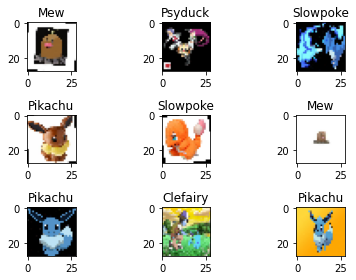

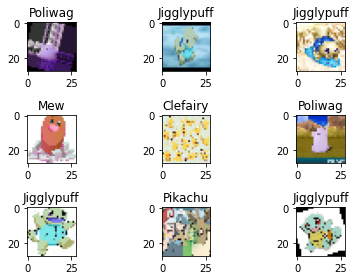

In [11]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i])
    tr_po = train_labels[i]
    plt.title(dic_prac[tr_po])
plt.tight_layout()

plt.figure()
for i in range(9):
    te_po = test_labels[i]
    plt.subplot(3,3,i+1)
    plt.imshow(test_images[i])
    plt.title(dic_prac[te_po])
plt.tight_layout()

정규화

In [12]:
L, W, H, C = train_images.shape
train_images = train_images.reshape(-1, H * W * C)  
test_images = test_images.reshape(-1, H * W * C)  
train_images = train_images.astype('float') / 255 
test_images = test_images.astype('float') / 255

print('train_images_shape: ', train_images.shape)
print('test_images_shape: ', test_images.shape)
print(train_images[:5])
print(test_images[:5])

train_images_shape:  (46702, 2352)
test_images_shape:  (11676, 2352)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.00392157 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.99607843 1.         1.         ... 0.99607843 0.97254902 0.97254902]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.87058824 0.92156863 0.85882353 ... 0.88235294 0.91372549 0.8627451 ]]


원-핫 인코딩

In [13]:
Train_labels = to_categorical(train_labels, 10) #to_cateogrical 함수를 통해 각 라벨을 원핫인코딩(mnist랑 동일)
Test_labels = to_categorical(test_labels, 10)   #to_cateogrical 함수를 통해 각 라벨을 원핫인코딩(mnist랑 동일)
print('train_labels shape:', train_labels.shape)
print('test_labels shape', test_labels.shape)

train_labels shape: (46702,)
test_labels shape (11676,)


인공지능 모델 설계

In [14]:
model = Sequential()
model.add(Dense(512, activation = 'relu', 
            input_shape=(2352,),
            ))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1204736   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,338,634
Trainable params: 1,338,634
Non-trainable params: 0
_________________________________________________________________


모델 학습시키기

In [15]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience=10, verbose=1) 
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) 
history = model.fit(train_images, Train_labels, batch_size=100, epochs=40, verbose=1, 
                    validation_data=(test_images, Test_labels), callbacks = [early_stopping])

Train on 46702 samples, validate on 11676 samples
Epoch 1/40
46702/46702 [==============================] - 7s 157us/step - loss: 1.4019 - accuracy: 0.5261 - val_loss: 1.1658 - val_accuracy: 0.5847
Epoch 2/40
46702/46702 [==============================] - 7s 149us/step - loss: 0.6272 - accuracy: 0.7982 - val_loss: 0.5547 - val_accuracy: 0.8100
Epoch 3/40
46702/46702 [==============================] - 7s 151us/step - loss: 0.3593 - accuracy: 0.8866 - val_loss: 0.6970 - val_accuracy: 0.7775
Epoch 4/40
46702/46702 [==============================] - 7s 152us/step - loss: 0.2544 - accuracy: 0.9199 - val_loss: 0.2632 - val_accuracy: 0.9170
Epoch 5/40
46702/46702 [==============================] - 7s 150us/step - loss: 0.1761 - accuracy: 0.9450 - val_loss: 0.3619 - val_accuracy: 0.8839
Epoch 6/40
46702/46702 [==============================] - 7s 151us/step - loss: 0.1255 - accuracy: 0.9617 - val_loss: 0.2918 - val_accuracy: 0.8972
Epoch 7/40
46702/46702 [==============================] - 7s 1

모델 정확도 살펴보기

In [16]:
score = model.evaluate(test_images, Test_labels)
print('Test score:', score[0])
print('Test accuracy:', score[1])

11676/11676 [==============================] - 1s 56us/step
Test score: 0.04799433251530661
Test accuracy: 0.9868962168693542


예측값, 예측과 맞는 값, 예측과 틀린값 구하기

In [17]:
predict_classes = np.argmax(model.predict(test_images), axis = 1)
correct_indices = np.nonzero(predict_classes == test_labels)[0]
incorrect_indices = np.nonzero(predict_classes != test_labels)[0]
print(predict_classes)
print(correct_indices)
print(incorrect_indices)

[8 6 6 ... 2 1 3]
[    0     1     2 ... 11673 11674 11675]
[   33    84   160   209   259   311   362   419   540   583   601   643
   695   729   739   771   901   908  1047  1115  1118  1290  1303  1357
  1369  1427  1429  1666  1757  1927  2120  2471  2473  2488  2600  2804
  2866  3090  3141  3214  3264  3286  3300  3402  3485  3540  3564  3574
  3629  3736  3741  3748  3758  3781  3888  4010  4067  4092  4333  4386
  4391  4520  4549  4566  4921  4971  4975  5065  5096  5103  5112  5120
  5178  5244  5306  5309  5314  5324  5442  5533  5572  5614  5830  5876
  5883  5937  6074  6199  6313  6318  6372  6377  6402  6407  6543  6611
  6727  6762  6898  6971  7034  7169  7204  7358  7481  7529  7711  7744
  7820  7865  7867  7943  8016  8343  8387  8440  8464  8925  9022  9094
  9180  9280  9373  9388  9634  9653  9725  9783  9907  9923  9936 10114
 10200 10237 10454 10514 10589 10802 10811 10860 10876 10942 10979 11054
 11089 11169 11171 11315 11369 11530 11602 11626 11654]


위: 예측한 값이랑 실제값이 같은 것을 보여줌, 
아래: 예측값과 실제값이 다른 것을 보여줌

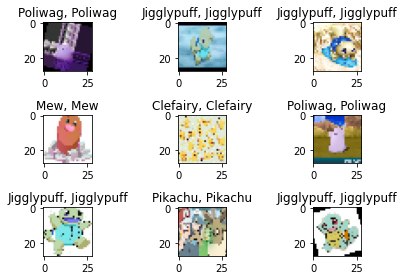

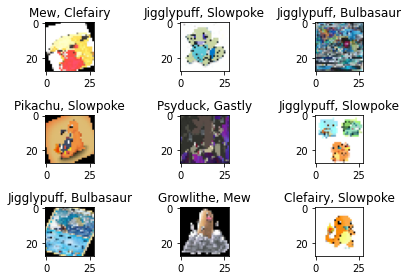

In [18]:
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    correct = correct_indices[i]
    pred1 = predict_classes[correct]
    cla1 = test_labels[correct]
    plt.imshow(test_images[correct].reshape(28, 28, 3))
    plt.title('{}, {}'.format(dic2[pred1], dic2[cla1]))
plt.tight_layout()

plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    incorrect_label = incorrect_indices[i]
    cla2 = test_labels[incorrect_label]
    pred2 = predict_classes[incorrect_label] 
    plt.imshow(test_images[incorrect_label].reshape(28, 28, 3))
    plt.title('{}, {}'.format(dic2[pred2], dic2[cla2]))
plt.tight_layout()

위: Train 데이터를 넣었을 때 오차와 Test 데이터 넣었을 때 오차 시각화
아래: Train 데이터를 넣었을 때 정확도와 Test 데이터 넣었을 때 정확도 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

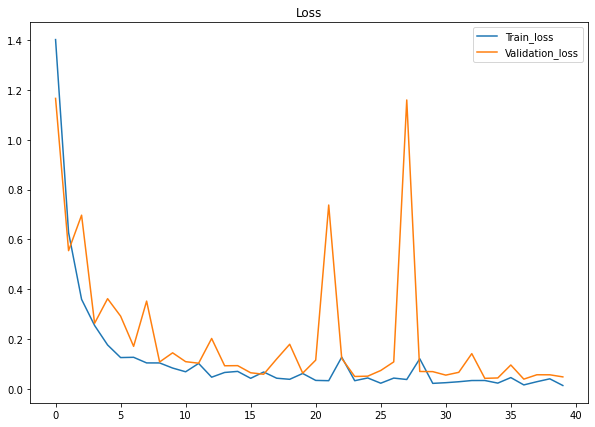

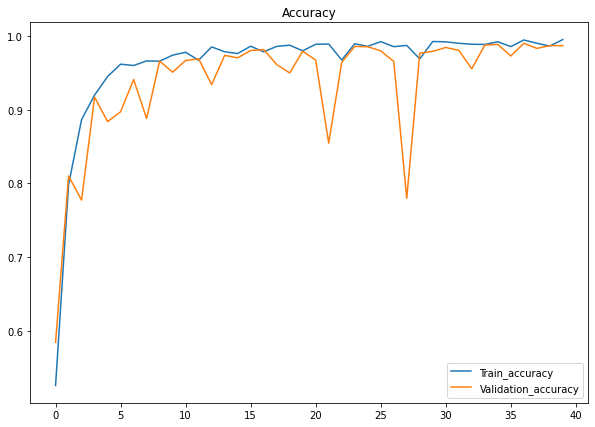

In [19]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label = 'Train_loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.title('Loss')
plt.legend()
plt.show

plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'], label = 'Train_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.title('Accuracy')
plt.legend()
plt.show

# 포켓몬 대결 (두개의 캐릭터를 속성으로 대결하고, 속성이 같으면 hp * 공격력 * 방어력을 이용해 대결해서 대결 승자를 나타내기)

['Charmander:파이리', 'Diglett:디그다', 'Ditto:메타몽', 'Eevee:이브이', 'Gyarados:갸라도스', 'Meowth:나옹', 'Pikachu:피카츄', 'Rattata:꼬렛', 'Snorlax:잠만보', 'Squirtle:꼬부기'] 

In [20]:
# Type: 타입, Hp: hp, Attack: 공격력, Defense: 방어력
# 출처: https://pokemon.fandom.com/ko/wiki/%EC%A2%85%EC%A1%B1%EA%B0%92_%EB%AA%A9%EB%A1%9D
# 출처: https://www.pokemonkorea.co.kr/pokedex/view/193?word=&characters=&area=&snumber=1&snumber2=898&typetextcs=&sortselval=number%20asc,number_count%20asc

데이터프레임 생성

In [22]:
import pandas as pd

image_datas = glob('C:\\Users\\82106\\Desktop\\software\\pocketmon_all60000\\*.jpg')


df = pd.DataFrame([[0,'Eevee'], [1,'Gyarados'], [2,'Meowth'], [3,'Pikachu'], [4,'Rattata'], 
                   [5,'Snorlax'], [6,'Squirtle'], [7,'Diglett'], [8,'Ditto'], [9,'Charmander']], 
                    columns=['LABEL', 'POCKETMON'])

Type = ['normal', 'water', 'normal', 'electricity', 'normal', 'normal', 'water', 'earth', 'normal', 'fire']
Hp = [55, 95, 40, 35, 39, 160, 44, 10, 48, 39]
Attack = [55, 125, 45, 55, 56, 110, 48, 55, 48, 52] 
Defense = [50, 69, 35, 40, 35, 65, 65, 25, 58, 43]

df['TYPE'] = [Type[0], Type[1], Type[2], Type[3], Type[4], Type[5], Type[6], Type[7], Type[8], Type[9]]
df['HP'] = [Hp[0], Hp[1], Hp[2], Hp[3], Hp[4], Hp[5], Hp[6], Hp[7], Hp[8], Hp[9]]
df['ATTACK'] = [Attack[0], Attack[1], Attack[2], Attack[3], Attack[4], 
                Attack[5], Attack[6], Attack[7], Attack[8], Attack[9]]
df['DEFENCE'] = [Defense[0], Defense[1], Defense[2], Defense[3], Defense[4], 
                 Defense[5], Defense[6], Defense[7], Defense[8], Defense[9]]
df


LABEL   POCKETMON         TYPE   HP  ATTACK  DEFENCE
0      0       Eevee       normal   55      55       50
1      1    Gyarados        water   95     125       69
2      2      Meowth       normal   40      45       35
3      3     Pikachu  electricity   35      55       40
4      4     Rattata       normal   39      56       35
5      5     Snorlax       normal  160     110       65
6      6    Squirtle        water   44      48       65
7      7     Diglett        earth   10      55       25
8      8       Ditto       normal   48      48       58
9      9  Charmander         fire   39      52       43

if문 사용해서 두개의 캐릭터 대결

In [23]:
dic_prop = {'earth':1, 'water':2, 'normal':3, 'electricity':4, 'fire':5}

Eevee = df.loc[0]
Gyarados = df.loc[1]
Meowth = df.loc[2]
Pikachu = df.loc[3]
Rattata = df.loc[4]
Snorlax = df.loc[5]
Squirtle = df.loc[6]
Diglett = df.loc[7]
Ditto = df.loc[8]
Charmander = df.loc[9]


def fight(p1, p2):
    p1_type = p1['TYPE']
    p2_type = p2['TYPE']
    p1_hp_atk_dfs = p1['HP'] * p1['ATTACK'] * p1['DEFENCE']
    p2_hp_atk_dfs = p2['HP'] * p2['ATTACK'] * p2['DEFENCE']
    print('{} VS {} 대결, 승자는 ?' .format(p1['POCKETMON'], p2['POCKETMON']))
    time.sleep(3)
    print()

    if dic_prop[p1_type] < dic_prop[p2_type]:
        print('일방적인 경기가 펼쳐집니다!!')
        time.sleep(1.5)
        print()
        print('{} 승리'.format(p2['POCKETMON']))
        
    elif dic_prop[p1_type] > dic_prop[p2_type]:
        print('일방적인 경기가 펼쳐집니다!!')
        time.sleep(1.5)
        print()
        print('{} 승리'.format(p1['POCKETMON']))
        
    else:
        print('엄청 치열합니다!!')
        time.sleep(3)
        print()
        if p1_hp_atk_dfs < p2_hp_atk_dfs:
            print('{} 승리'.format(p2['POCKETMON']))
        else:
            print('{} 승리'.format(p1['POCKETMON']))

데이터를 직접 입력해서 포켓몬 대결

In [24]:
fight(Pikachu, Diglett)

Pikachu VS Diglett 대결, 승자는 ?

일방적인 경기가 펼쳐집니다!!

Pikachu 승리


In [25]:
fight(Eevee, Snorlax)

Eevee VS Snorlax 대결, 승자는 ?

엄청 치열합니다!!

Snorlax 승리


random으로 두개의 사진을 가져와 or 입력해 화면에 띄우고 무슨 캐릭터인지 예측하고 예측한 두 개의 캐릭터를 대결 - 실패

In [91]:
image_list2 = os.listdir('pocketmon_all60000/')
choiceList = [random.choice(image_list2) for i in range(2)]
choiceList

['Pikachu.2773.jpg', 'Rattata.643.jpg']

# 머신러닝 모델

RandomForest 분류 모델 사용

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_images, train_labels)

pred = clf.predict(test_images)

print("테스트 정확도 :", str(accuracy_score(test_labels, pred)))
print(classification_report(test_labels, pred))

테스트 정확도 : 0.9945186707776635
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1176
           1       1.00      1.00      1.00      1207
           2       1.00      1.00      1.00      1199
           3       0.99      0.98      0.99      1045
           4       1.00      1.00      1.00      1200
           5       1.00      1.00      1.00      1269
           6       0.98      0.99      0.98      1087
           7       1.00      1.00      1.00      1200
           8       1.00      1.00      1.00      1214
           9       0.99      0.98      0.98      1079

    accuracy                           0.99     11676
   macro avg       0.99      0.99      0.99     11676
weighted avg       0.99      0.99      0.99     11676



SupportVector 분류 모델 사용

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
svc = SVC()
svc.fit(train_images, train_labels)

pred = svc.predict(test_images)

print("테스트 정확도 :", str(accuracy_score(test_labels, pred)))
print(classification_report(test_labels, pred))

테스트 정확도 : 0.9898937992463173
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1176
           1       1.00      1.00      1.00      1207
           2       0.99      1.00      0.99      1199
           3       0.99      0.98      0.98      1045
           4       0.99      1.00      1.00      1200
           5       1.00      1.00      1.00      1269
           6       0.97      0.97      0.97      1087
           7       0.99      1.00      0.99      1200
           8       1.00      1.00      1.00      1214
           9       0.98      0.95      0.97      1079

    accuracy                           0.99     11676
   macro avg       0.99      0.99      0.99     11676
weighted avg       0.99      0.99      0.99     11676



DecisionTree 분류 모델 사용

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
tree = DecisionTreeClassifier()
tree.fit(train_images, train_labels)

pred = tree.predict(test_images)

print("테스트 정확도 :", str(accuracy_score(test_labels, pred)))
print(classification_report(test_labels, pred))

테스트 정확도 : 0.9457862281603289
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1176
           1       0.95      0.93      0.94      1207
           2       0.95      0.94      0.95      1199
           3       0.93      0.92      0.92      1045
           4       0.95      0.95      0.95      1200
           5       0.95      0.96      0.96      1269
           6       0.91      0.89      0.90      1087
           7       0.97      0.98      0.98      1200
           8       0.99      0.99      0.99      1214
           9       0.91      0.90      0.91      1079

    accuracy                           0.95     11676
   macro avg       0.94      0.94      0.94     11676
weighted avg       0.95      0.95      0.95     11676



# 피카츄 폴더 안에서 틀린 데이터 하나를 찾아서 출력해내기

In [75]:
image_list_Pika = os.listdir('C:/Users/82106/Desktop/software/pikachu_dda/')
image_list_Pika

['Pikachu.1.jpg',
 'Pikachu.10.jpg',
 'Pikachu.2.jpg',
 'Pikachu.3.jpg',
 'Pikachu.4.jpg',
 'Pikachu.5.jpg',
 'Pikachu.6.jpg',
 'Pikachu.7.jpg',
 'Pikachu.8.jpg',
 'Pikachu.9.jpg']

폴더의 주인포켓몬:  Pikachu
숨어든 범인! :  Charmander


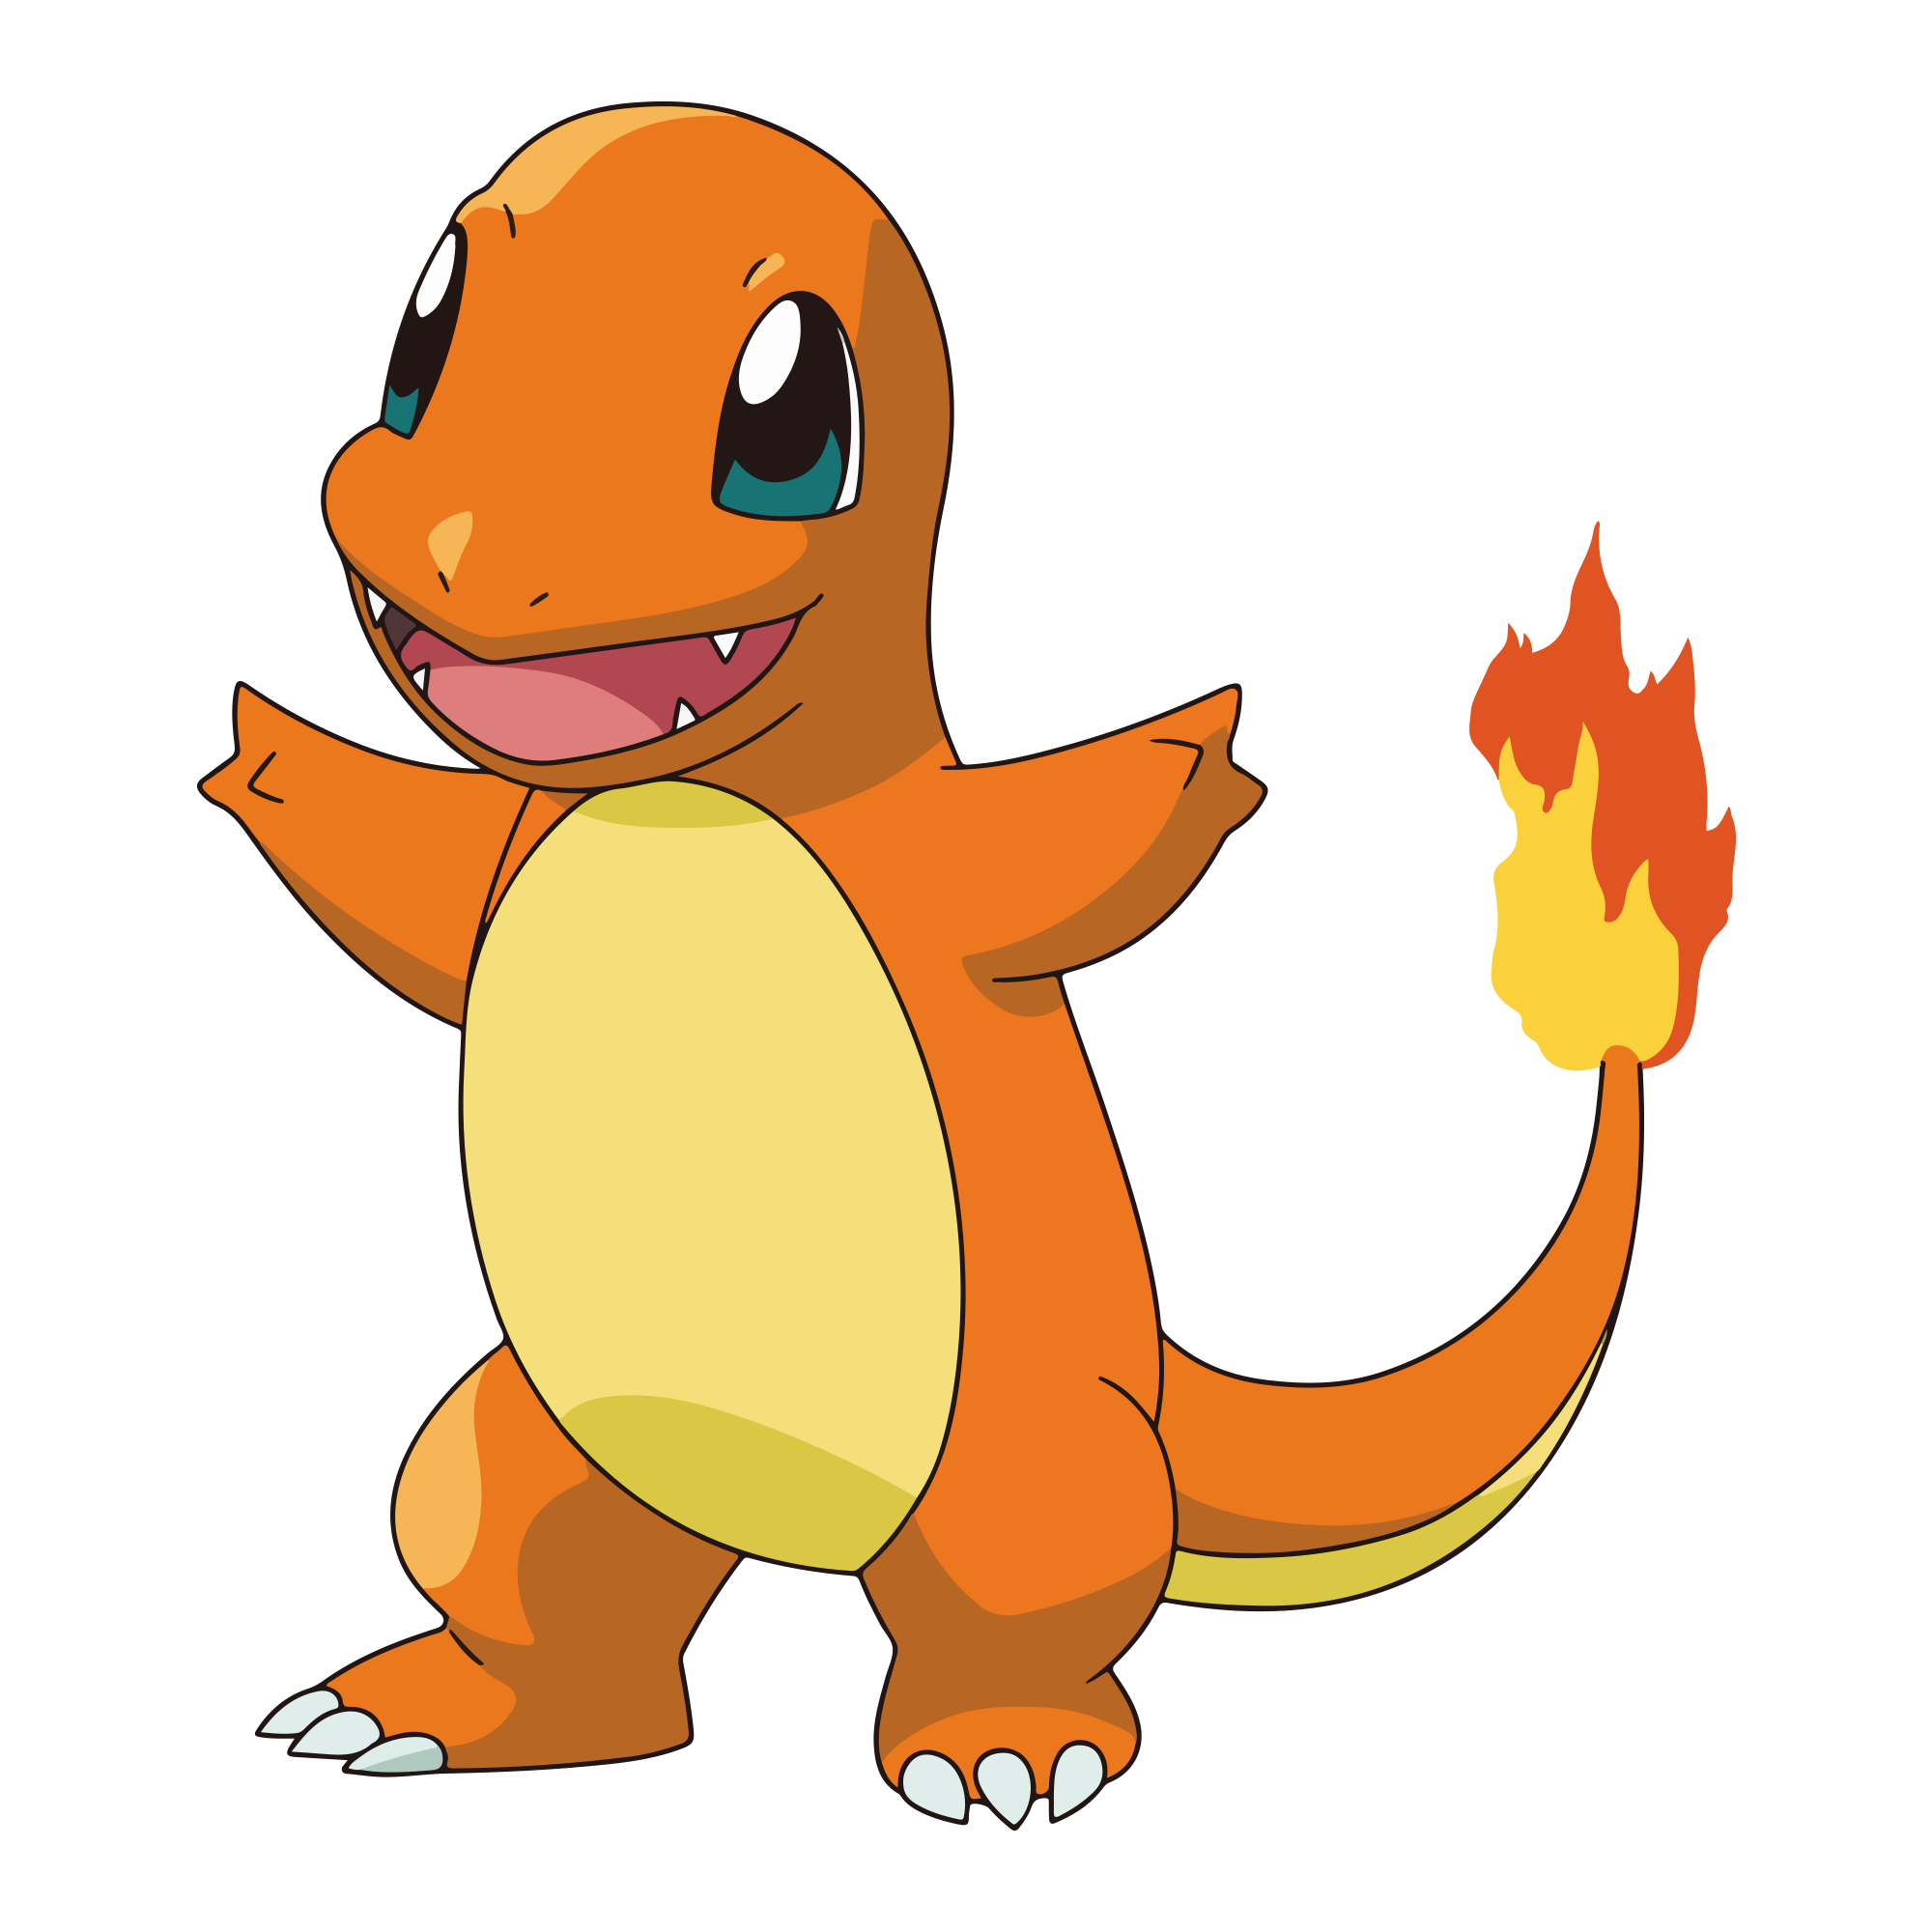

In [86]:
df5 = pd.DataFrame([[0,'Eevee'], [1,'Gyarados'], [2,'Meowth'], [3,'Pikachu'], [4,'Rattata'], [5,'Snorlax'], [6,'Squirtle'], 
                   [7,'Diglett'], [8,'Ditto'], [9,'Charmander']], 
                    columns=['LABEL', 'POCKETMON'])

# last_e에 해당하는 번호를 딕셔너리 값을 불러오면 포켓몬 이름이 됨
last_d = {0:'Eevee', 1:'Gyarados', 2:'Meowth', 3:'Pikachu', 4:'Rattata', 5:'Snorlax',6:'Squirtle', 7:'Diglett', 
          8:'Ditto', 9:'Charmander'}

s = [] # 예측값 넣을 리스트 생성
for i in range (10):
    image_pp = "Pikachu_dda/"+ image_list_Pika[i] # 폴더안의 파일을 처음부터 image_pp에 저장
    predict_i = cv2.imread(image_pp)
    predict_i = cv2.resize(predict_i, dsize=(28,28)) # 이미지 픽셀조정
    predict_i = cv2.cvtColor(predict_i, cv2.COLOR_BGR2RGB) # 이미지 컬러지정
    W, H, C = predict_i.shape        
    predict_i = predict_i.reshape(-1, H * W * C)   
    predict_i = predict_i.astype('float') / 255 
    last_i = np.argmax(model.predict(predict_i), axis=1) # 예측값에 해당하는 딕셔너리의 key값을 받아오기위해 번호 저장
    last_i = int(last_i)
    s.append(last_d[last_i]) #파일 예측값을 처음부터 리스트로 저장

sp= image_pp.split('/')
sp2 = sp[0].split("_")
print('폴더의 주인포켓몬: ', sp2[0])

for i in range(10):
    if s[i] != sp2[0]: # 예측값을 처음부터 label과 비교하여 다른것인 경우
        print("숨어든 범인! : ", s[i])
        result_path = 'Pikachu_dda' + '/' + image_list_Pika[i] #범인의 경로를 저장
        
Image(result_path) # 범인을 이미지로 출력(단순 출력)

나옹 폴더 안에서 틀린 데이터 하나를 찾아서 출력해내기

In [87]:
image_list_Meo = os.listdir('C:/Users/82106/Desktop/software/Meowth_dda/')
image_list_Meo

['Meowth.1.jpg',
 'Meowth.10.jpg',
 'Meowth.2.jpg',
 'Meowth.3.jpg',
 'Meowth.4.jpg',
 'Meowth.5.jpg',
 'Meowth.6.jpg',
 'Meowth.7.jpg',
 'Meowth.8.jpg',
 'Meowth.9.jpg']

폴더의 주인포켓몬:  Meowth
숨어든 범인! :  Snorlax


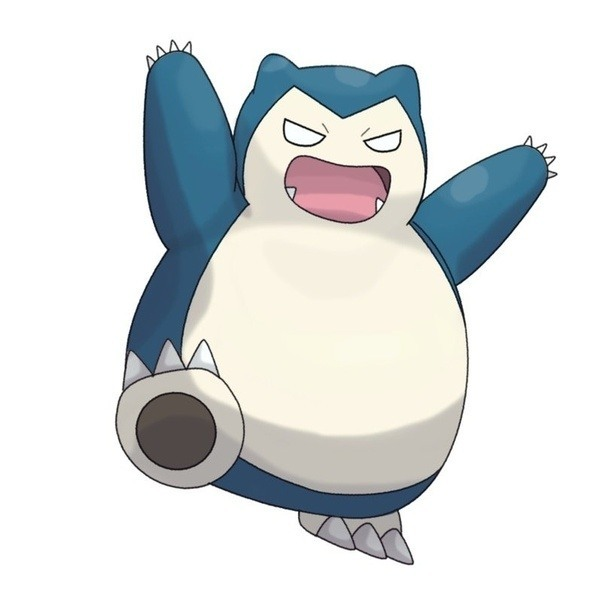

In [90]:
df5 = pd.DataFrame([[0,'Eevee'], [1,'Gyarados'], [2,'Meowth'], [3,'Pikachu'], [4,'Rattata'], [5,'Snorlax'], [6,'Squirtle'], 
                   [7,'Diglett'], [8,'Ditto'], [9,'Charmander']], 
                    columns=['LABEL', 'POCKETMON'])
last_d = {0:'Eevee', 1:'Gyarados', 2:'Meowth', 3:'Pikachu', 4:'Rattata', 5:'Snorlax',
          6:'Squirtle', 7:'Diglett', 8:'Ditto', 9:'Charmander'}

s = []
for i in range (10):
    image_pp = "Meowth_dda/"+ image_list_Meo[i]
    predict_i = cv2.imread(image_pp)
    predict_i = cv2.resize(predict_i, dsize=(28,28))
    predict_i = cv2.cvtColor(predict_i, cv2.COLOR_BGR2RGB)
    W, H, C = predict_i.shape        
    predict_i = predict_i.reshape(-1, H * W * C)   
    predict_i = predict_i.astype('float') / 255 
    last_i = np.argmax(model.predict(predict_i), axis=1)
    last_i = int(last_i)
    s.append(last_d[last_i]) #파일 예측값 리스트로 저장

sp= image_pp.split('/')
sp2 = sp[0].split("_")
print('폴더의 주인포켓몬: ', sp2[0])

for i in range(10):
    if s[i] != sp2[0]:
        print("숨어든 범인! : ", s[i])
        result_path = 'Meowth_dda' + '/' + image_list_Meo[i]
        
        
Image(result_path)